In [37]:
# imports
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
from sklearn.metrics import adjusted_rand_score, accuracy_score
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import numpy as np
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

In [38]:
# load the datasets d_10c data
d_10c = pd.read_csv('2d-10c.dat', header=None)

In [39]:
# load oreder2-3clust data
order2_3clust = pd.read_csv('order2-3clust.csv', header=None) 

In [40]:
# load iris data
iris = pd.read_csv('iris.csv', header=None)

In [41]:
# load long data
long_data = pd.read_csv('long.data.txt', header=None, sep=' ')

In [42]:
smile = pd.read_csv('smile.csv', header=None)

In [43]:
# load square data
square_data = pd.read_csv('square.data.txt', header=None, sep=' ')

In [44]:
clusters = {
    'd_10c': [],
    'order2_3clust': [],
    'iris': [],
    'long_data': [],
    'smile': [],
    'square_data': []
}


In [45]:
classes = {
    'd_10c': 10,
    'order2_3clust': 3,
    'iris': 3,
    'long_data': 2,
    'smile': 4,
    'square_data': 4
}

In [46]:
datasets_classes = {
    #last column
    'd_10c' : d_10c.iloc[:, -1],
    'order2_3clust' : order2_3clust.iloc[:, -1],
    'iris' : iris.iloc[:, -1],
    'long_data' : long_data.iloc[:, -1],
    'smile' : smile.iloc[:, -1],
    'square_data' : square_data.iloc[:, -1]
}

In [20]:
datasets = {
    # all columns except last
    'd_10c': d_10c.iloc[:, :-1],
    'order2_3clust': order2_3clust.iloc[:, :-1],
    'iris': iris.iloc[:, :-1],
    'long_data': long_data.iloc[:, :-1],
    'smile': smile.iloc[:, :-1],
    'square_data': square_data.iloc[:, :-1]
}

## Task 1

# Single-linkage

d_10c


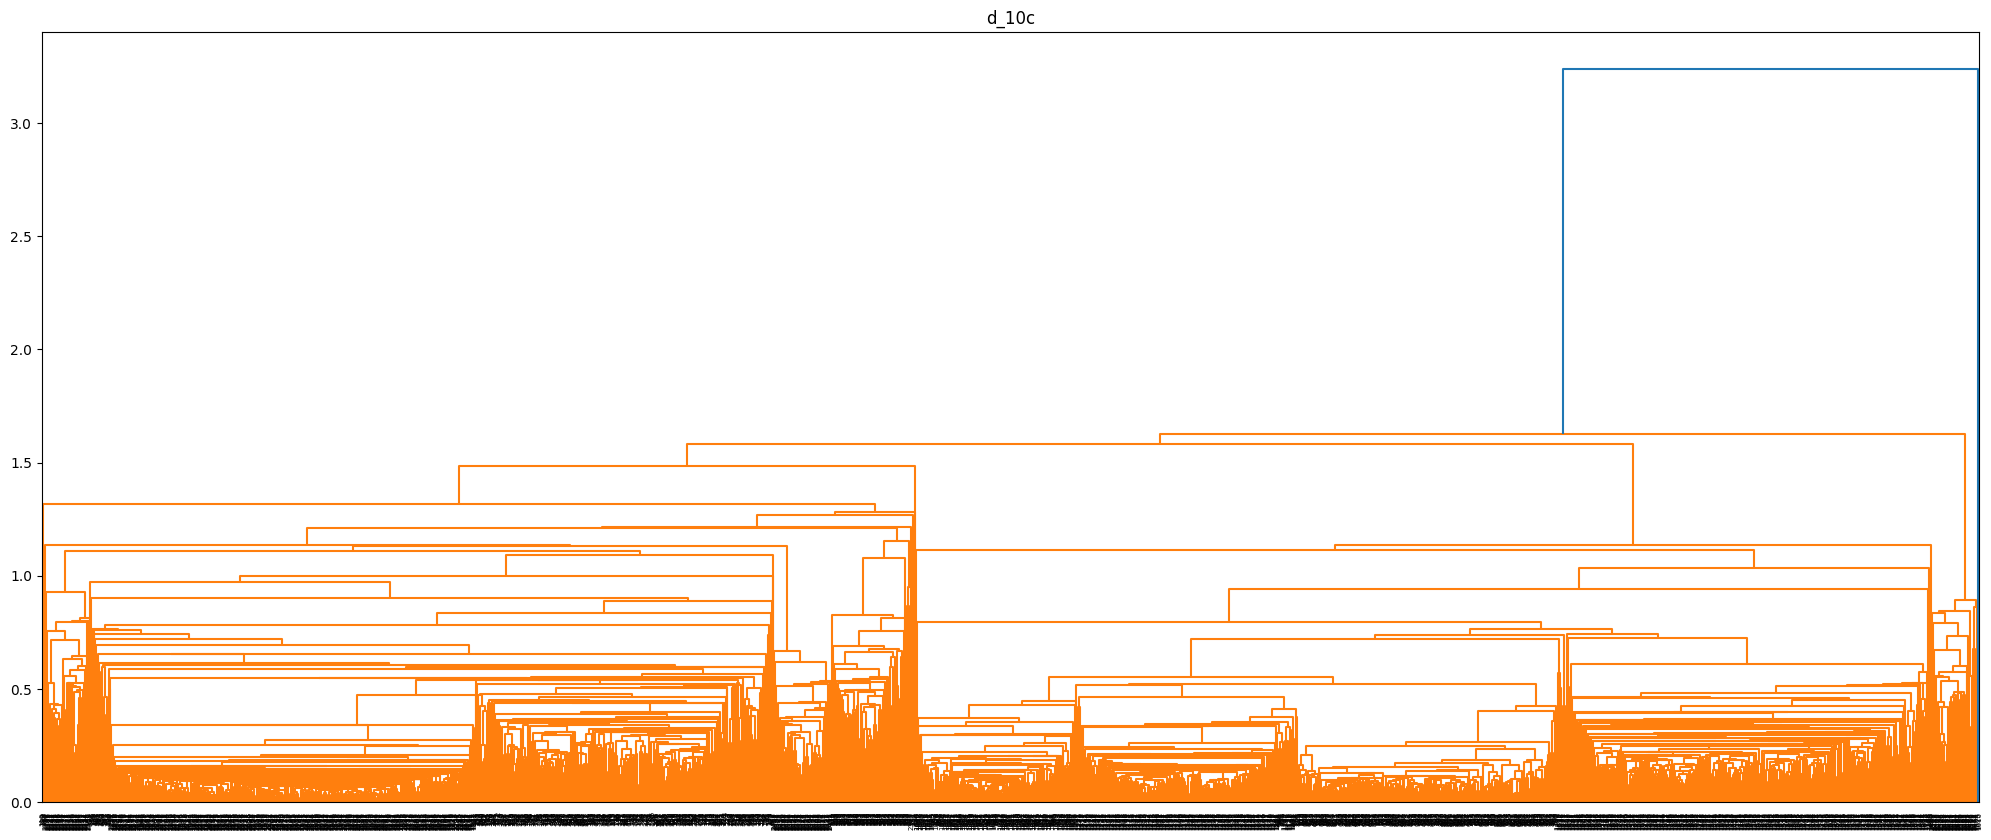

order2_3clust


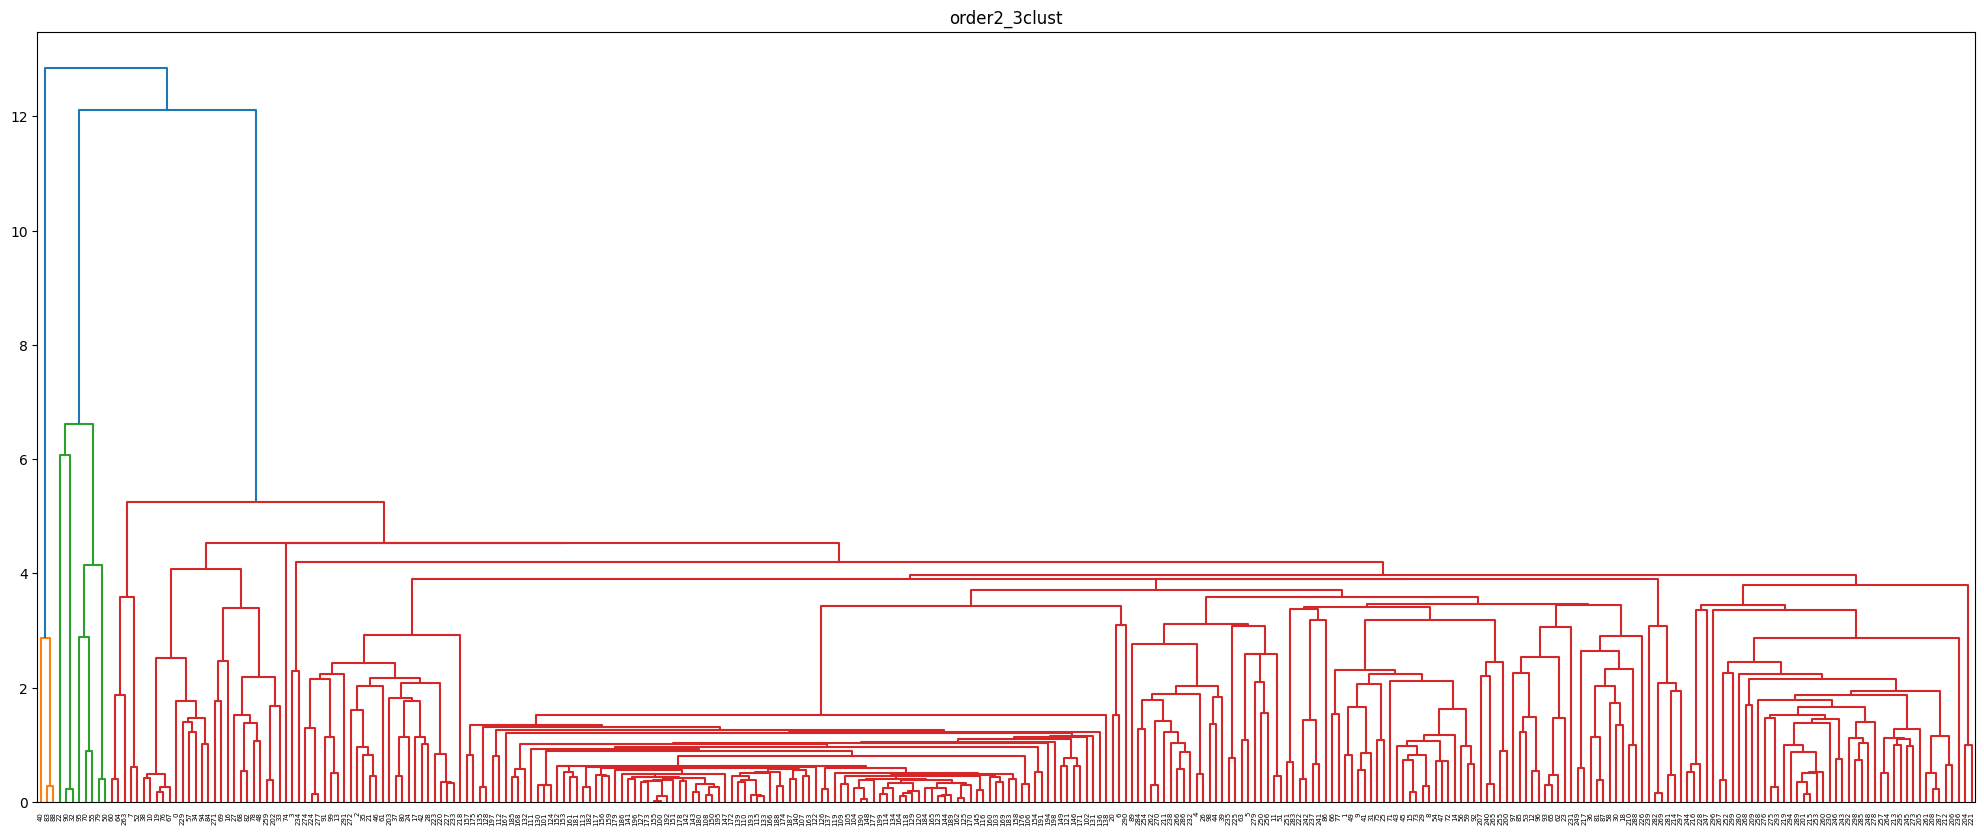

iris


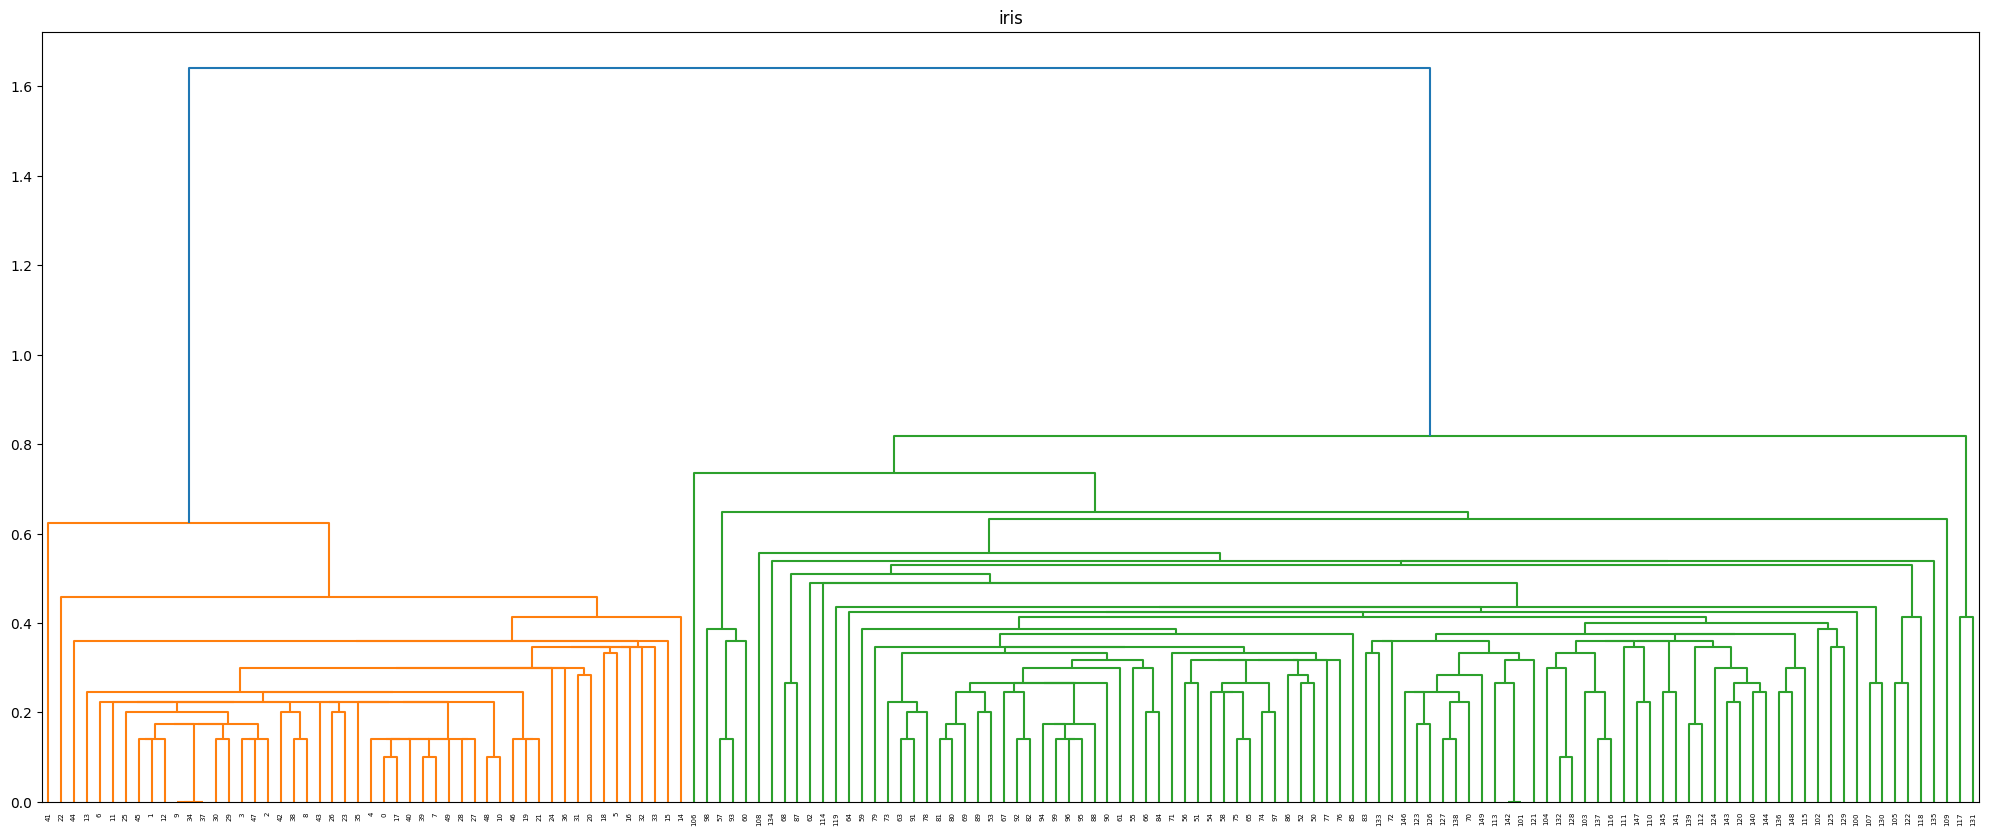

long_data


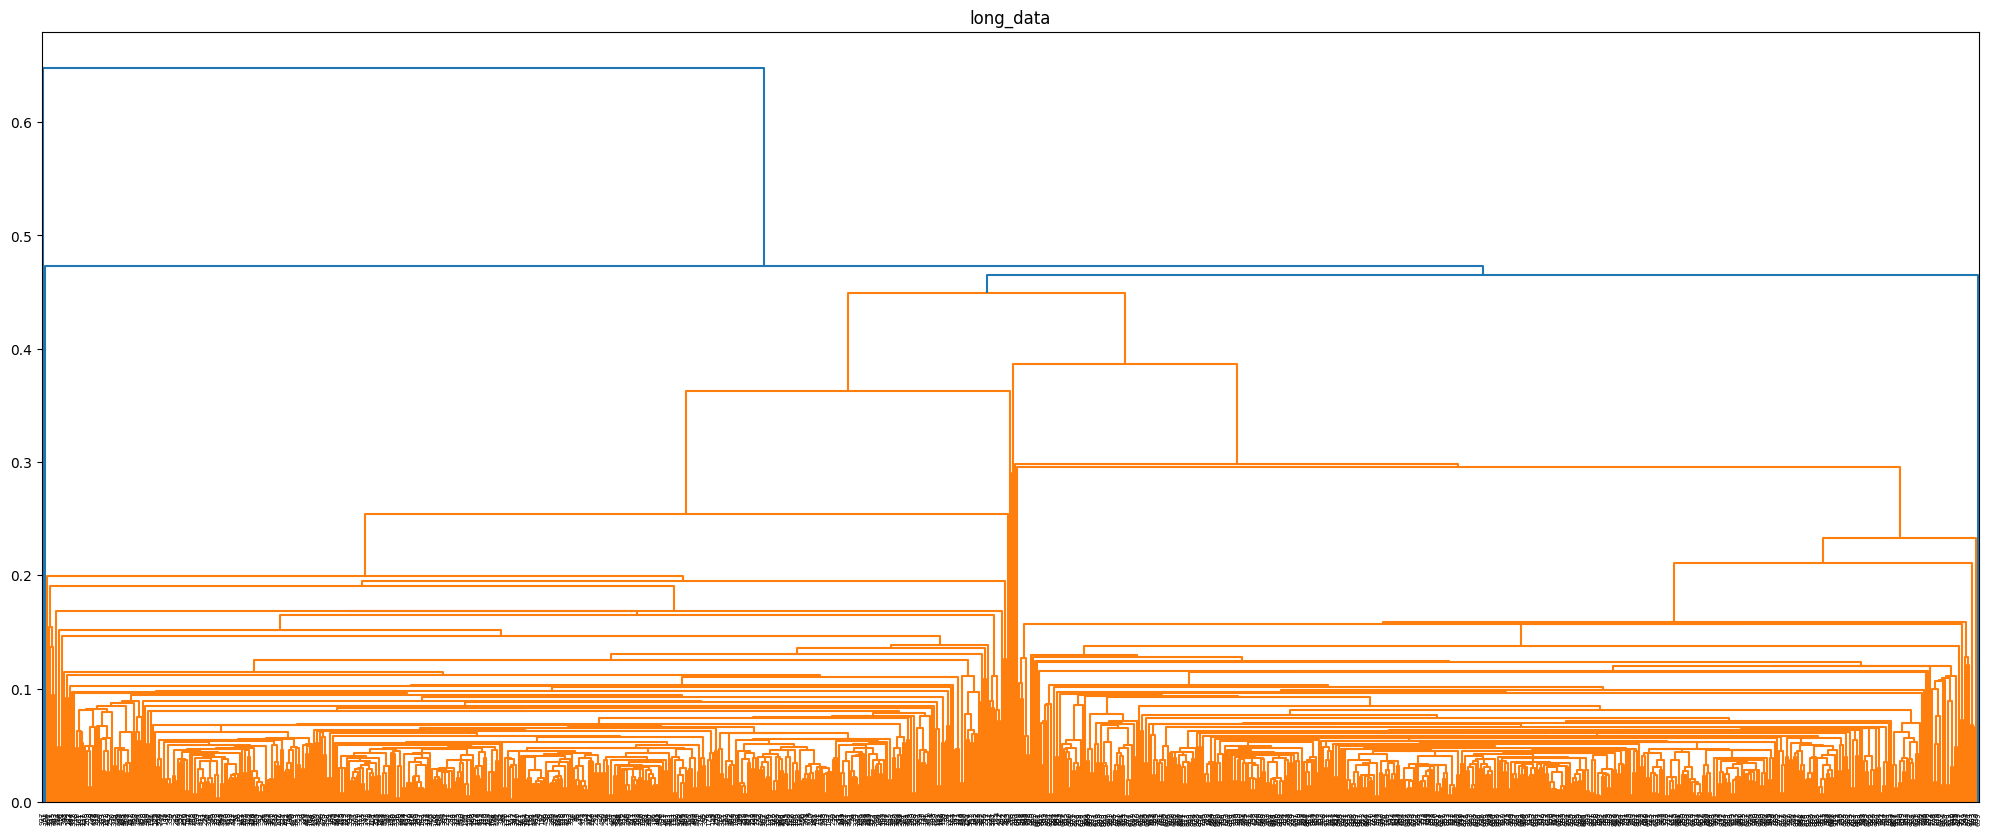

smile


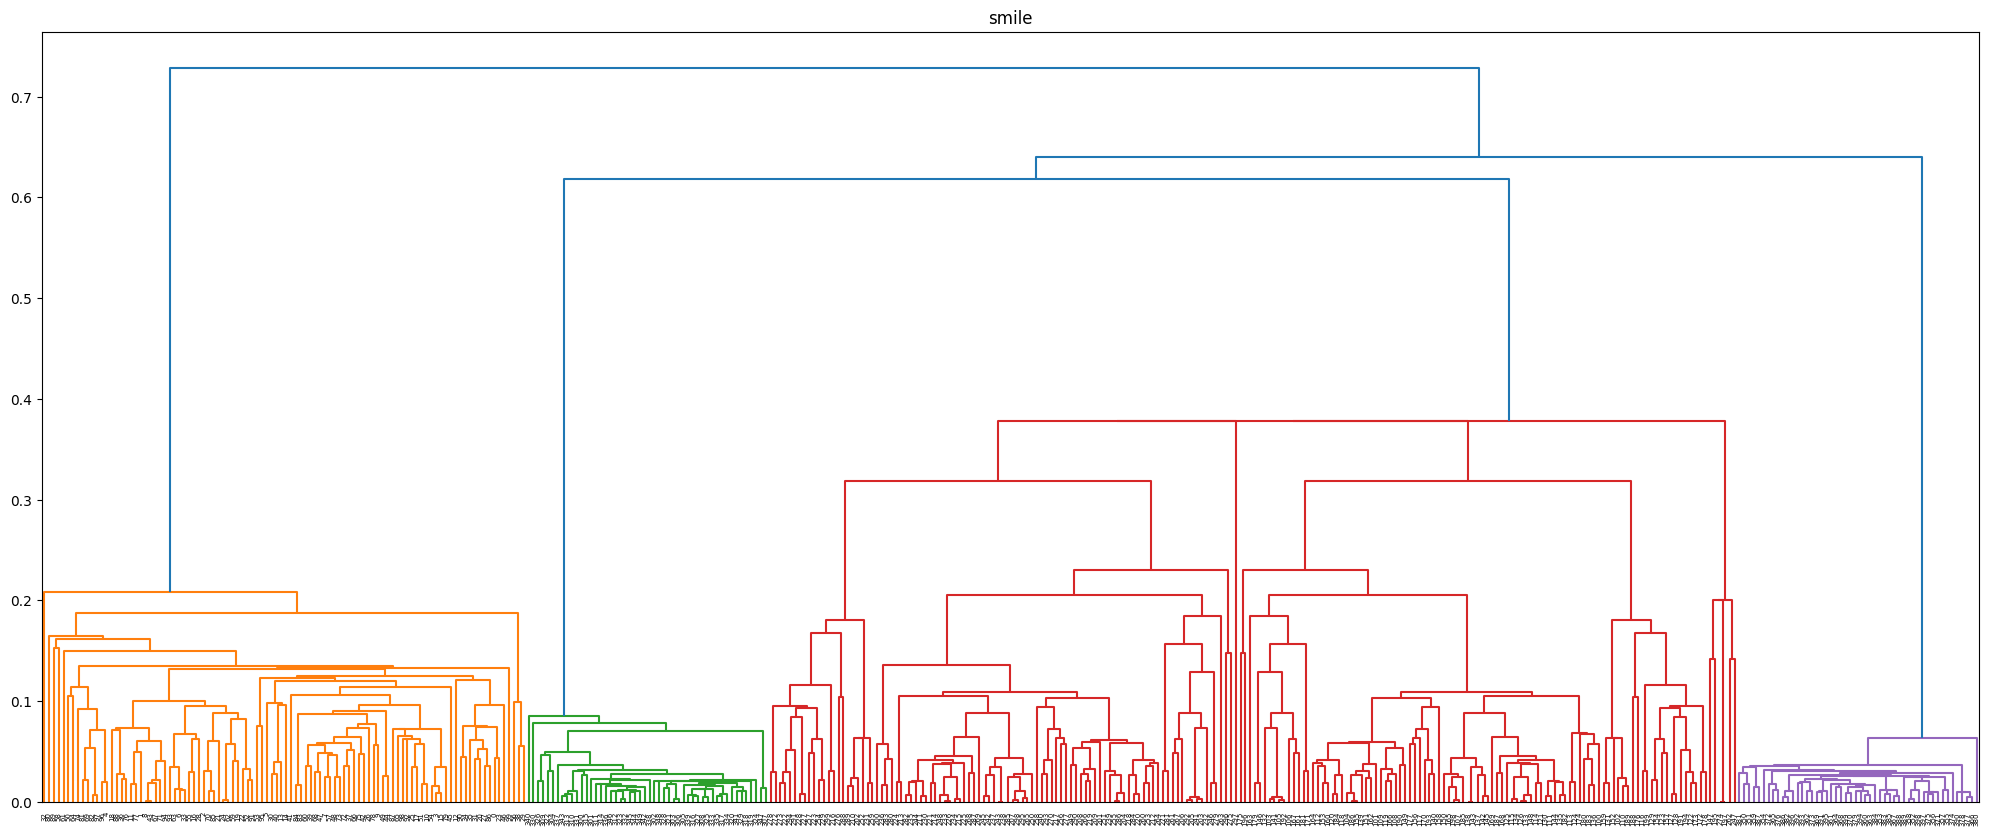

square_data


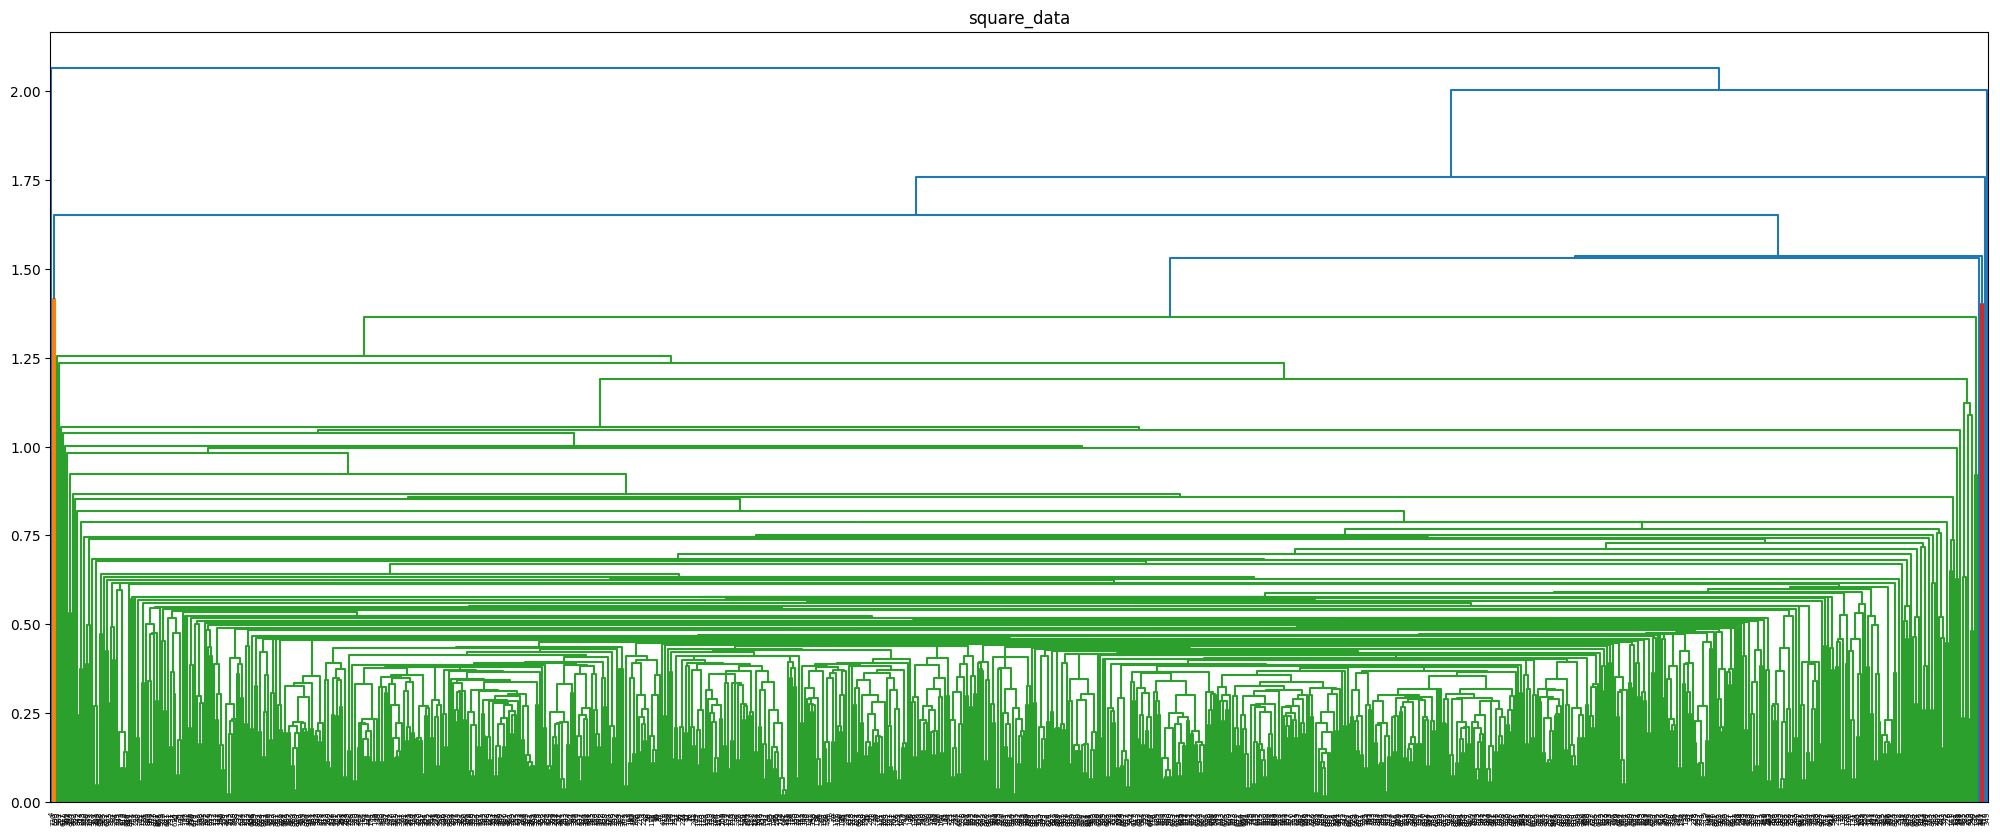

In [14]:
for key in datasets:
    print(key)
    fig = plt.figure(figsize=(25, 10))
    dendrogram(linkage(datasets[key], method='single', metric='euclidean', optimal_ordering=True))
    plt.title(key)
    plt.show()

# Average linkage

d_10c


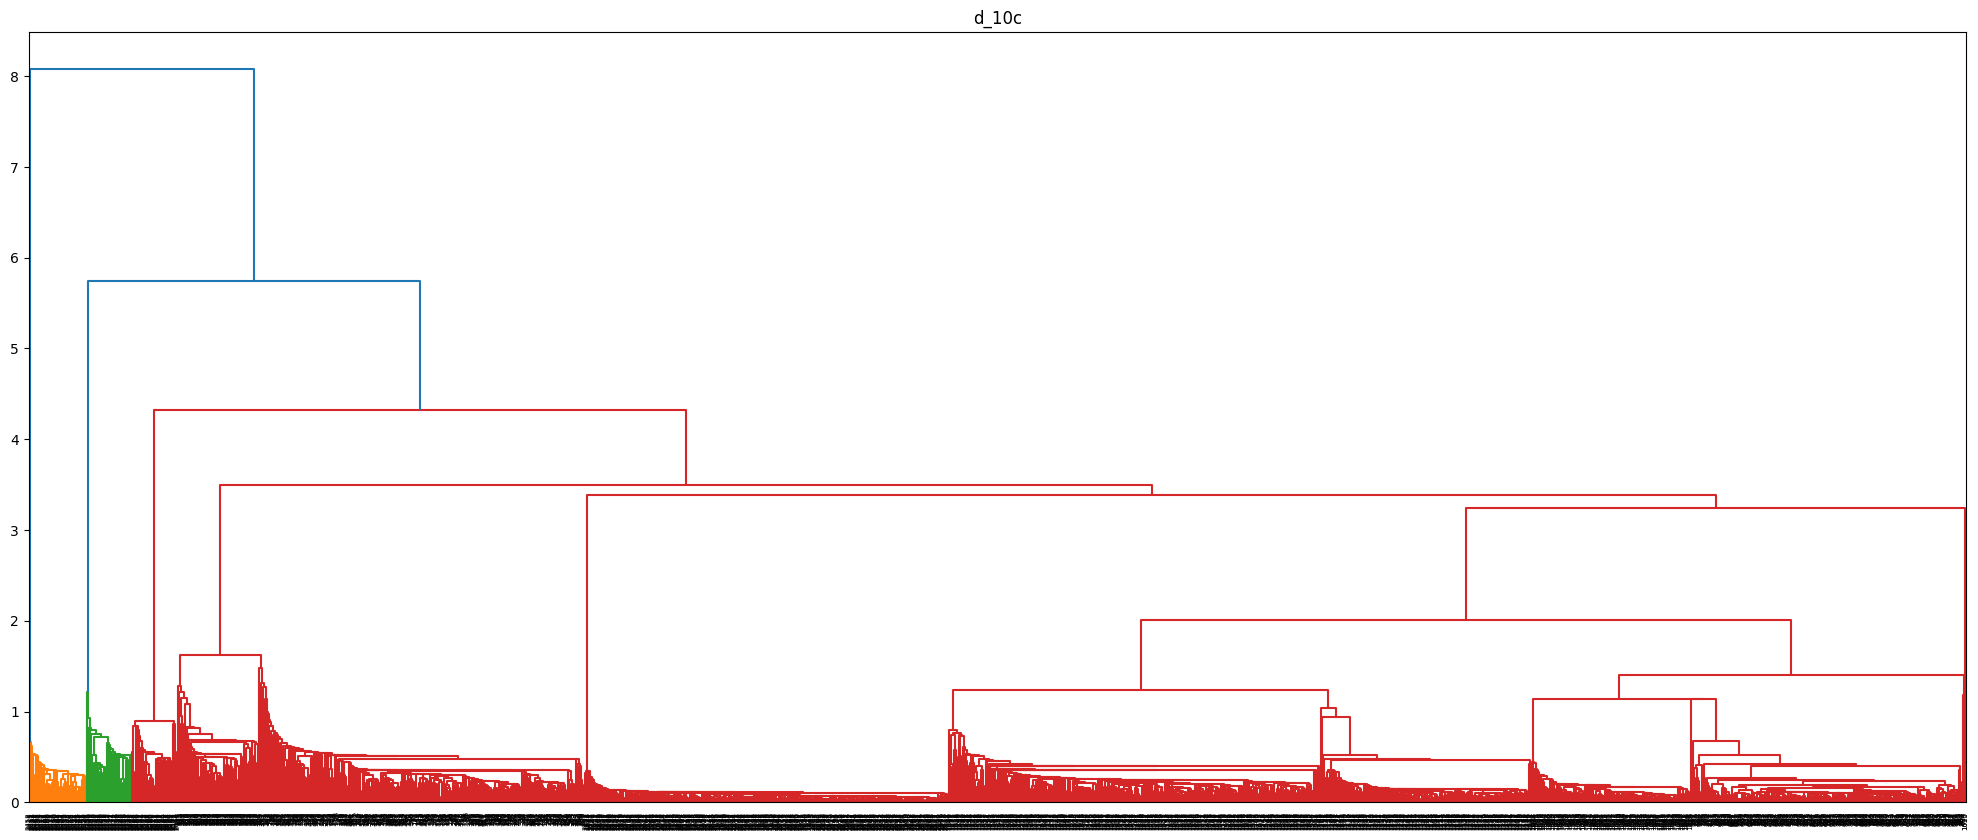

order2_3clust


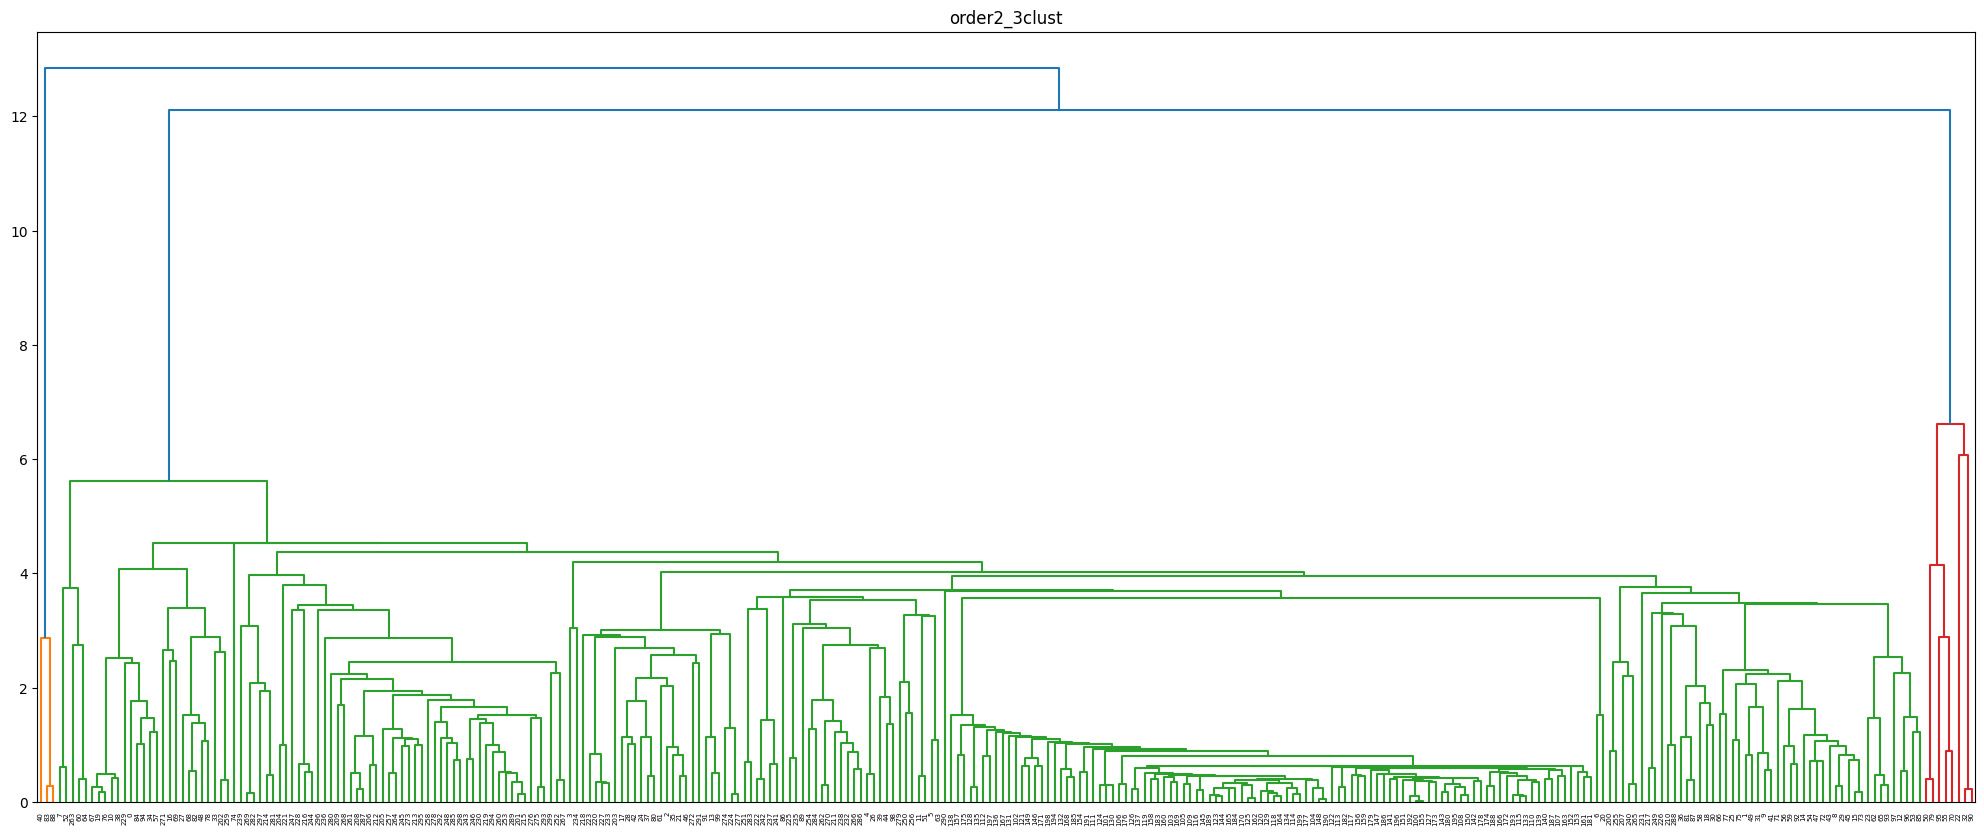

iris


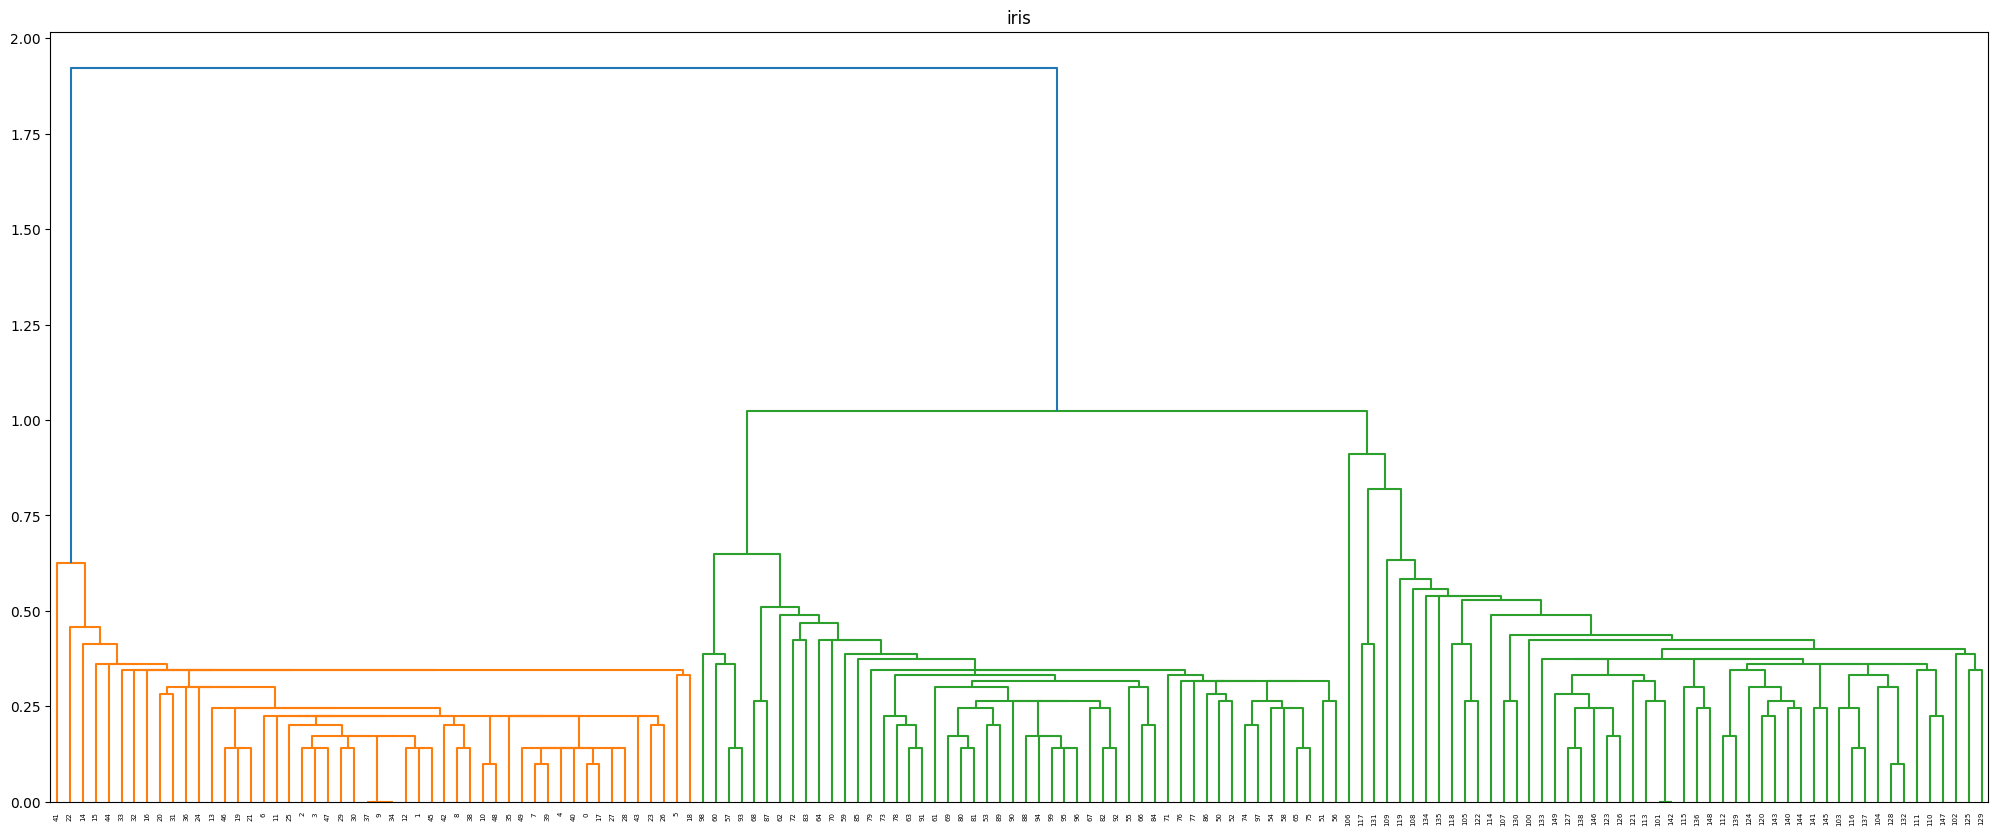

long_data


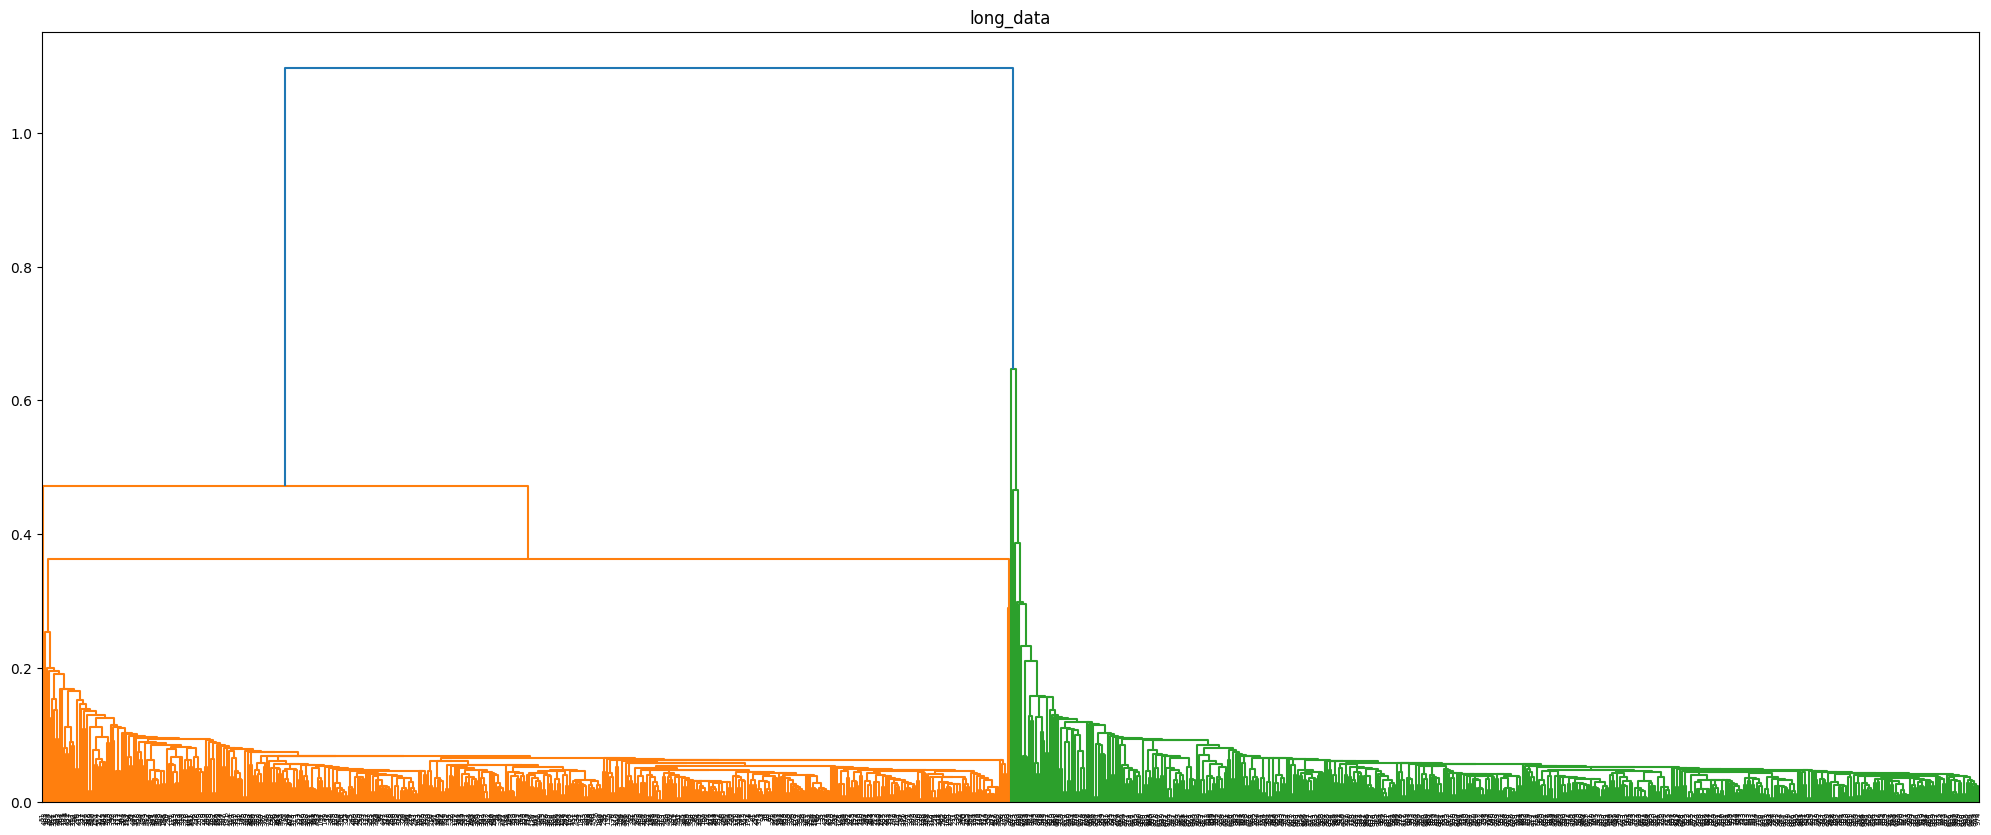

smile


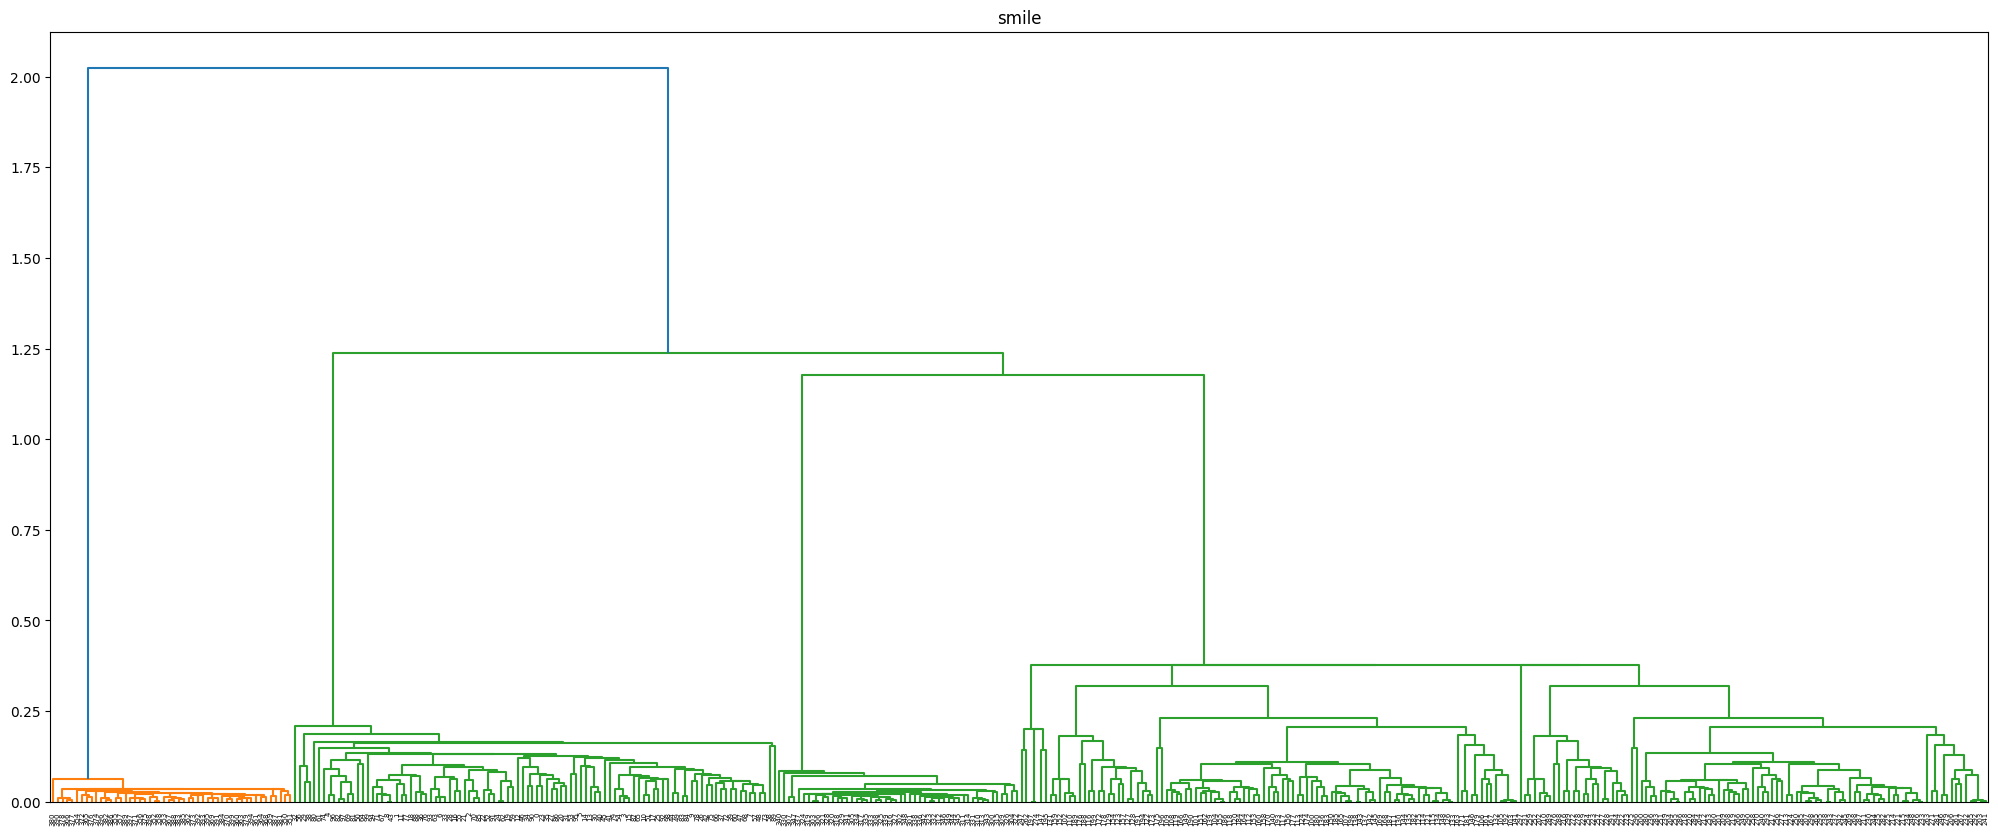

square_data


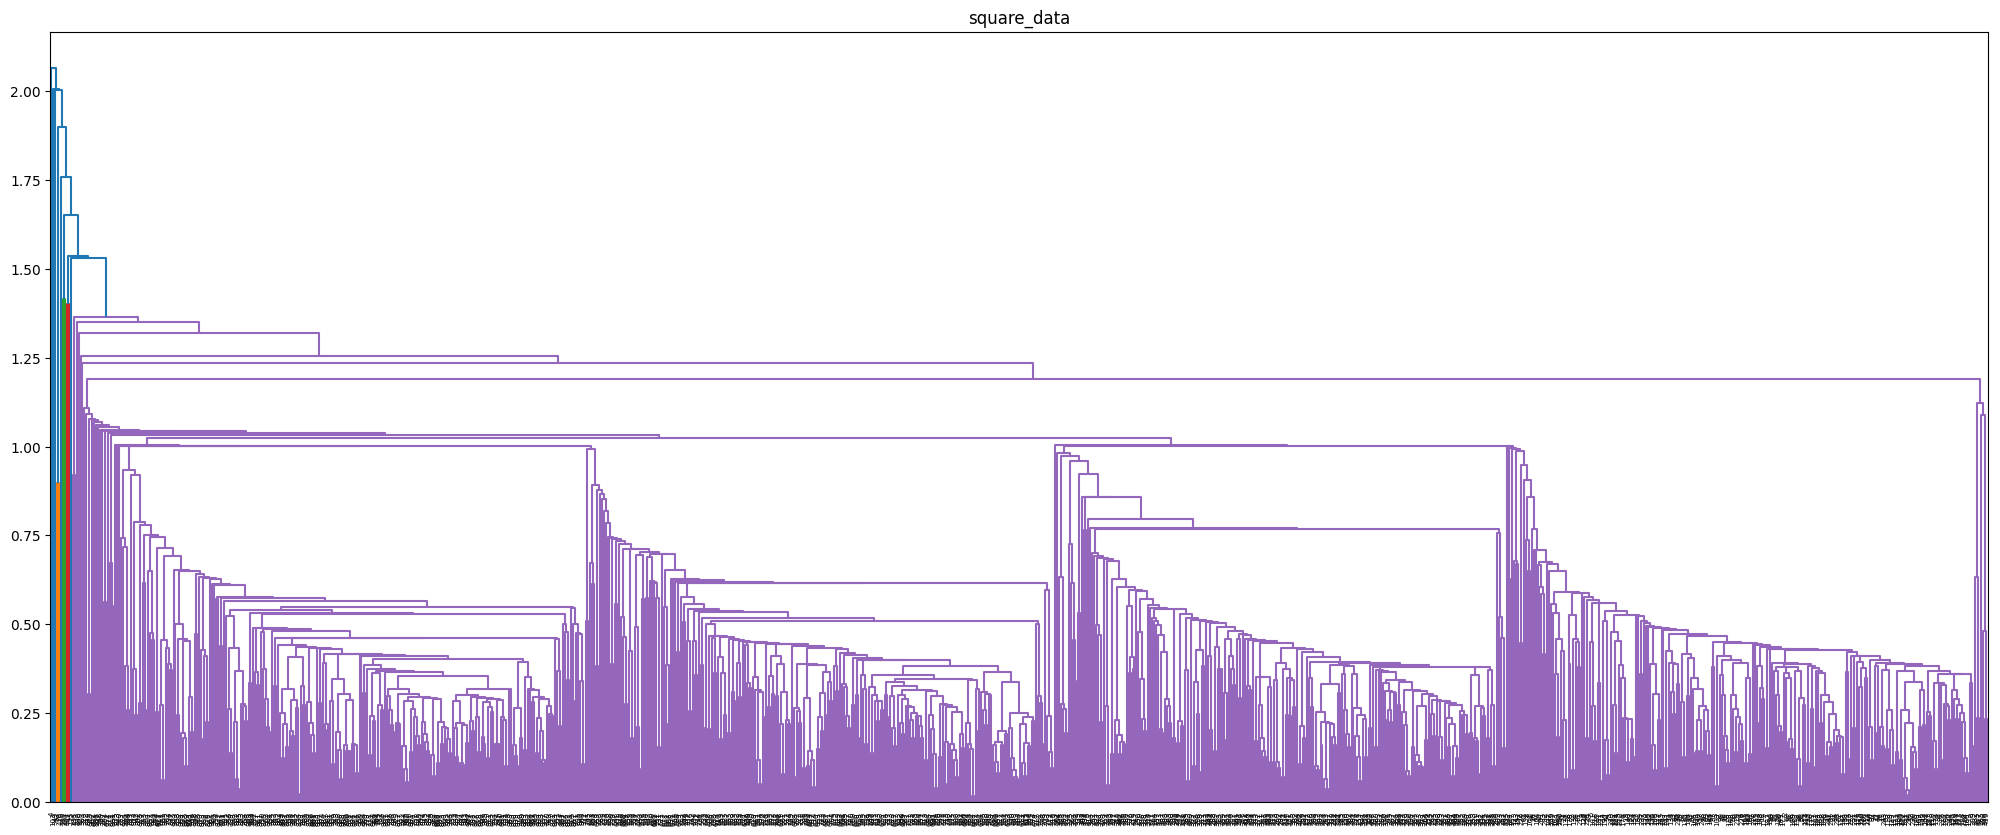

In [48]:
for key in datasets:
    print(key)
    clusters[key].append(linkage(datasets[key], method='average', metric='euclidean'))
    # plot each dendrogram
    fig = plt.figure(figsize=(25, 10))
    dendo = dendrogram(clusters[key][0])
    plt.title(key)
    plt.show()
    

# Complete-linkage


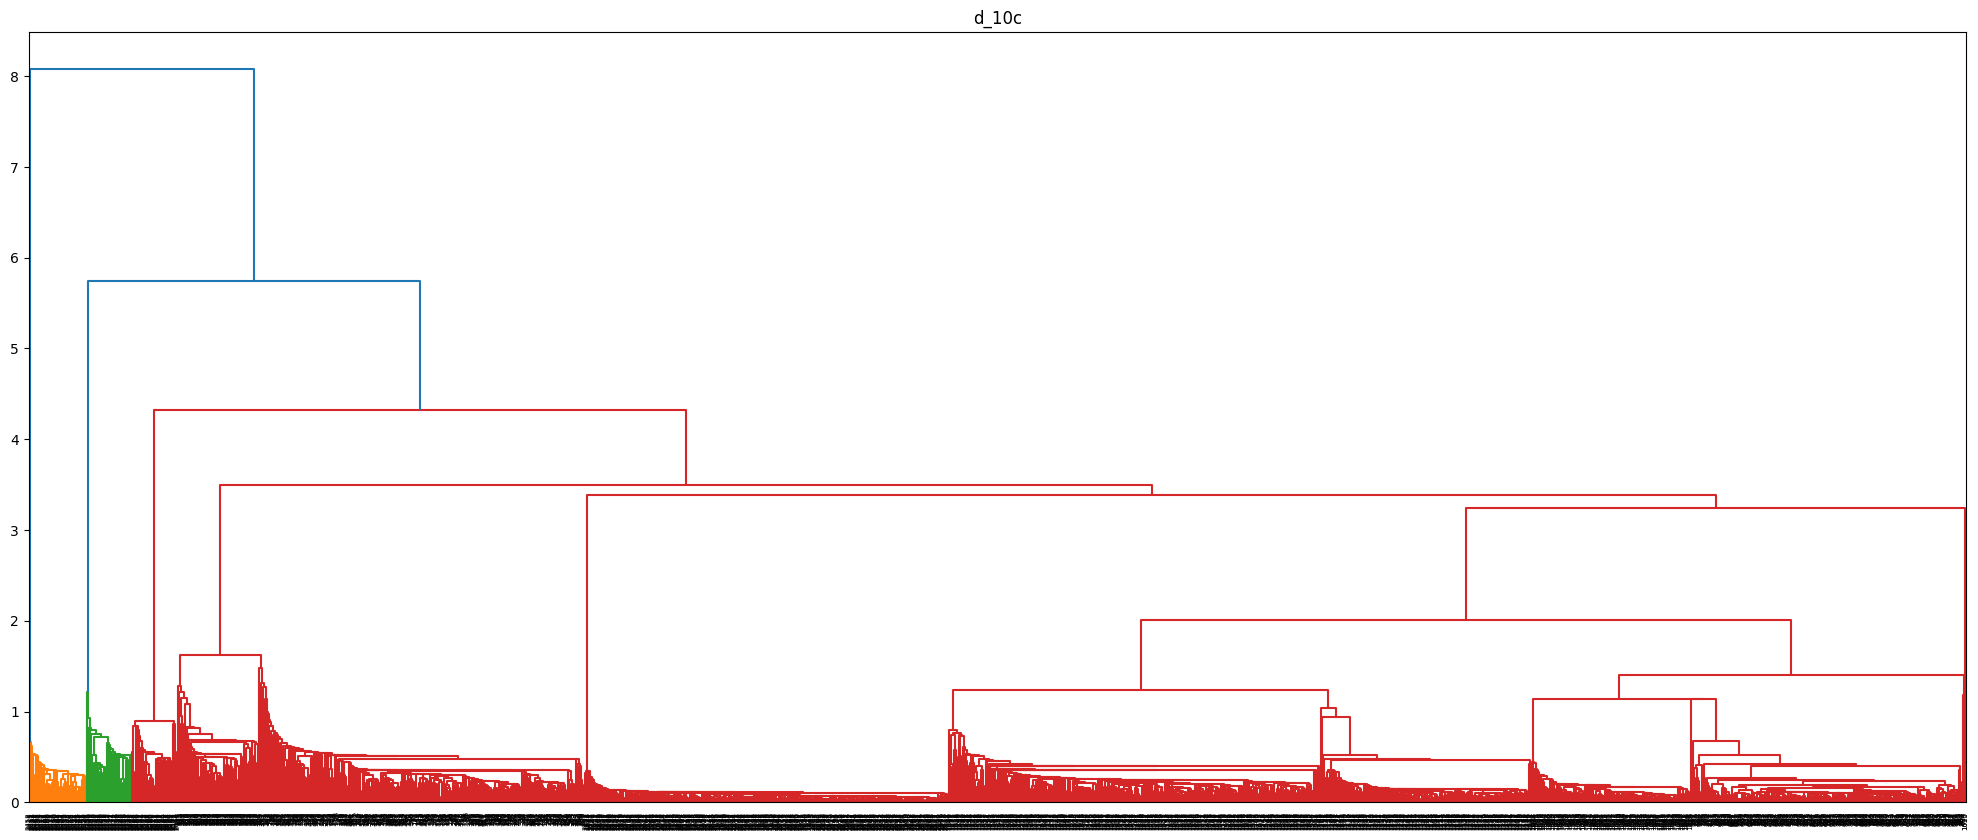

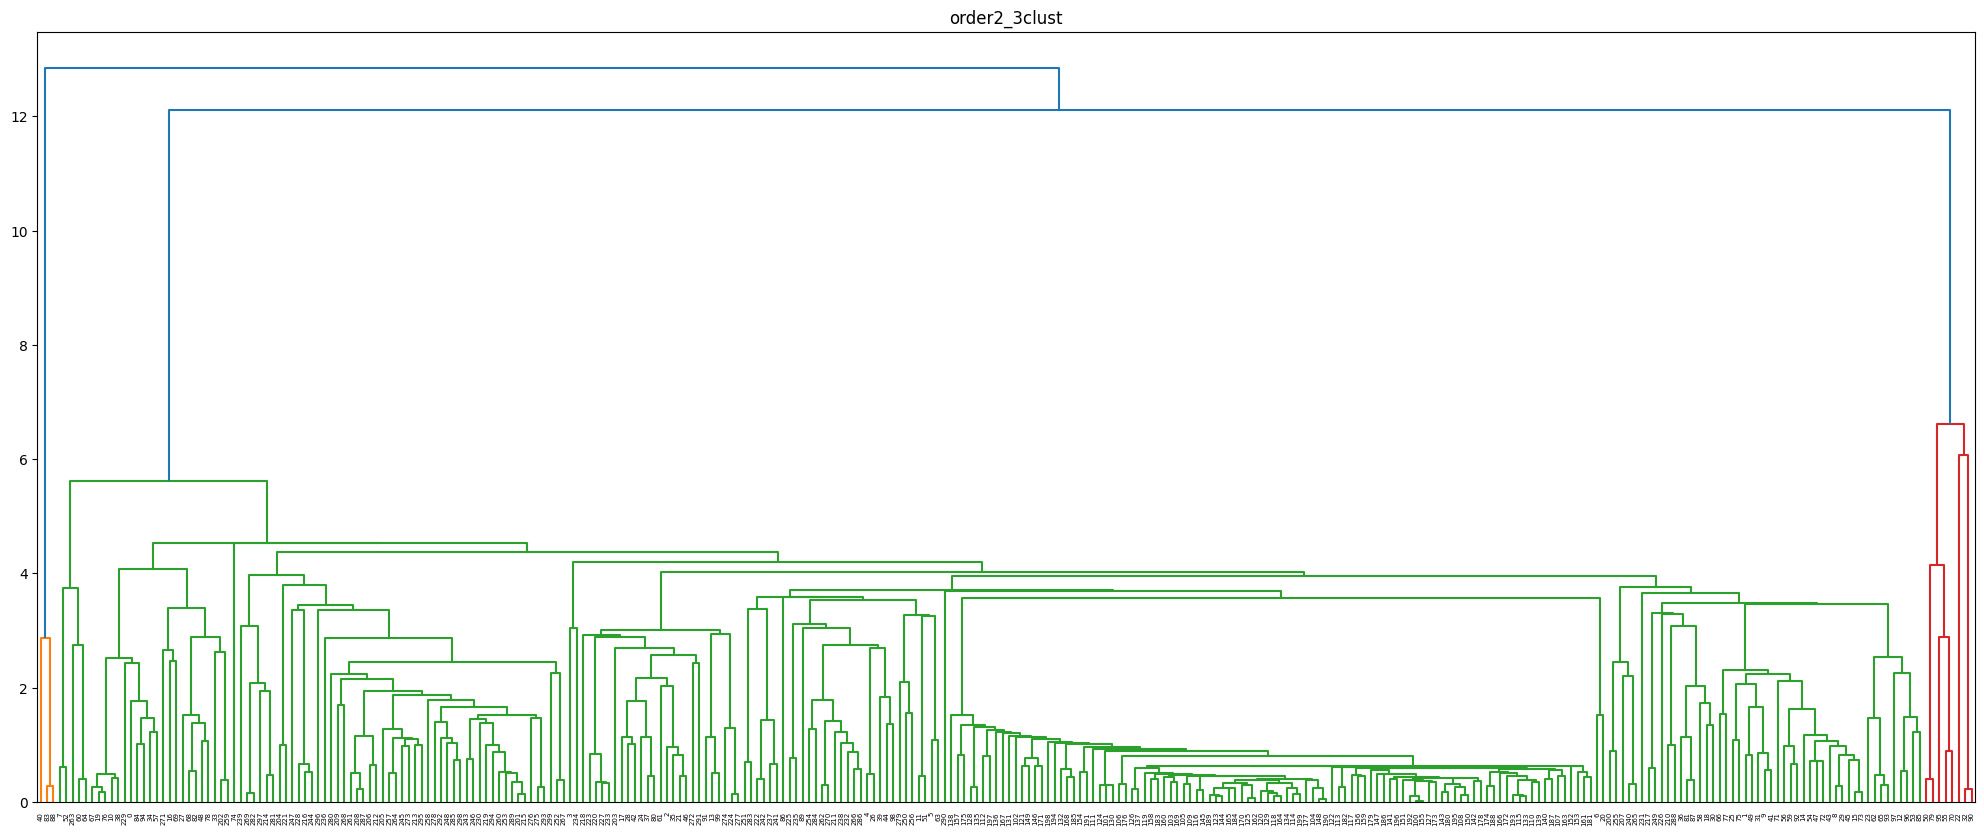

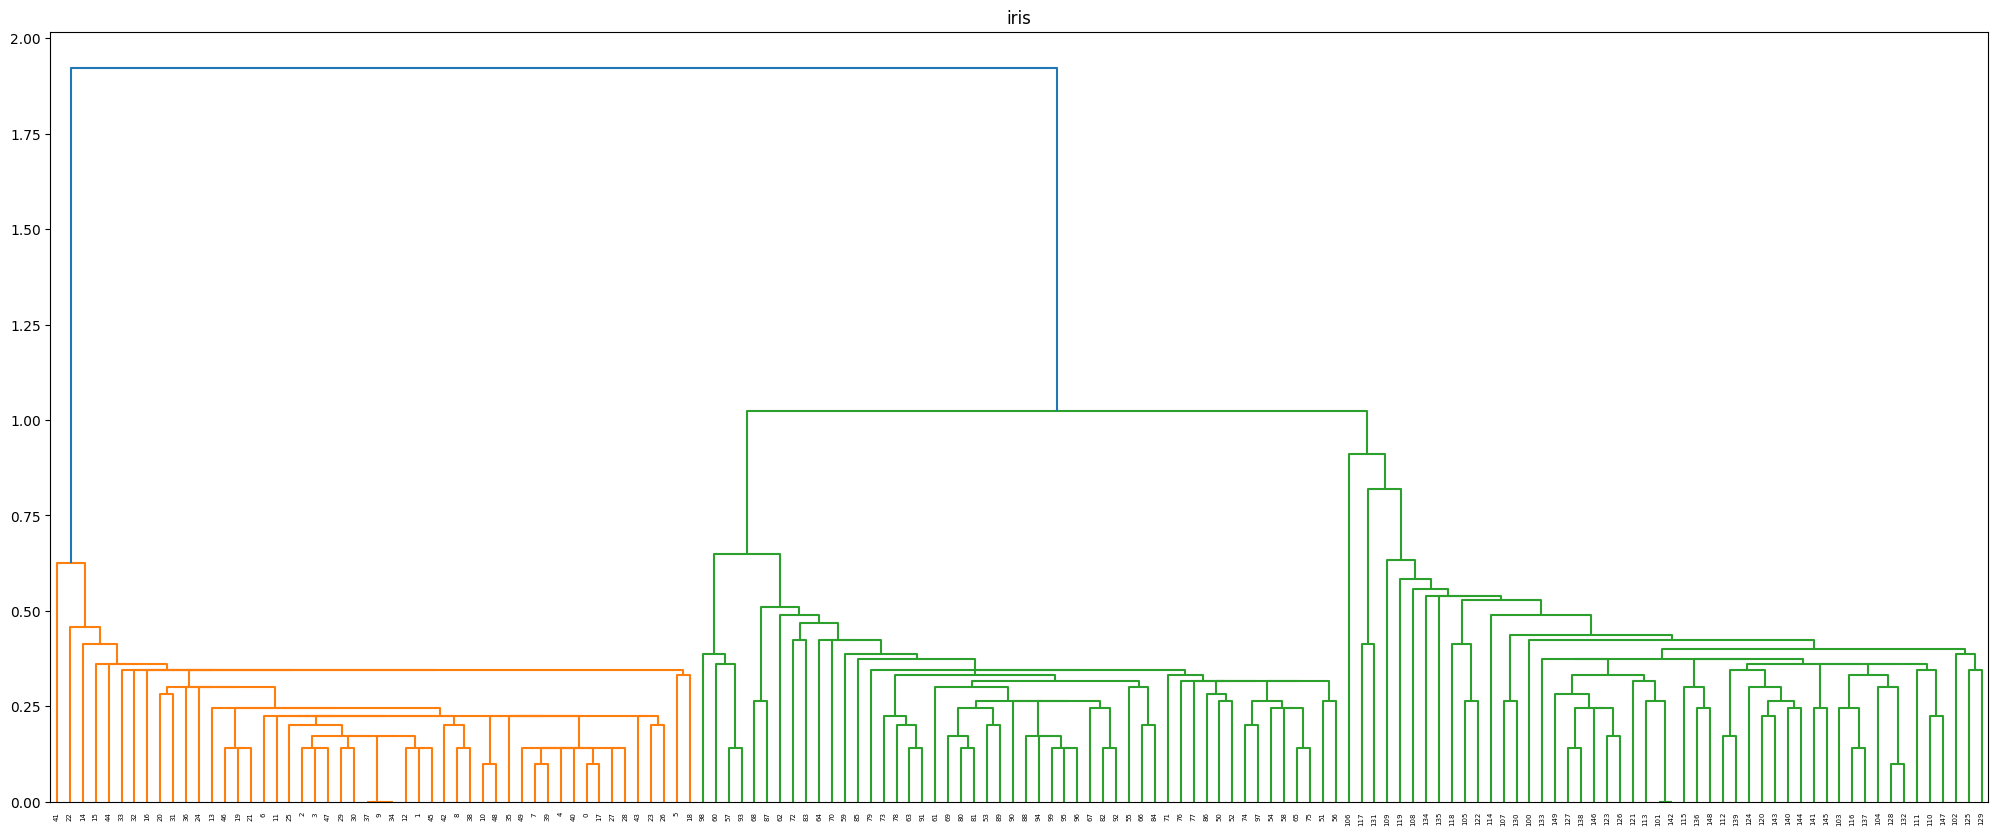

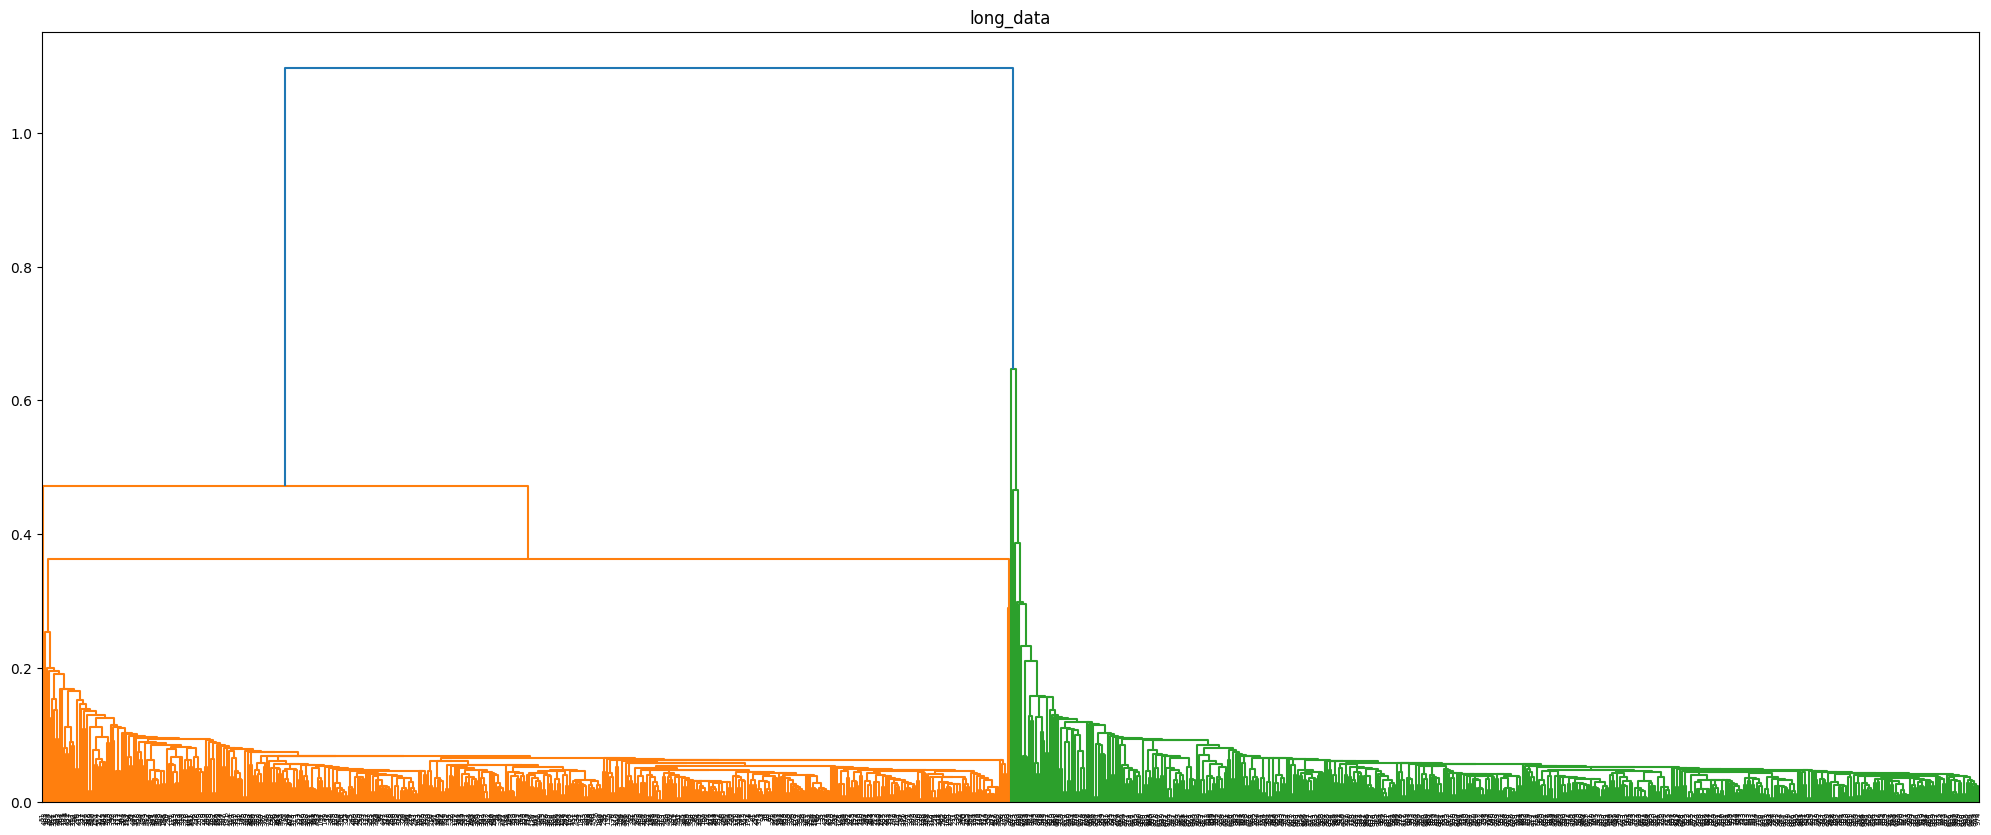

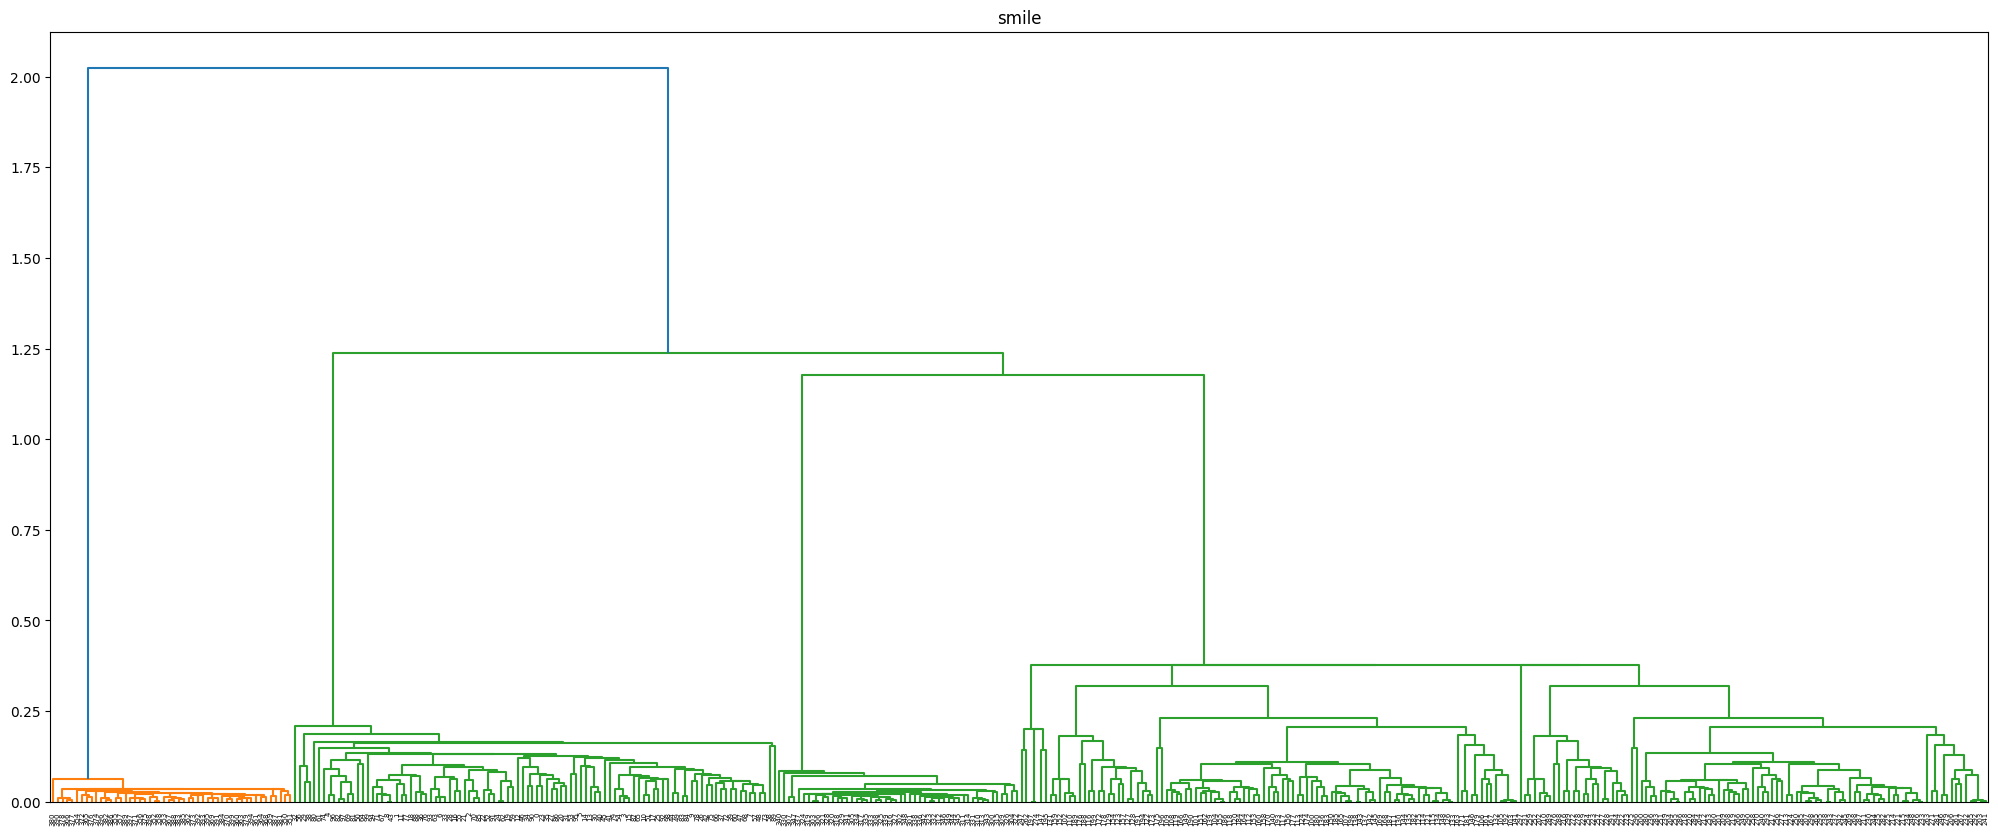

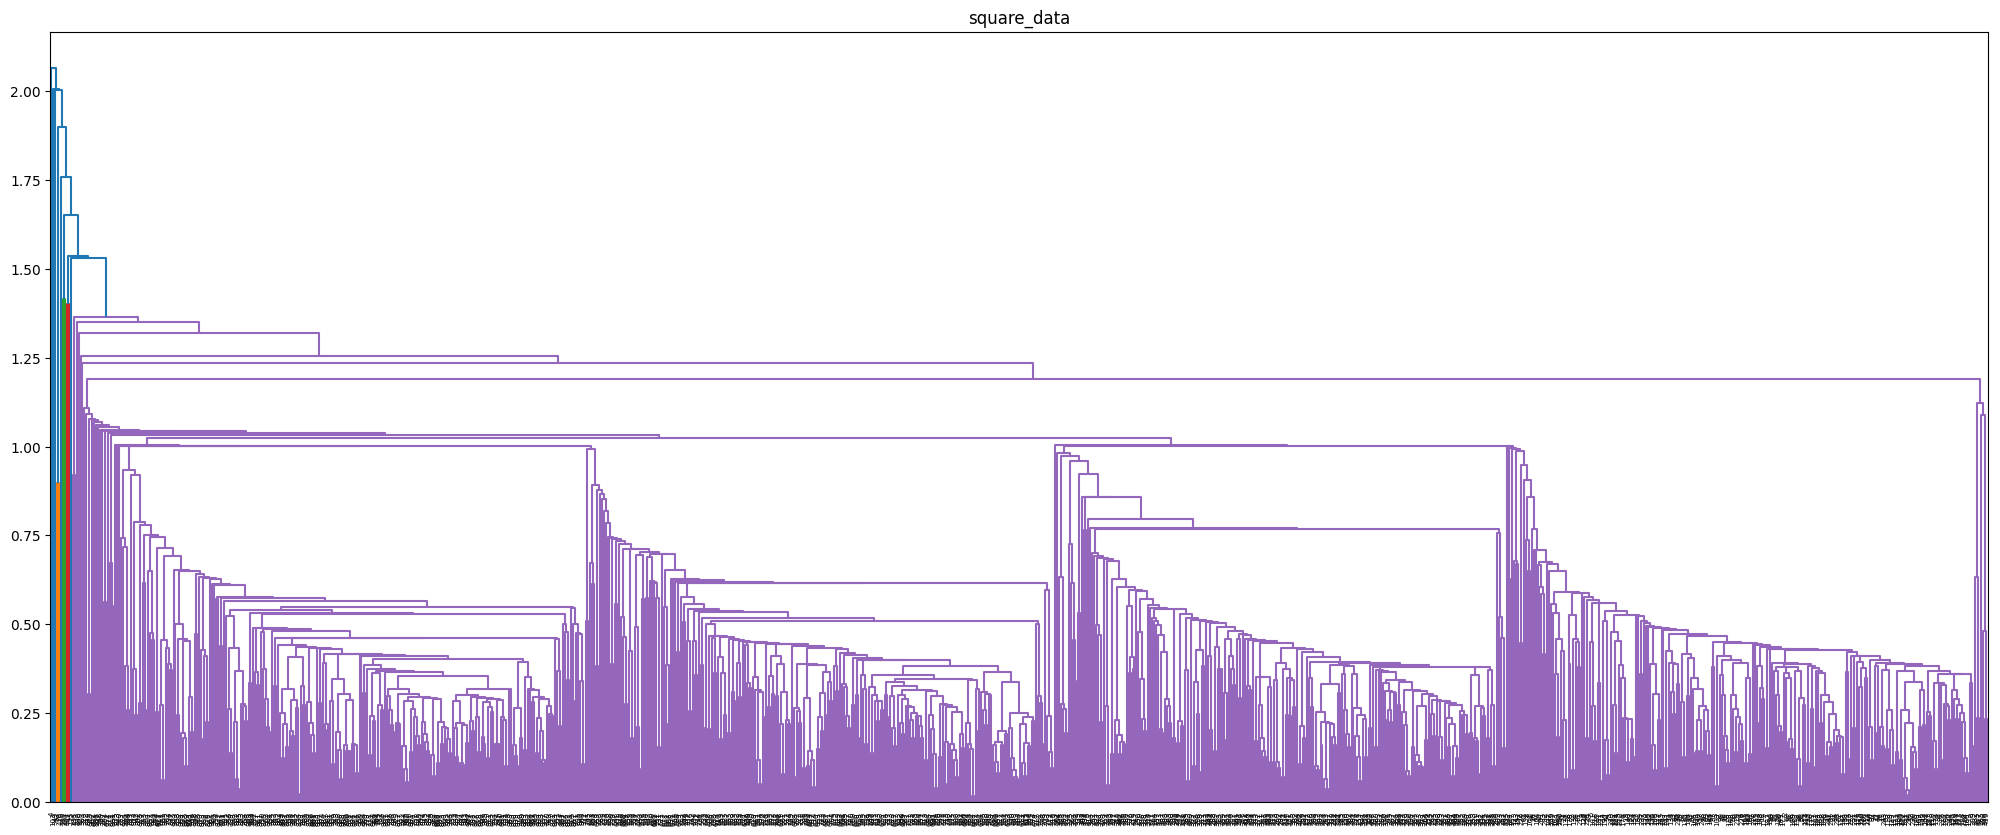

In [72]:
for key in datasets:
    print(key)
    clusters[key].append(linkage(datasets[key], method='complete', metric='euclidean', optimal_ordering=True))
    fig = plt.figure(figsize=(25, 10))
    dendo = dendrogram(clusters[key][0], show_contracted=True)
    plt.title(key)
    plt.show()

# Ward variance


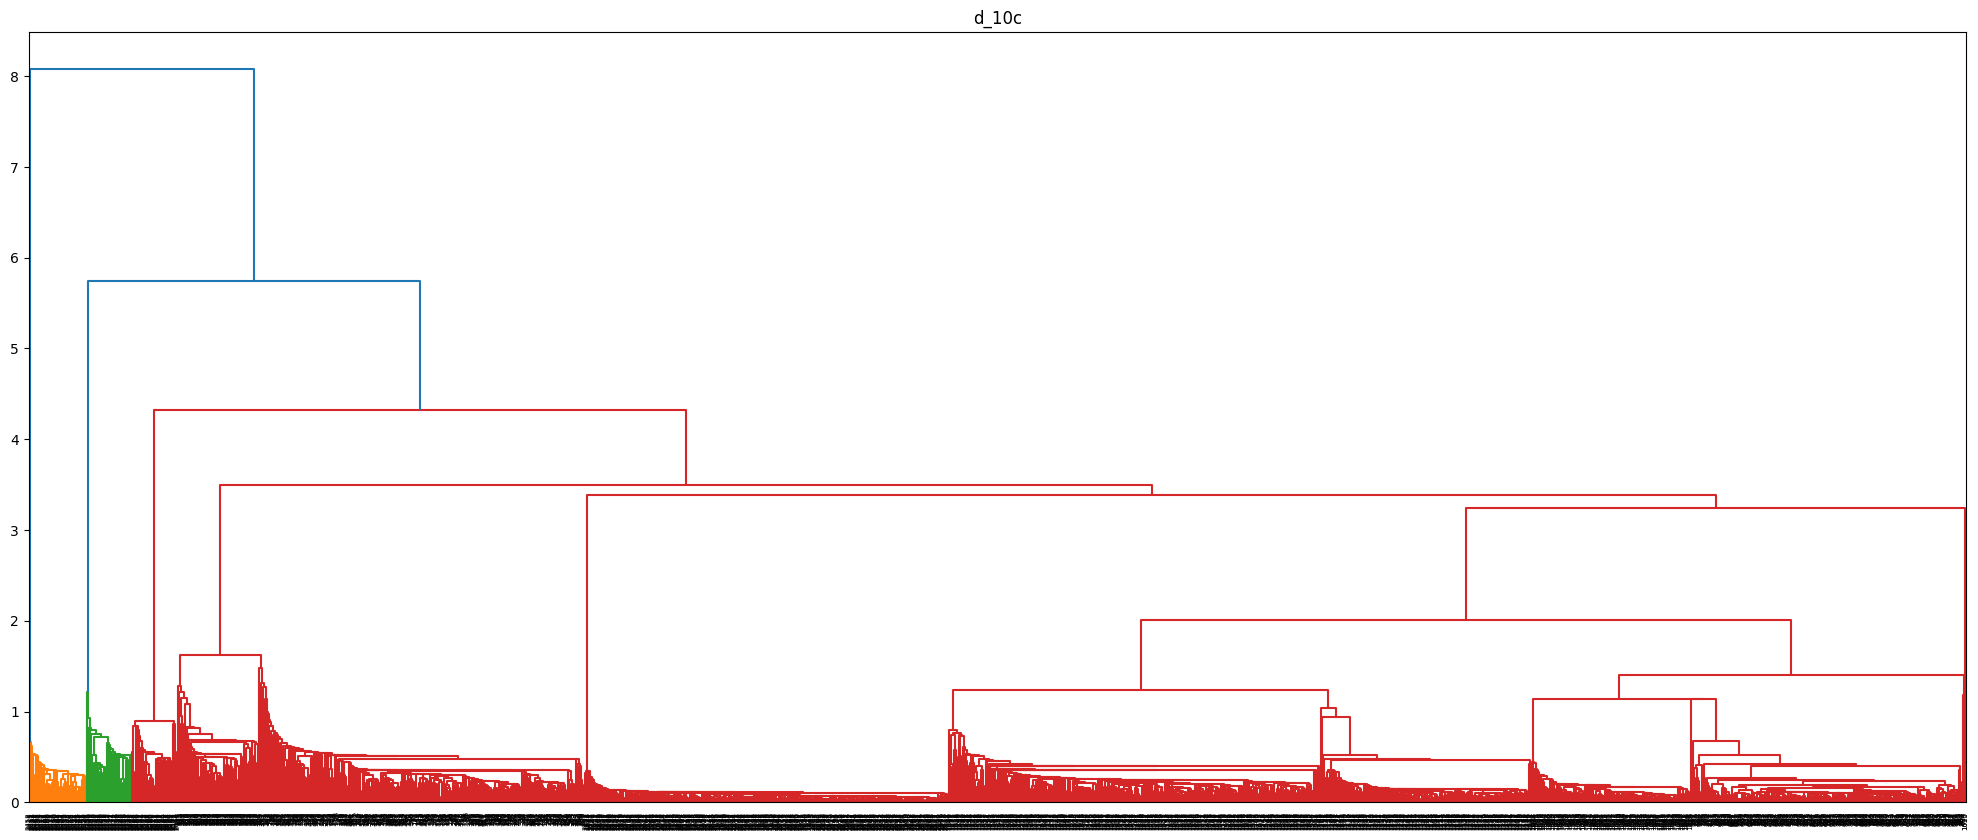

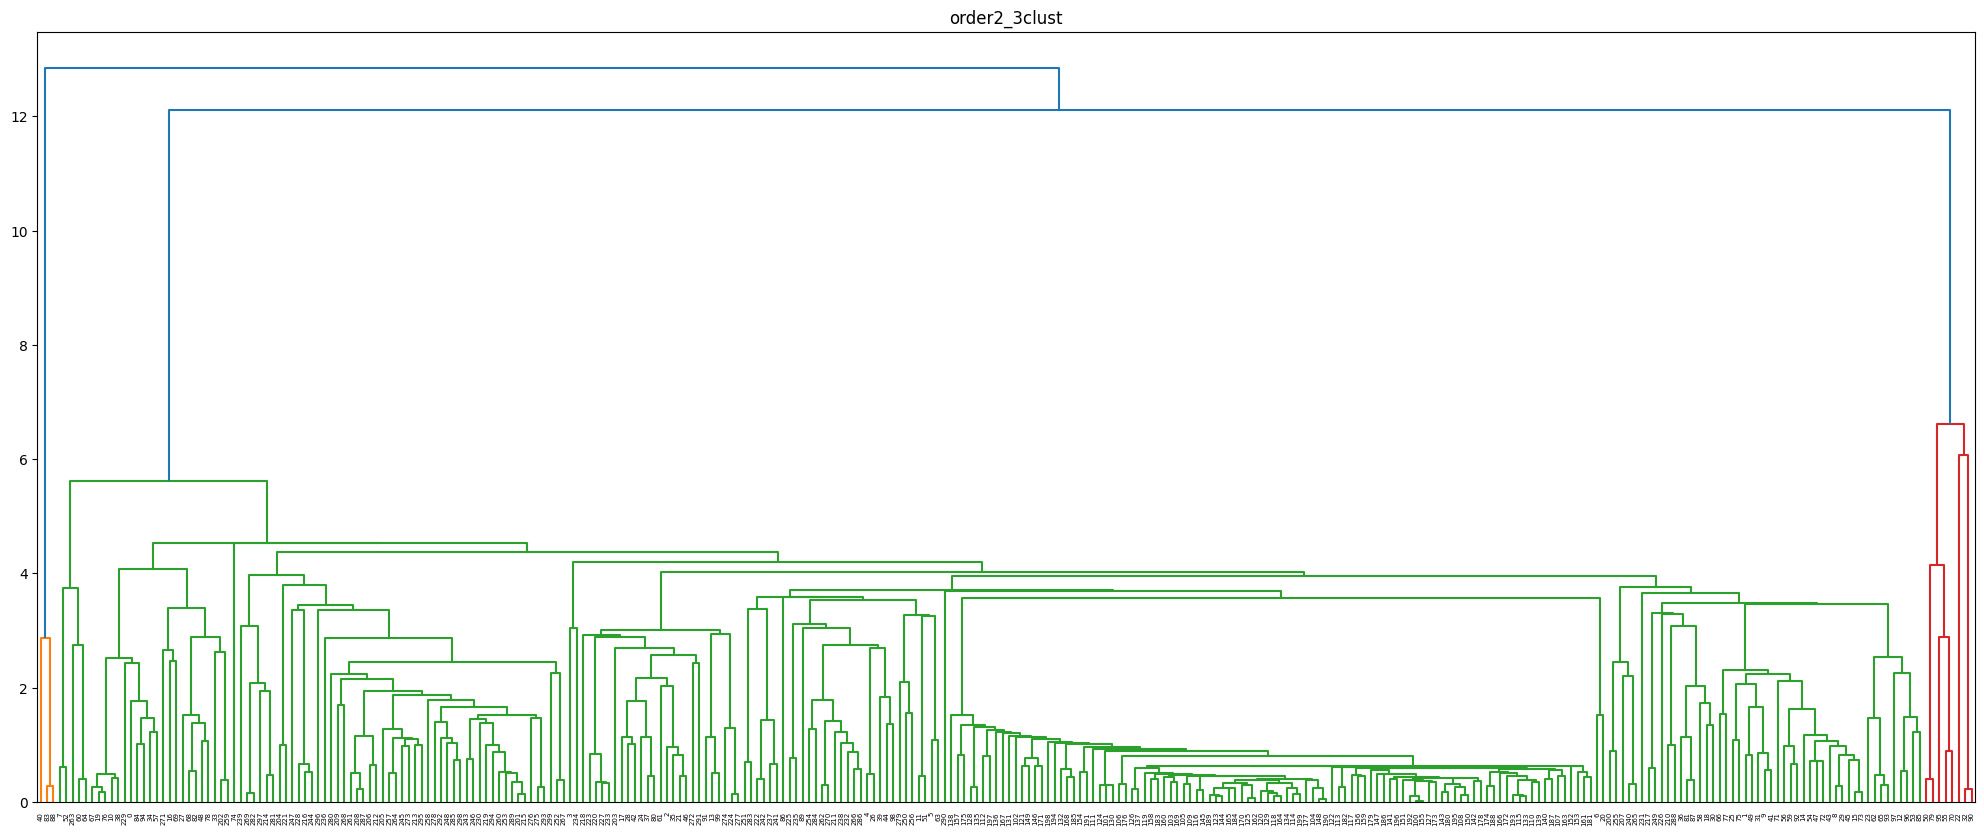

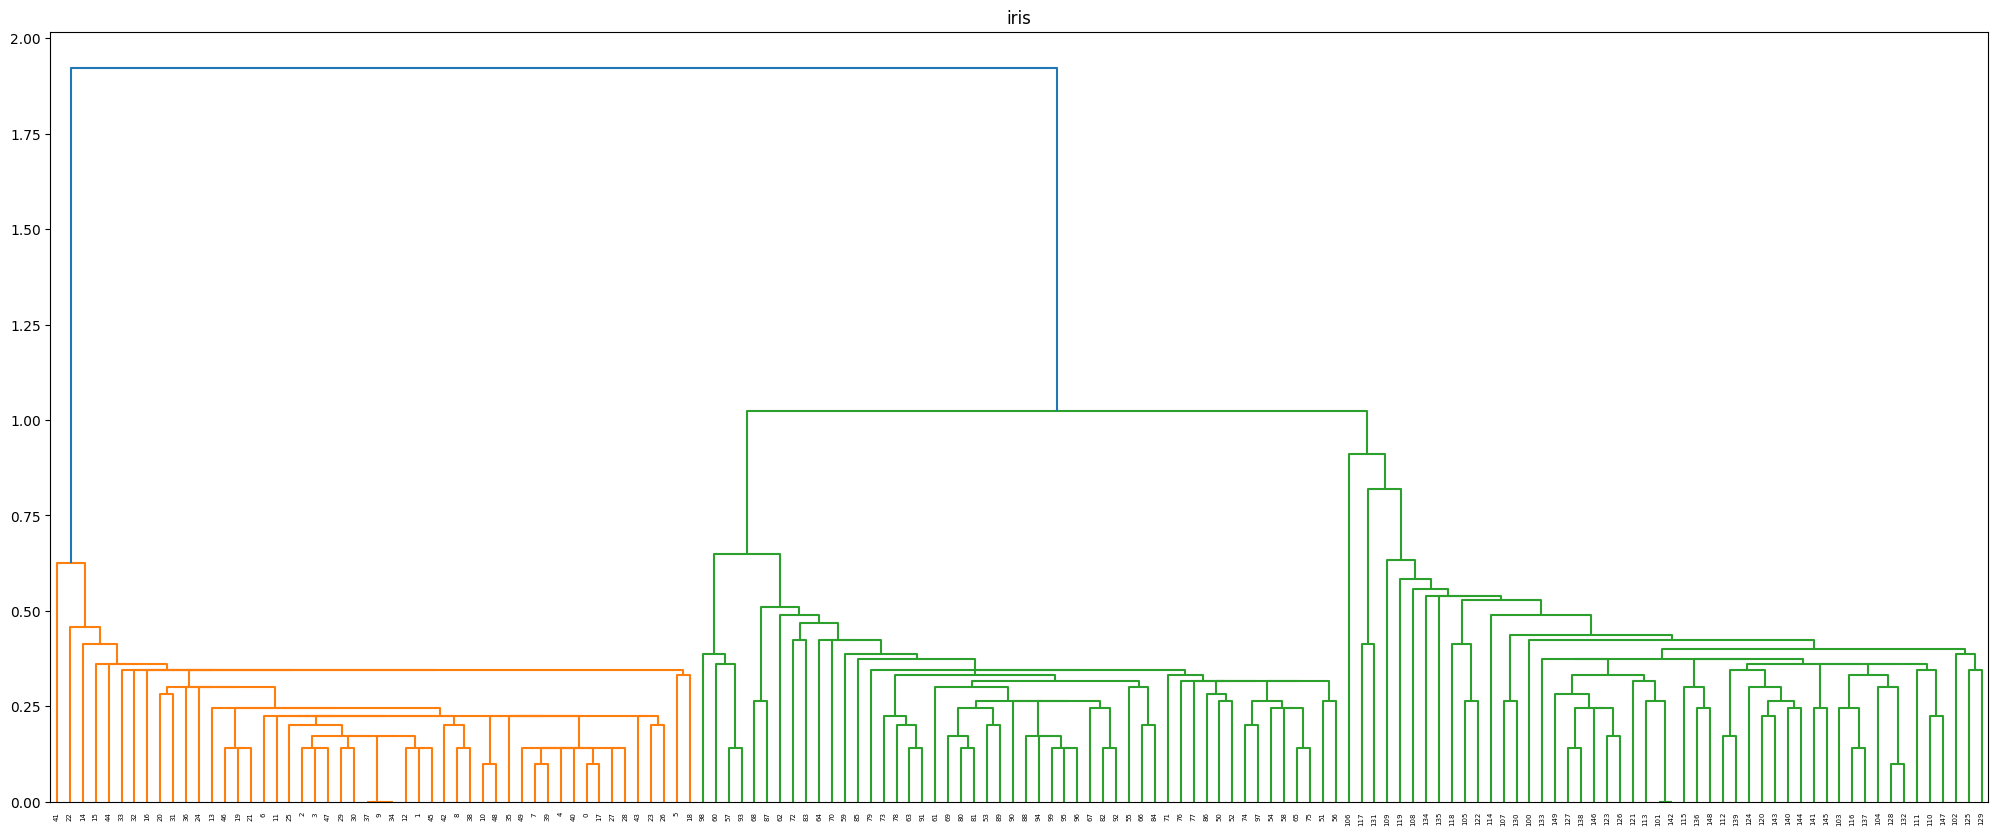

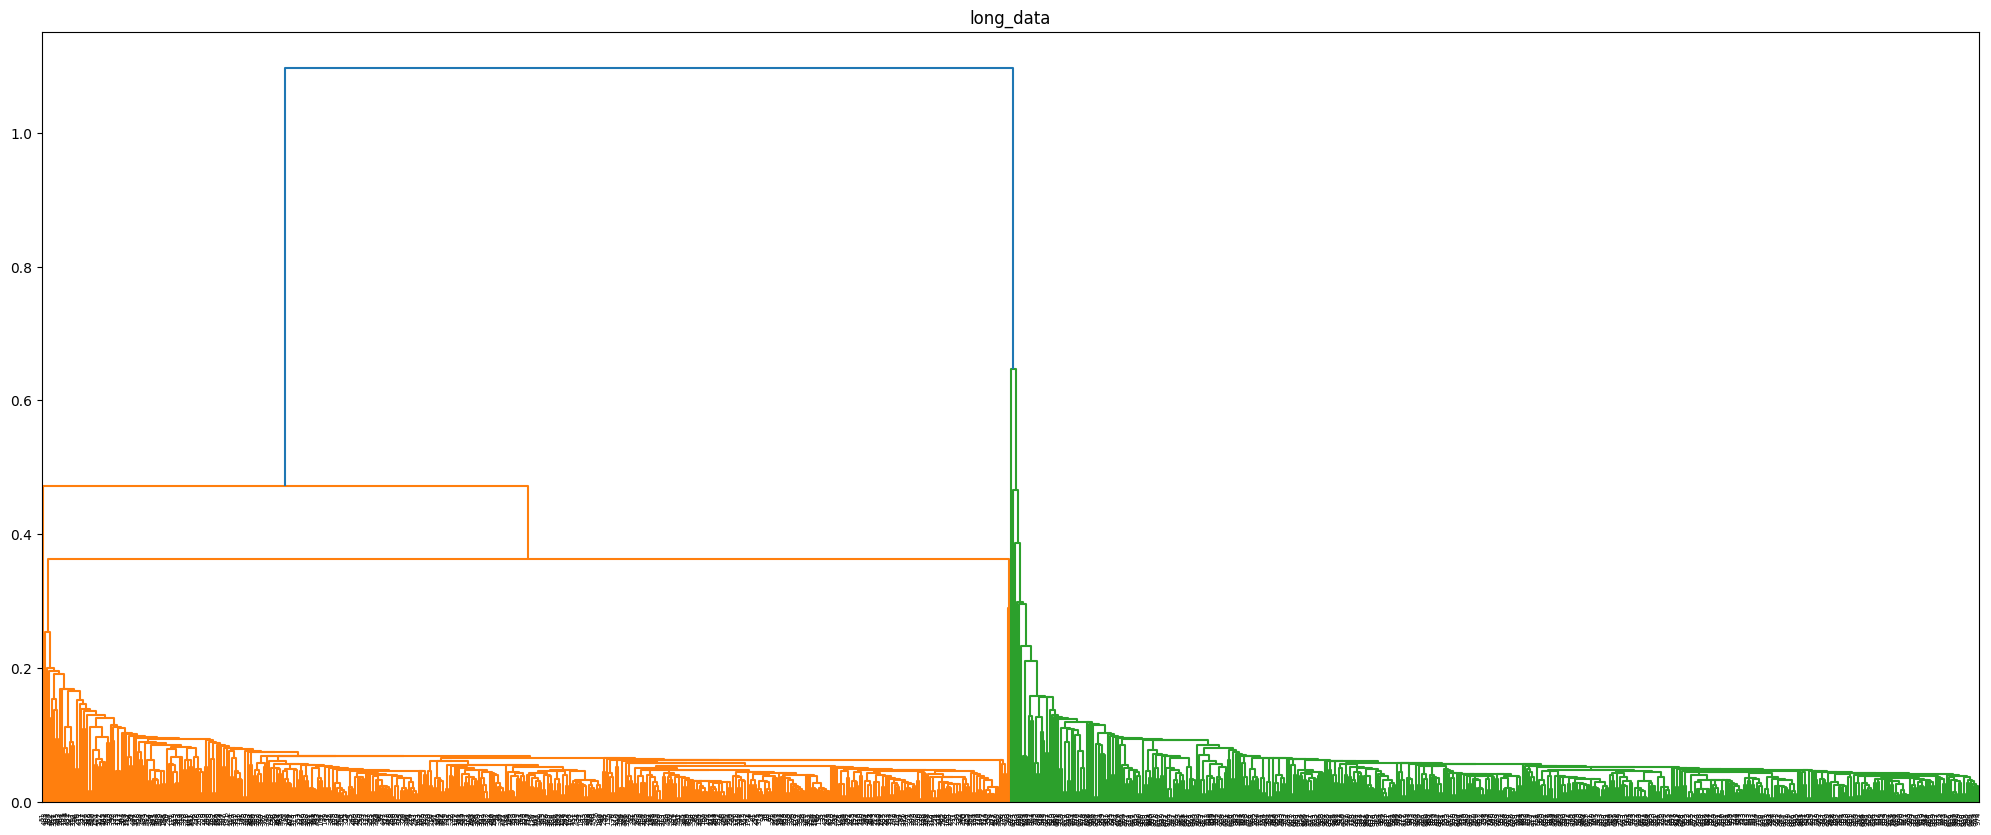

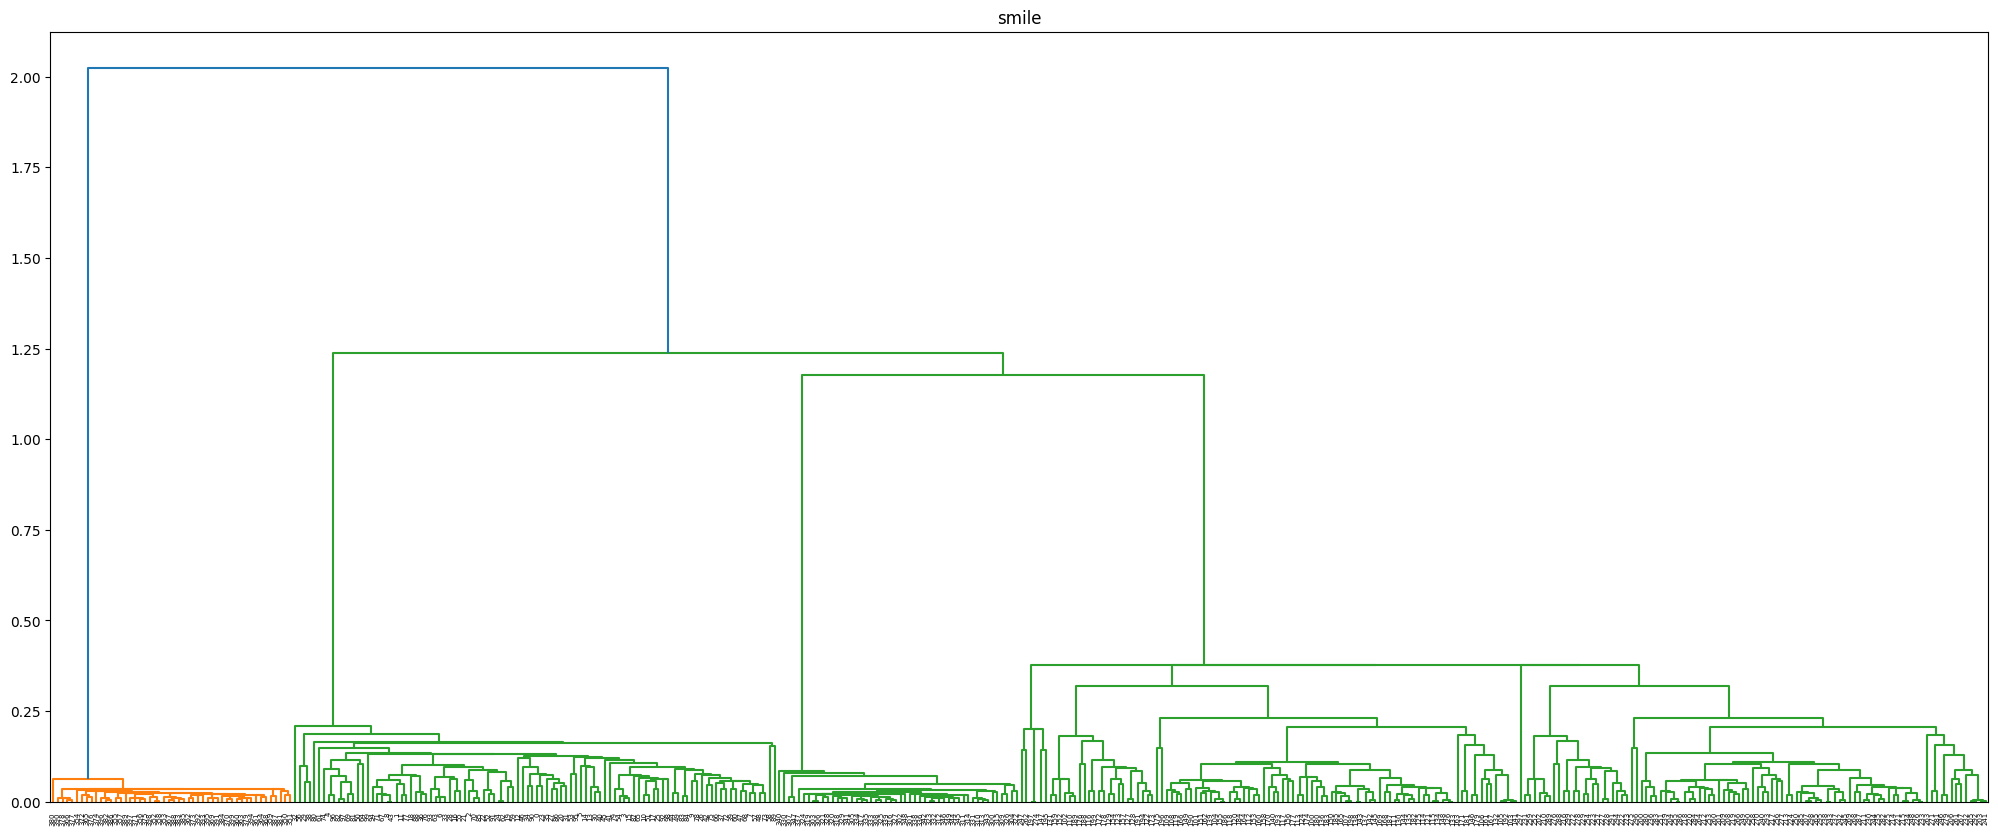

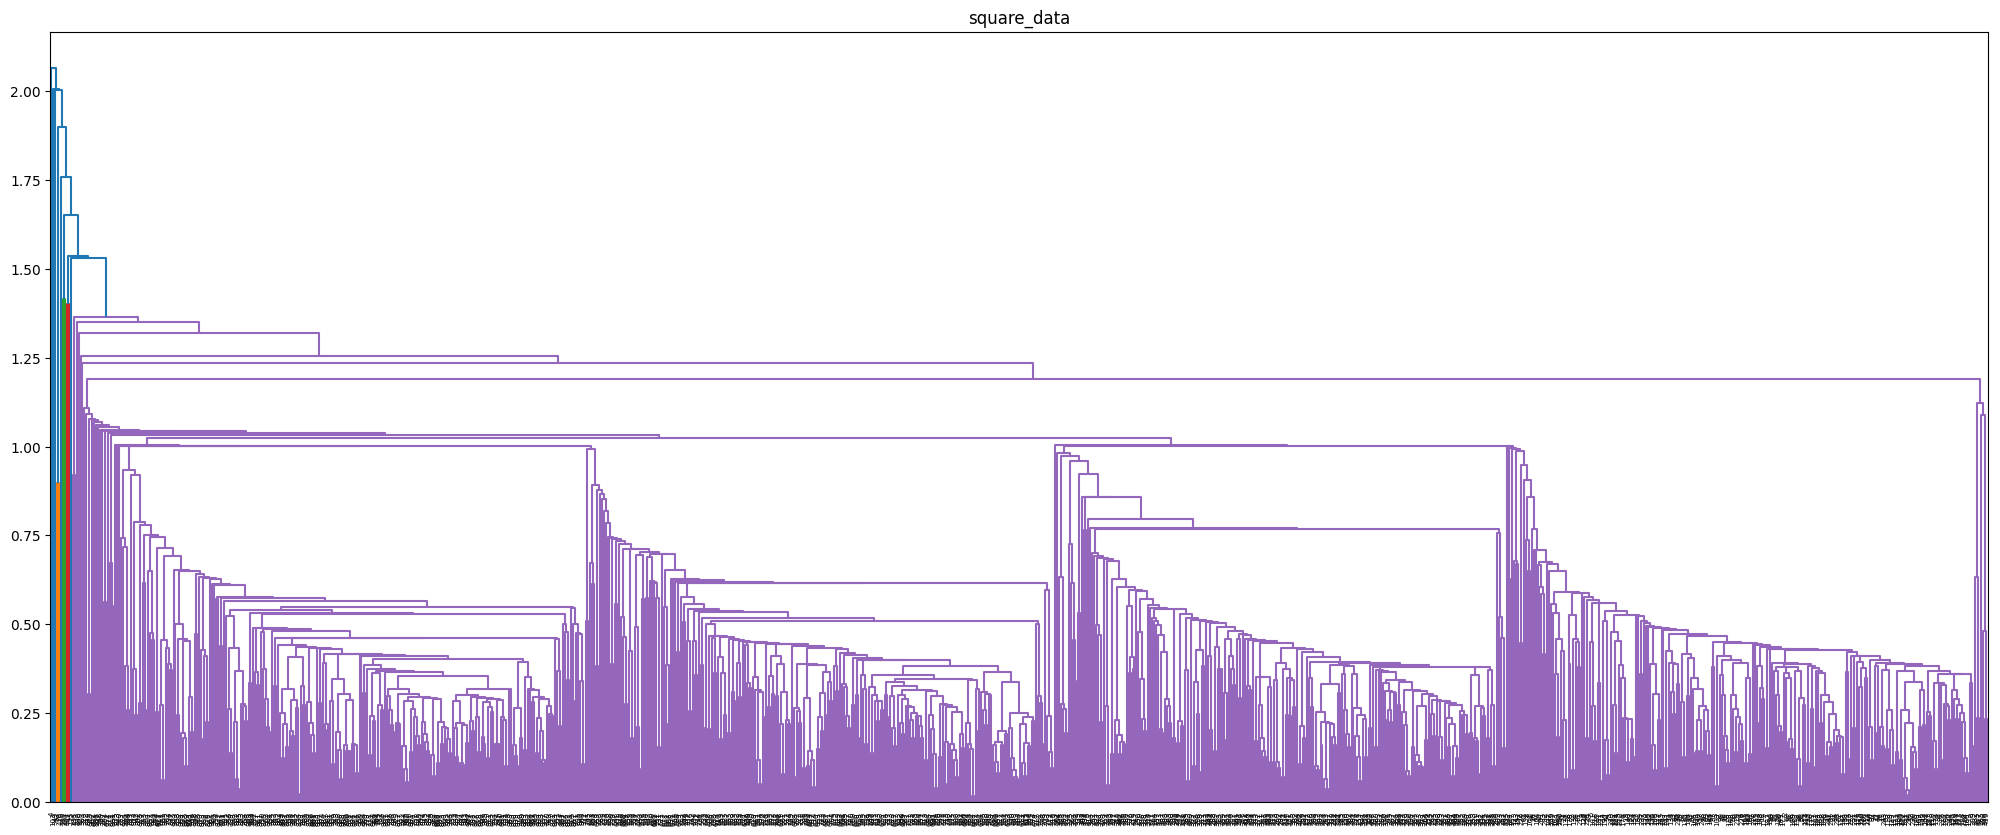

In [70]:
for key in datasets:
    print(key)
    clusters[key].append(linkage(datasets[key], method='ward', metric='euclidean'))
    fig = plt.figure(figsize=(25, 10))
    dendo = dendrogram(clusters[key][0])
    plt.title(key)
    plt.show()

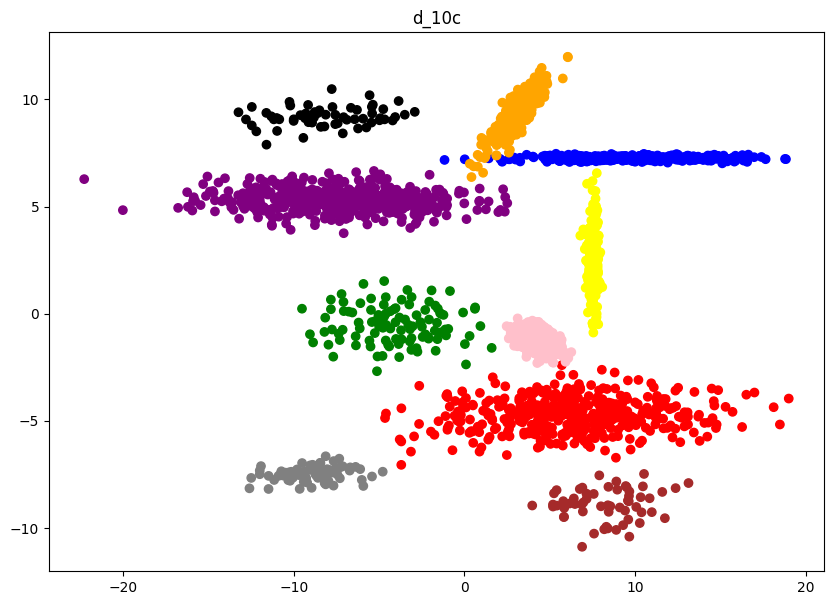

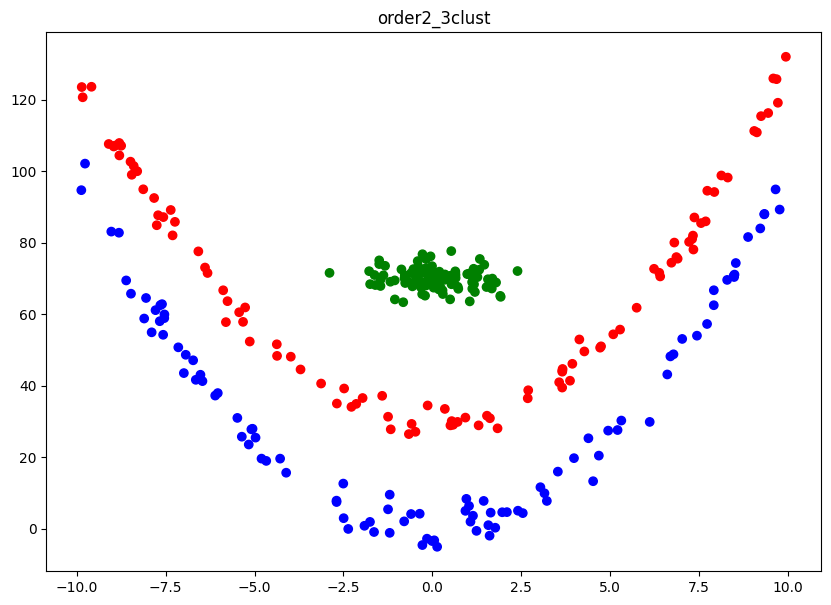

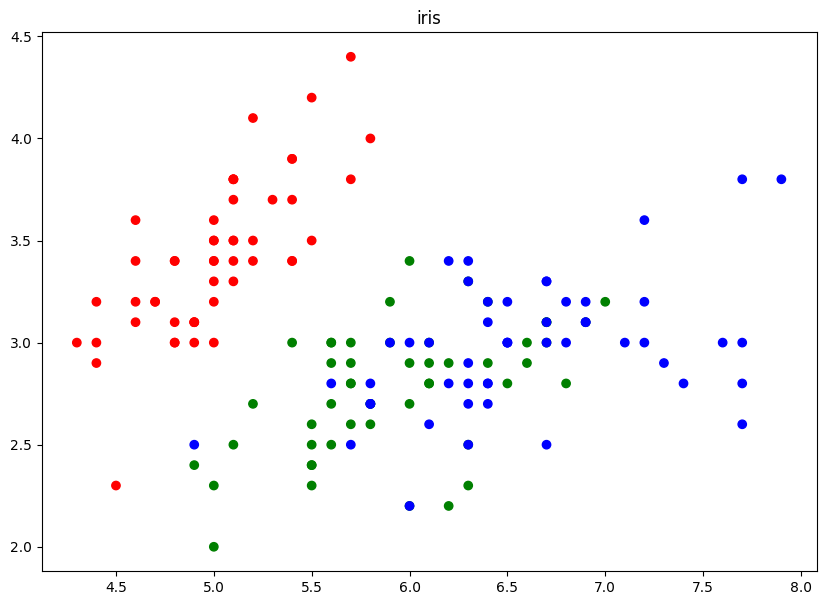

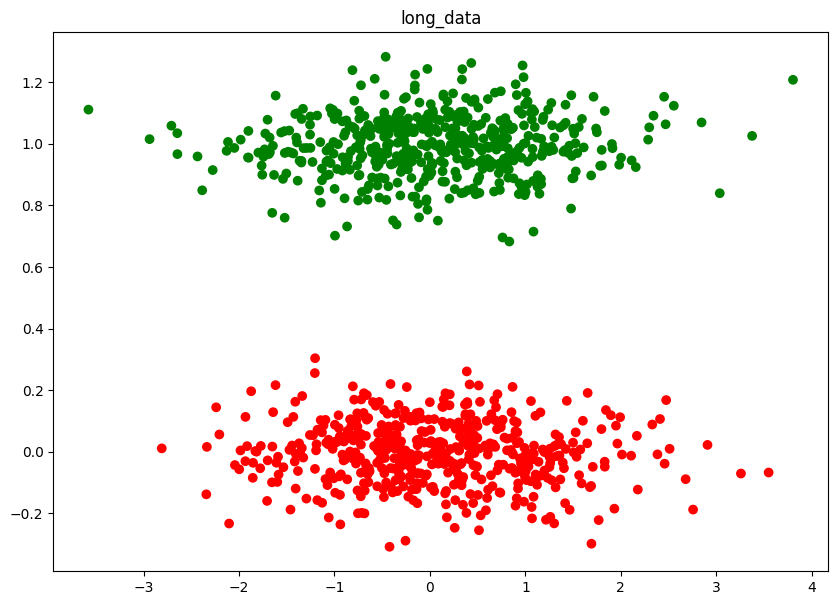

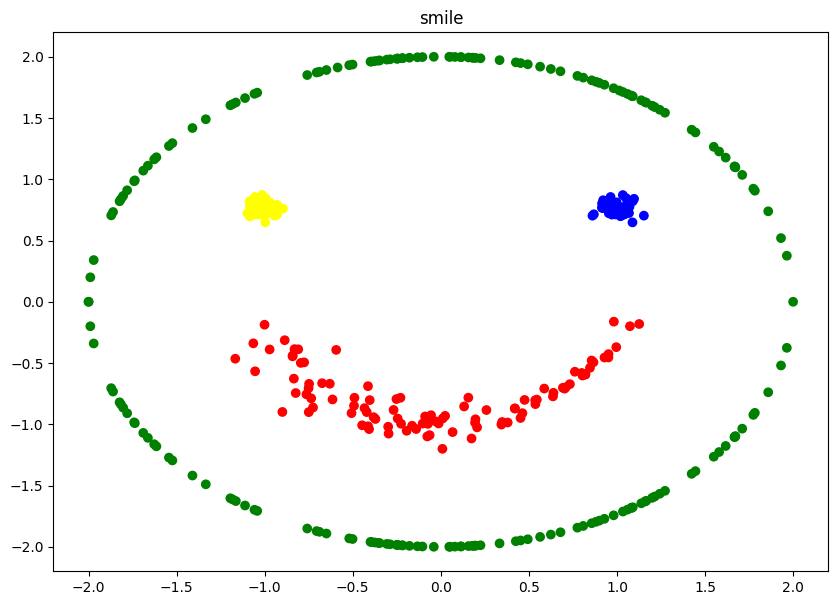

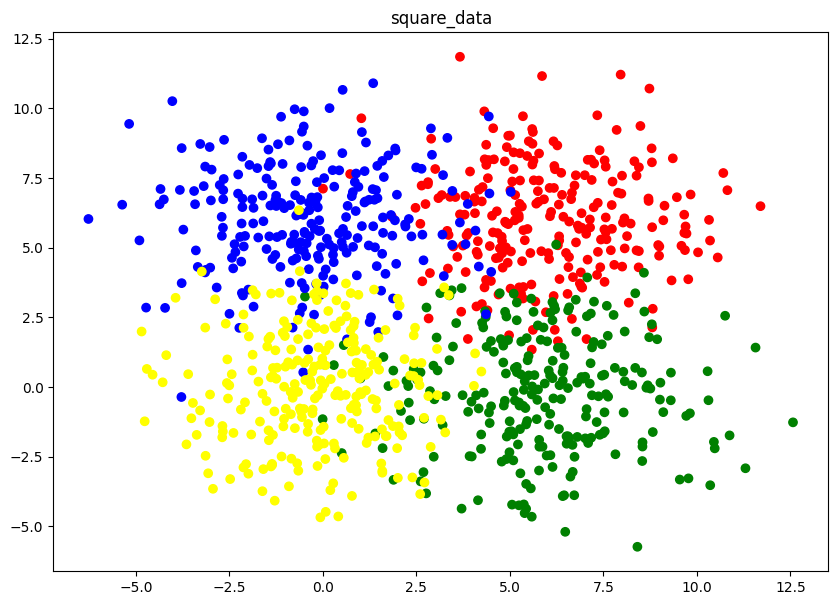

In [37]:
# Visualize the clusters
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']

for key in datasets.keys():
    # scatter the dataset with different colors for each class
    k = len(np.unique(datasets_classes[key]))
    custom_cmap = ListedColormap(colors[:k])
    plt.figure(figsize=(10, 7))
    plt.scatter(datasets[key][0], datasets[key][1], c=datasets_classes[key], cmap=custom_cmap)
    plt.title(key)
    plt.show()

In [40]:
# Special imports
from scipy.cluster.hierarchy import dendrogram, linkage


results = {}

for key in datasets:
    results[key] = {}

for method in ["single", "complete", "average", "ward"]:
    for key in datasets:
        cluster = AgglomerativeClustering(n_clusters=classes[key], affinity='euclidean', linkage=method, compute_full_tree=True)
      
        cluster.fit_predict(datasets[key])

        results[key][method] = cluster.labels_


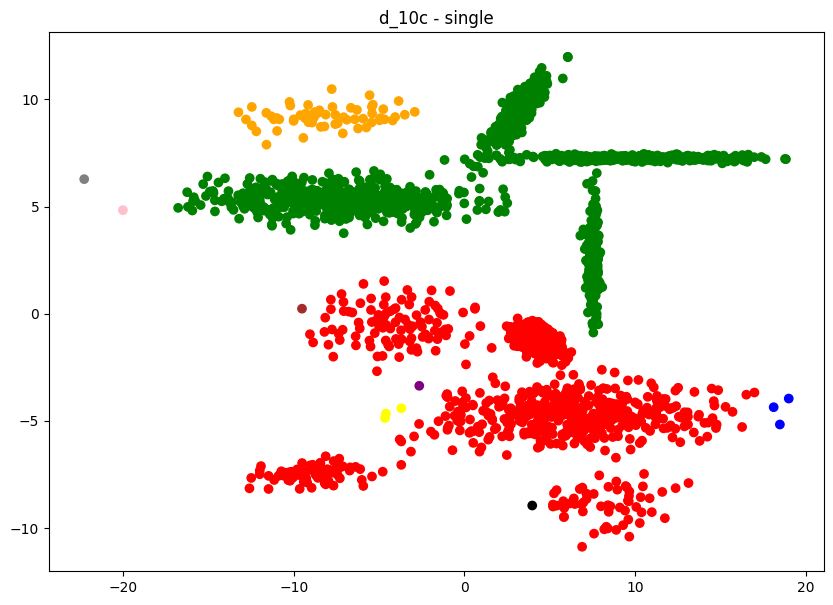

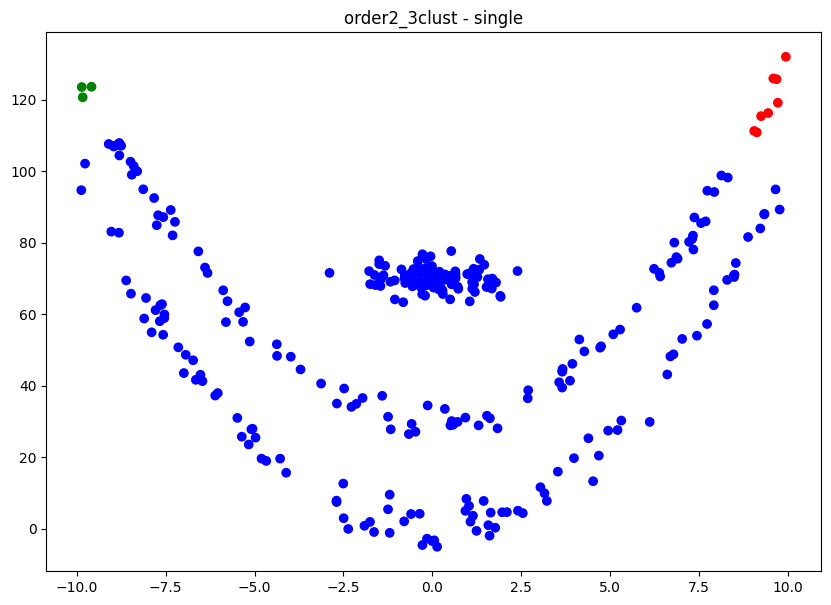

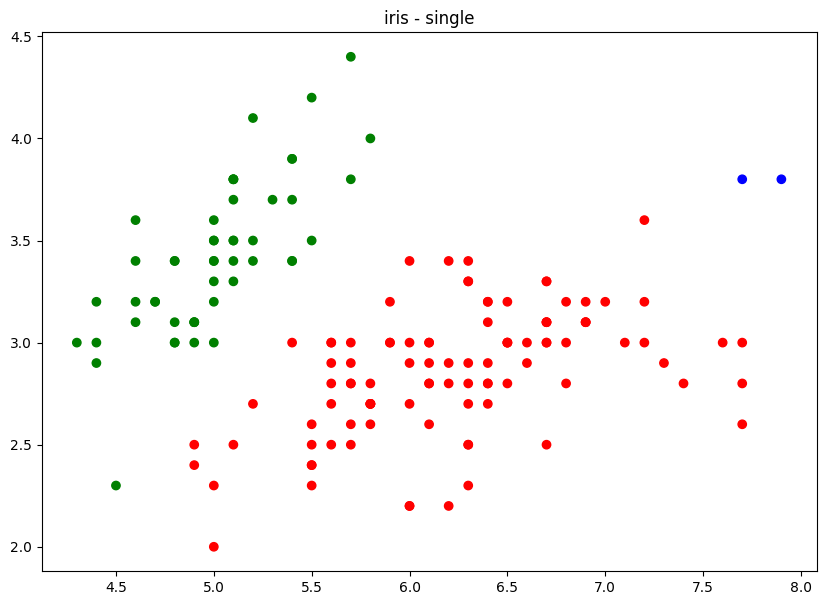

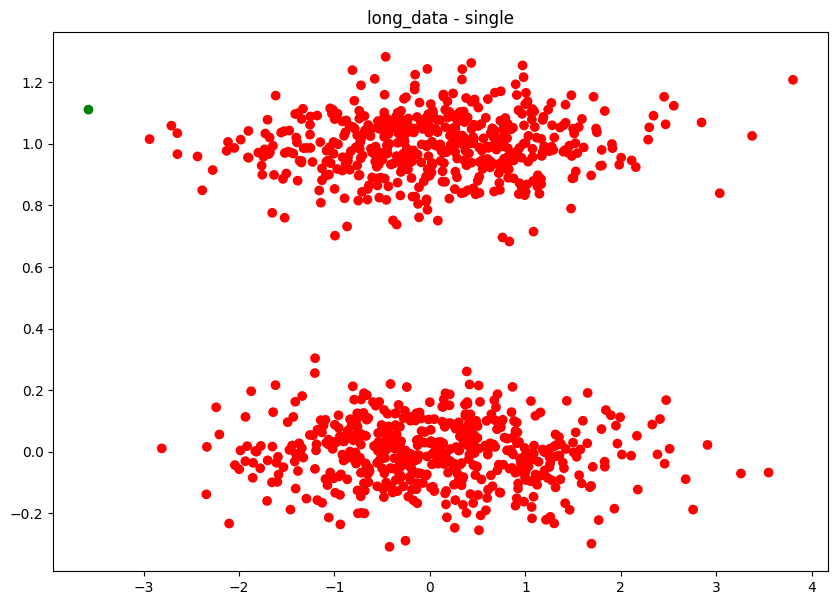

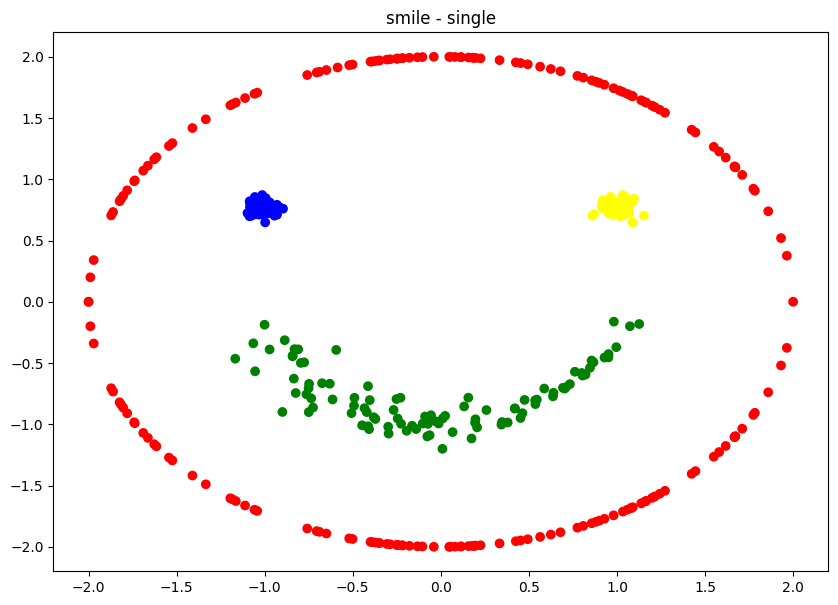

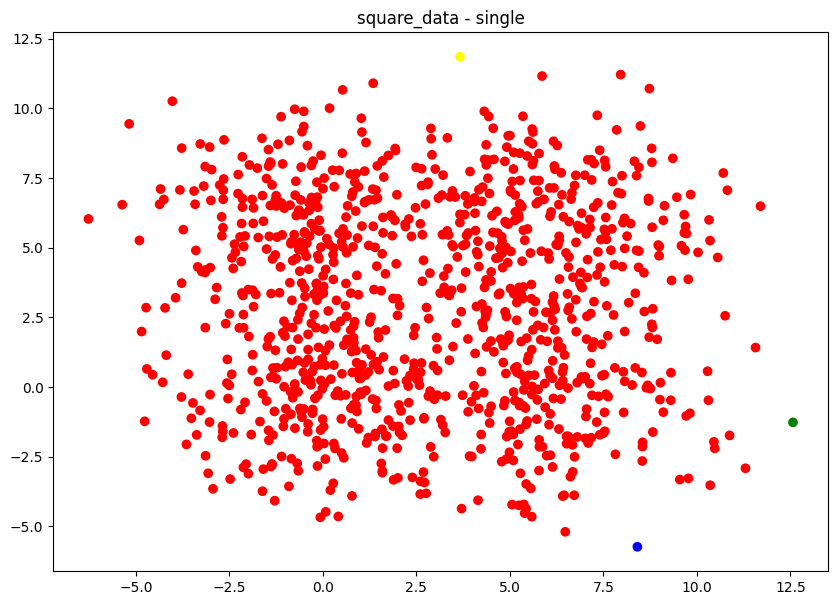

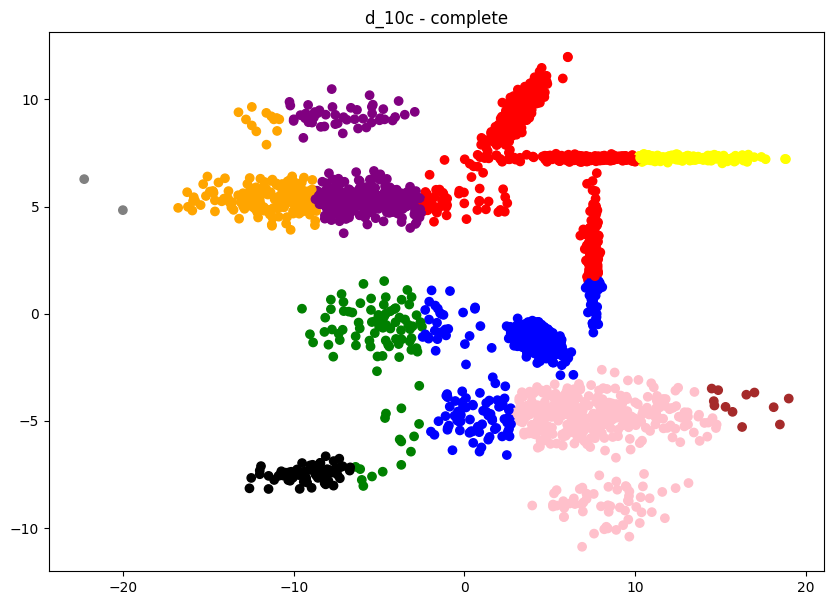

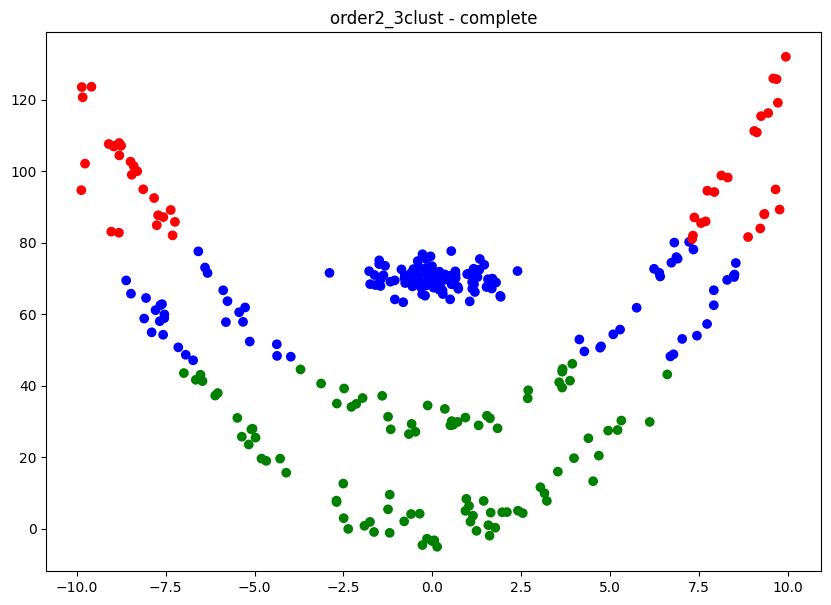

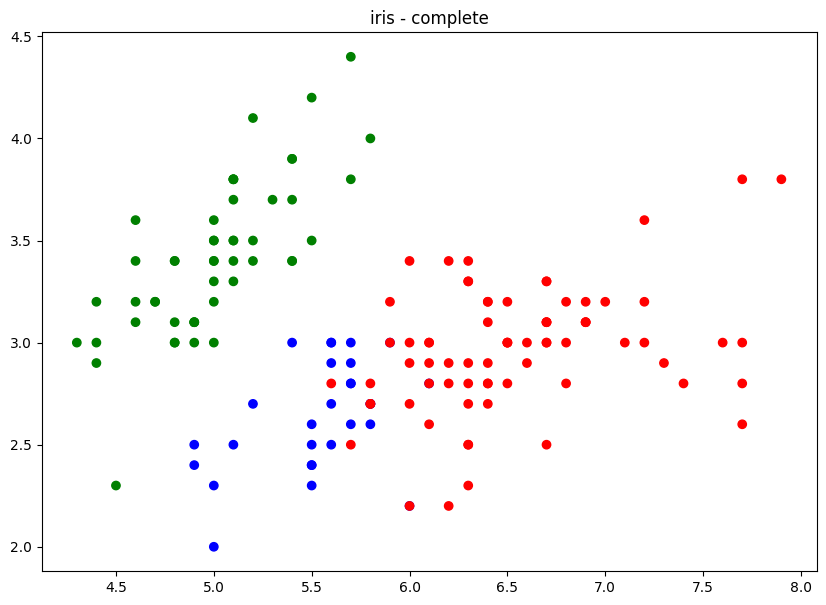

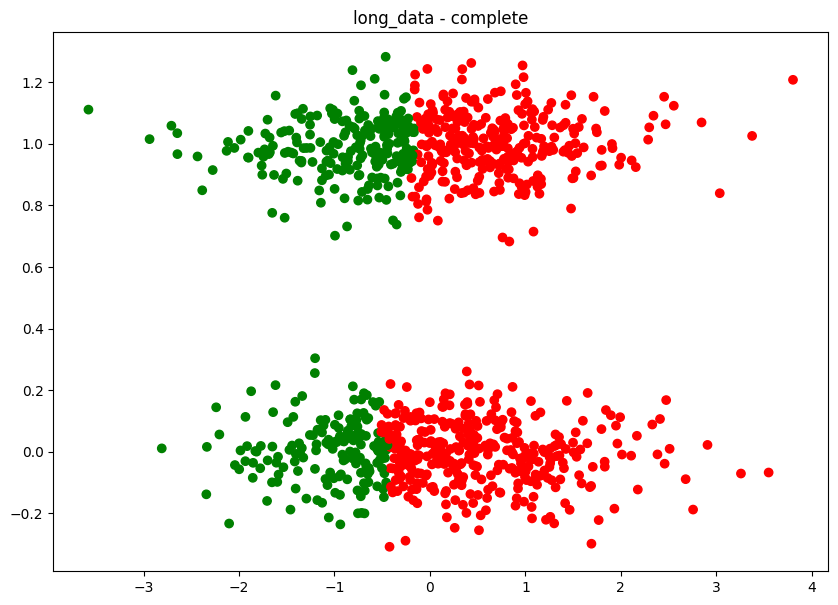

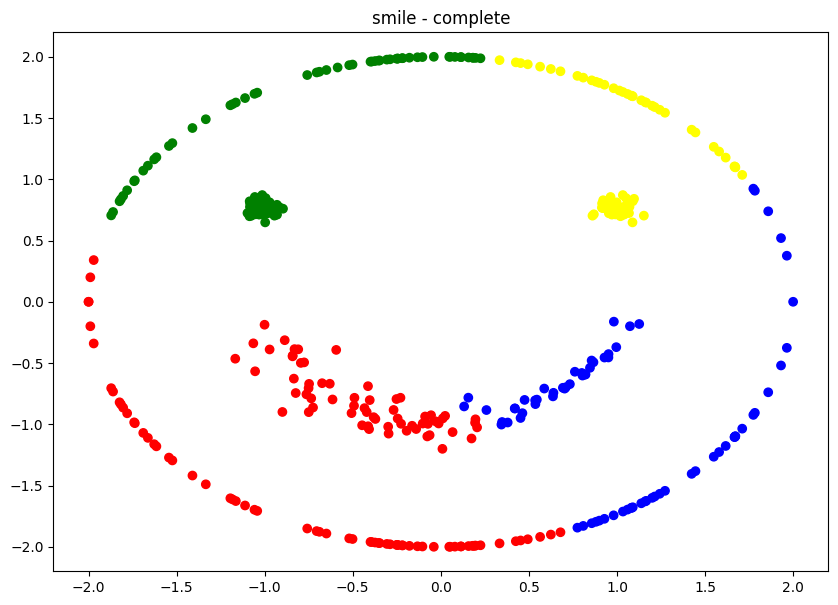

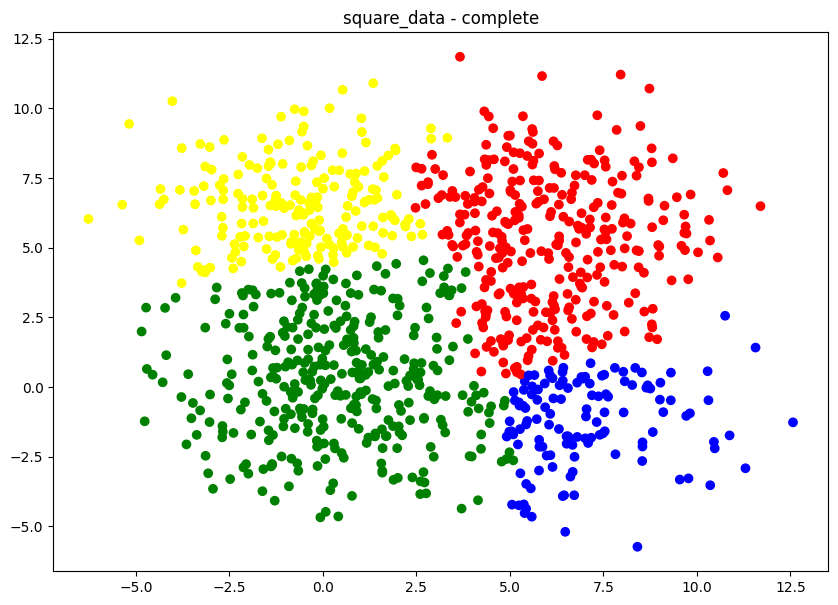

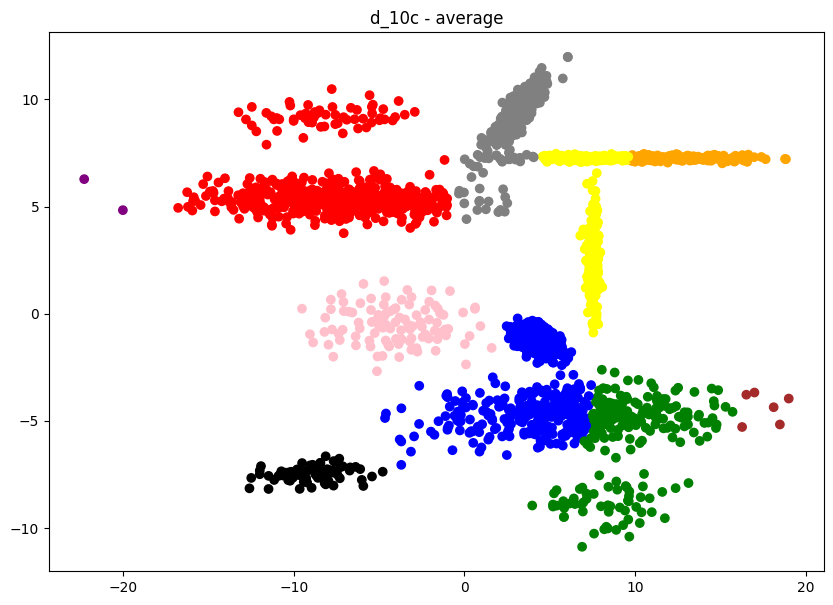

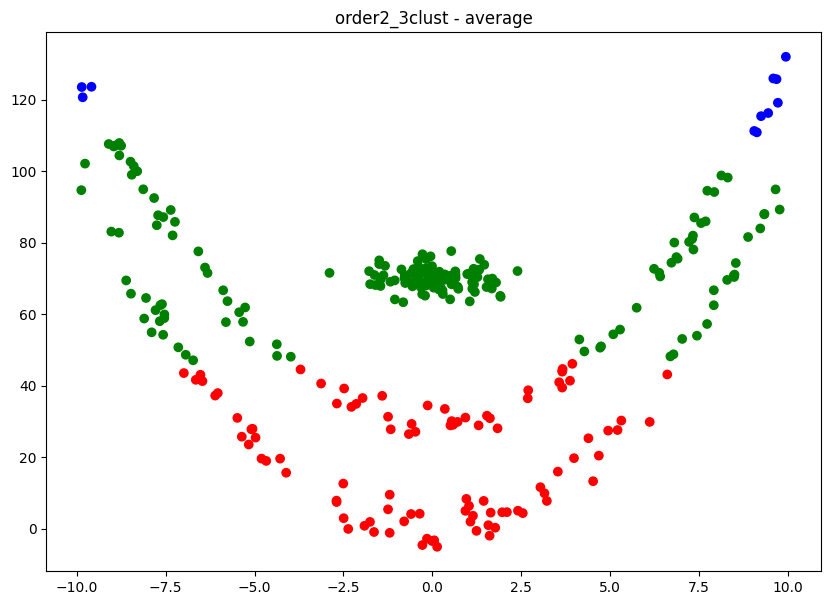

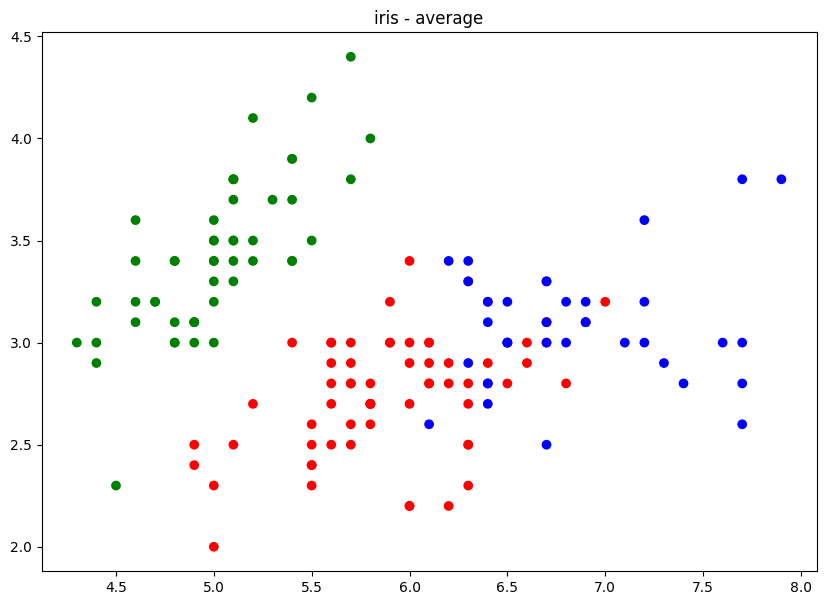

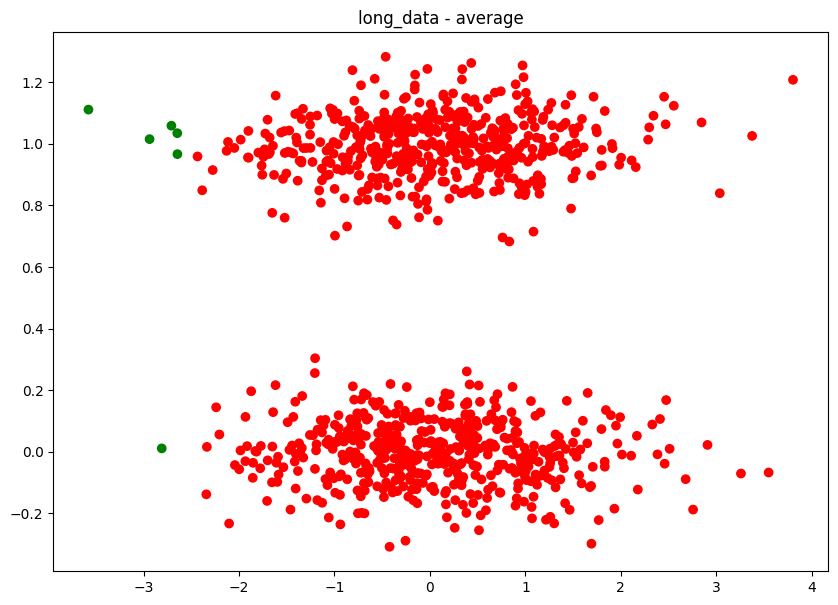

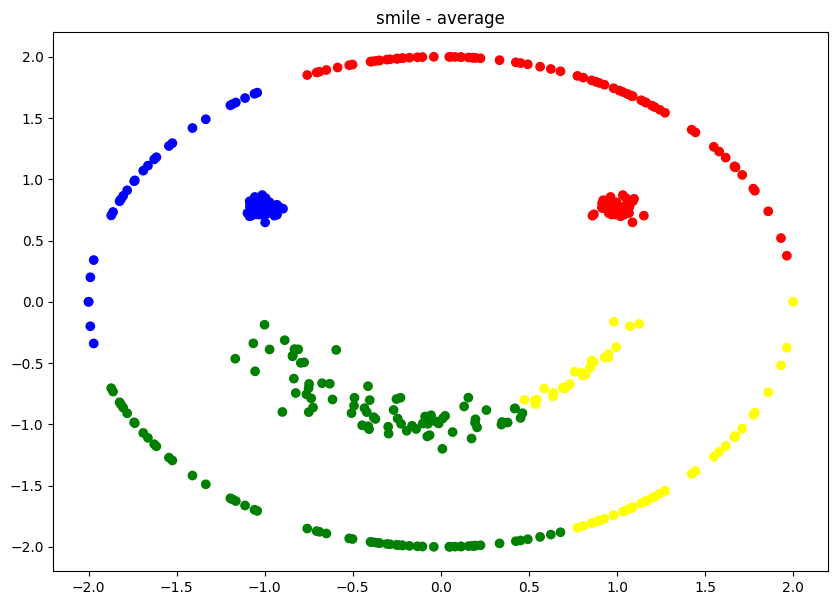

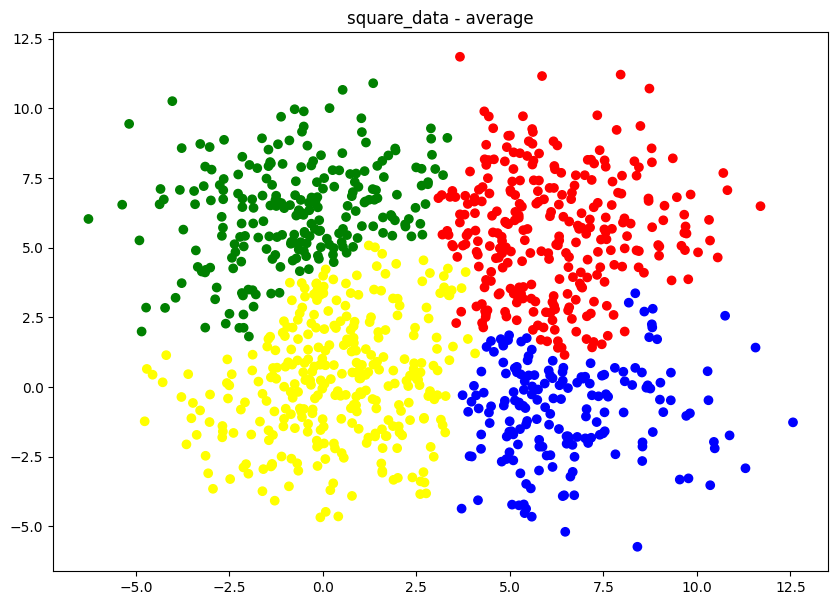

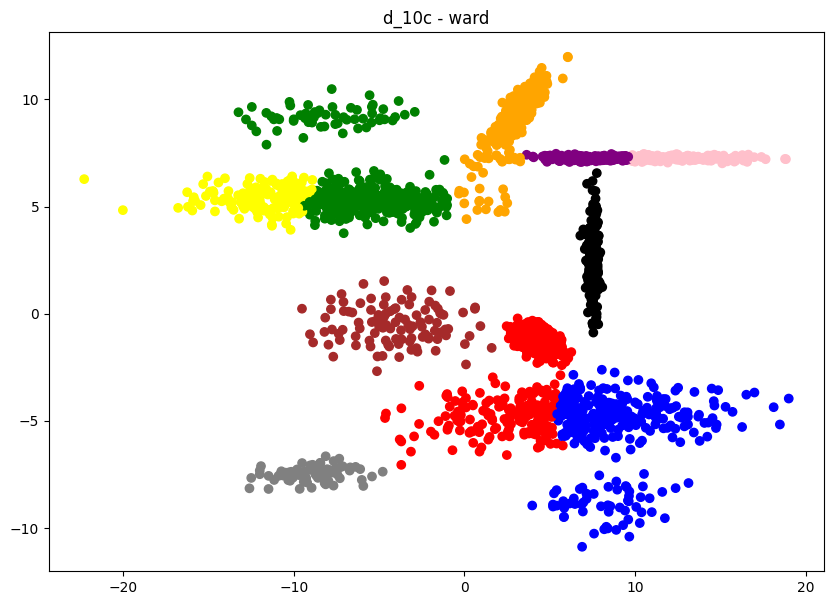

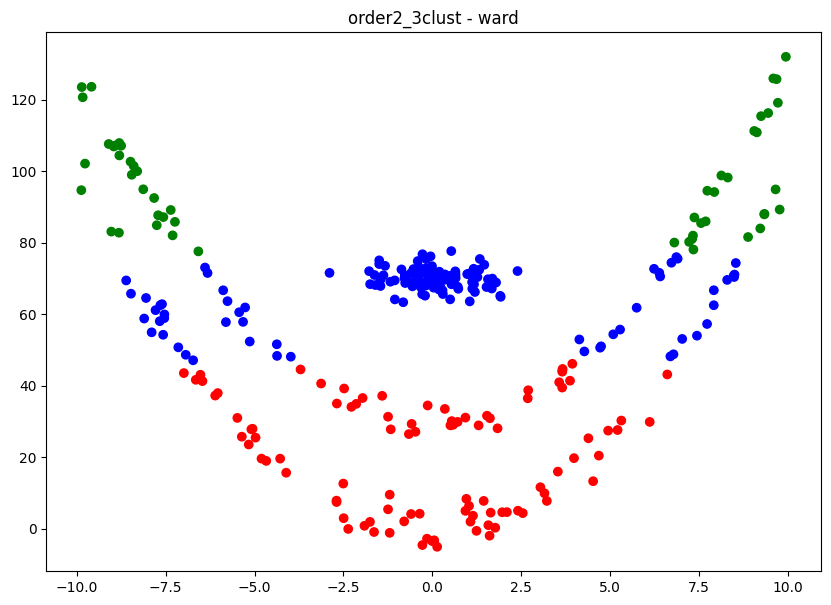

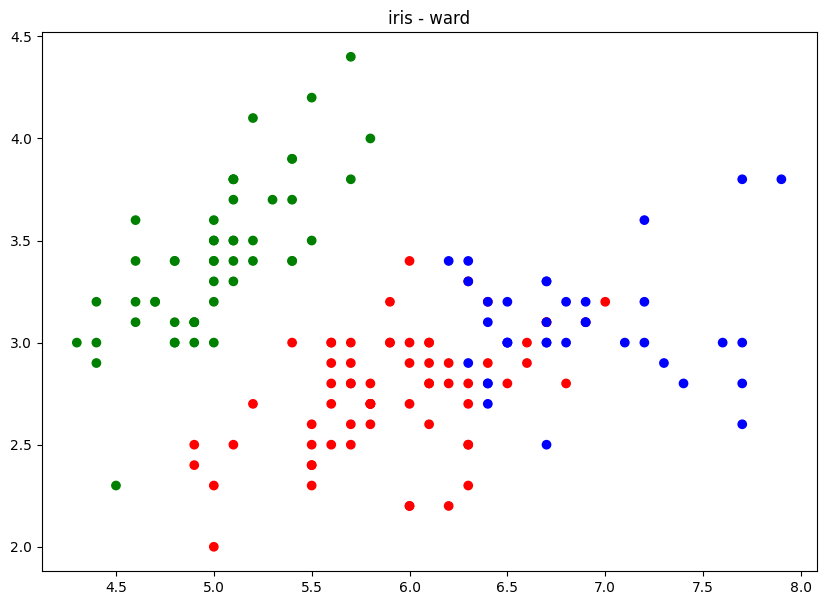

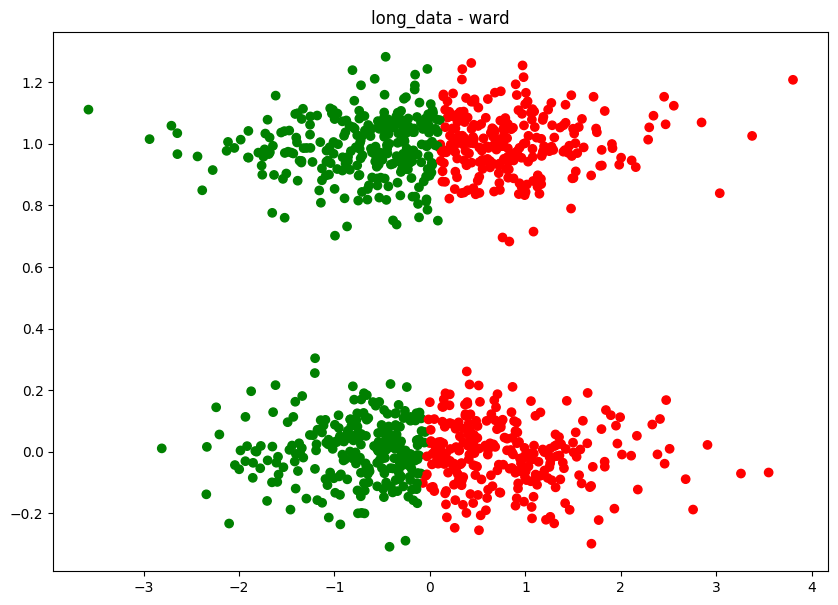

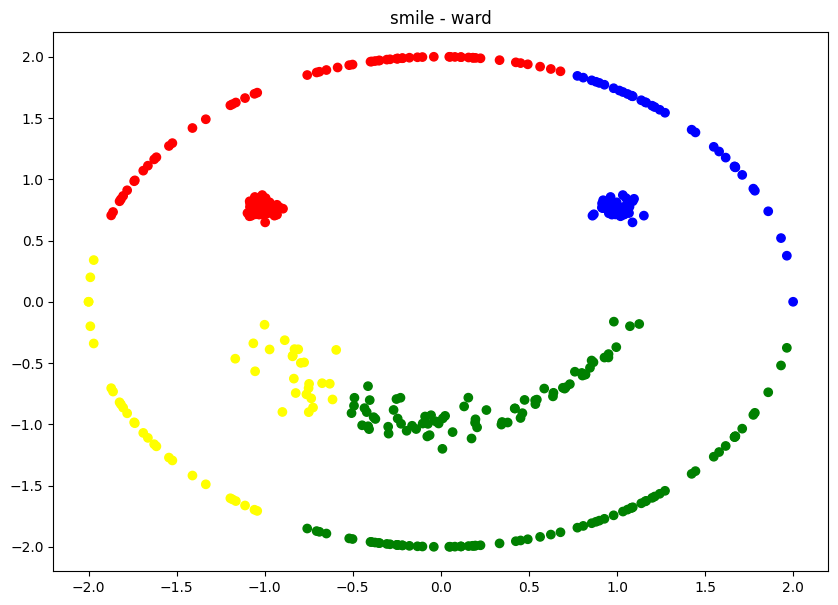

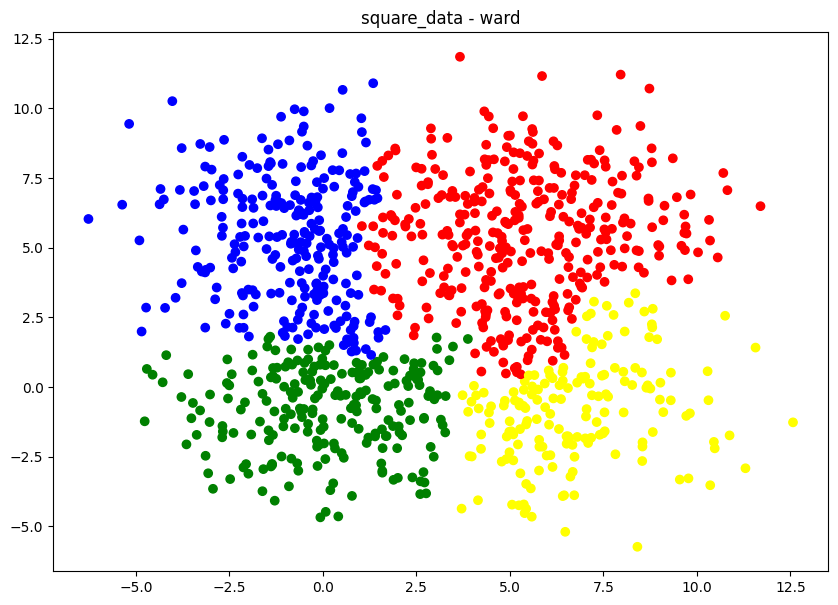

In [41]:
# Visualize the clusters
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']

for method in ["single", "complete", "average", "ward"]:
    for key in datasets.keys():
        # scatter the dataset with different colors for each class
        k = len(np.unique(results[key][method]))
        custom_cmap = ListedColormap(colors[:k])
        plt.figure(figsize=(10, 7))
        plt.scatter(datasets[key][0],datasets[key][1], c=results[key][method], cmap=custom_cmap)
        plt.title(f"{key} - {method}")
        plt.show()

Create data frame with cluster methods

In [119]:
# Calculate Adjusted Rand Index
dataframe = pd.DataFrame(columns=["single", "average", "complete", "ward"], index=datasets.keys())

for key in datasets:
    values = [adjusted_rand_score(datasets[key][2], results[key][method]) for method in ["single", "complete", "average", "ward"]]
    # print(values)
    dataframe.loc[key] = values
        

d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
d:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label,

Results for linkage method: single, complete, average, ward

In [120]:
dataframe

single   average  complete      ward
d_10c          0.775182  0.472024  0.843442  0.718511
order2_3clust  0.003978   0.30748  0.250068  0.383567
iris           0.113692  0.107302  0.117332  0.113692
long_data           1.0   0.02178   0.00004  0.000155
smile               1.0  0.195841  0.297363  0.324166
square_data    0.000001  0.459668  0.519651  0.563555

# DBSCAN

In [88]:
# apply dbscan
from sklearn.cluster import DBSCAN

# Grid search pentru epsilon
dbscan_results = {}

for key in datasets:
    dbscan_results[key] = {"eps" : 0.05, "n_clusters" : 10000}
    X = (datasets[key] - datasets[key].mean()) / datasets[key].std()
    for epsilon in np.arange(0.01, 1, 0.01):    
        db = DBSCAN(eps=epsilon, min_samples=5)
        db = db.fit(X)

        n_clusters = len(np.unique(db.labels_)) - (1 if -1 in db.labels_ else 0)
        if abs(n_clusters - classes[key]) <= abs(dbscan_results[key]["n_clusters"] - classes[key]):
            dbscan_results[key]["eps"] = epsilon
            dbscan_results[key]["n_clusters"] = n_clusters
            dbscan_results[key]["labels"] = db.labels_


In [89]:
dbscan_results_dataframe = pd.DataFrame(columns=["dbscan"], index=datasets.keys())

for key in datasets:
    values = [adjusted_rand_score(datasets_classes[key], dbscan_results[key]['labels'])]
    # print(values)
    dbscan_results_dataframe.loc[key] = values

In [90]:
dbscan_results_dataframe

dbscan
d_10c          0.384662
order2_3clust  0.560526
iris           0.517338
long_data      0.998002
smile               1.0
square_data    0.001898

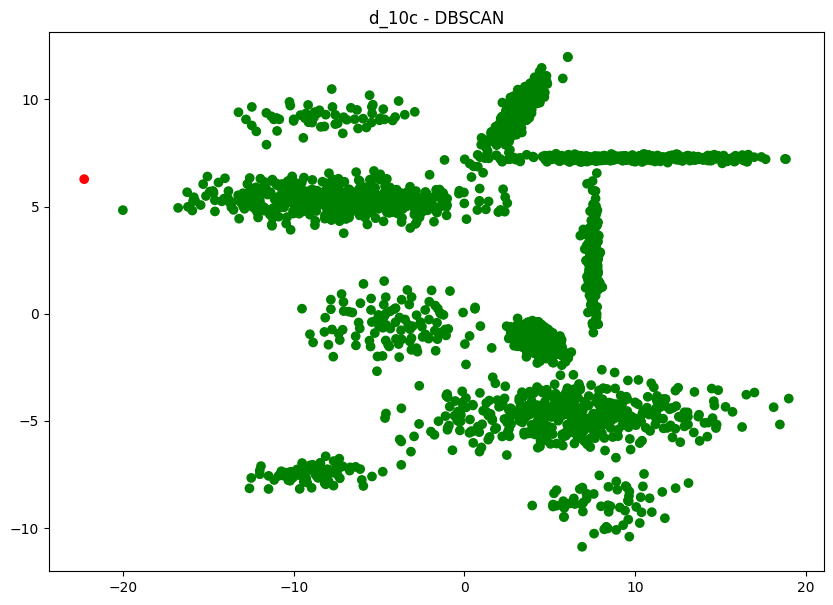

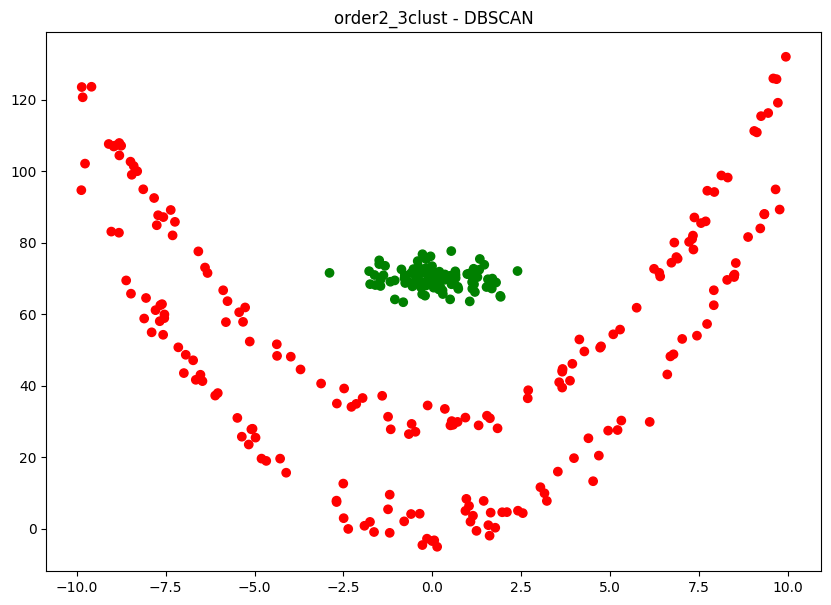

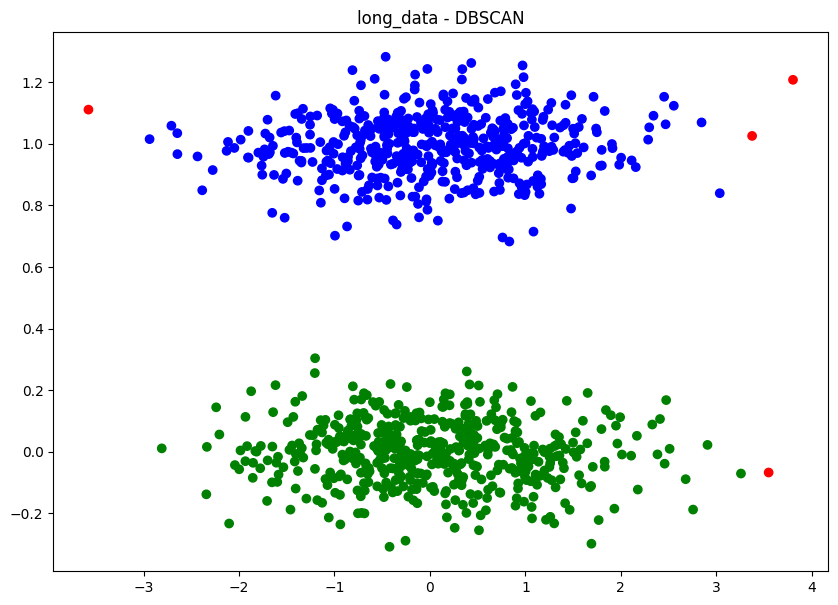

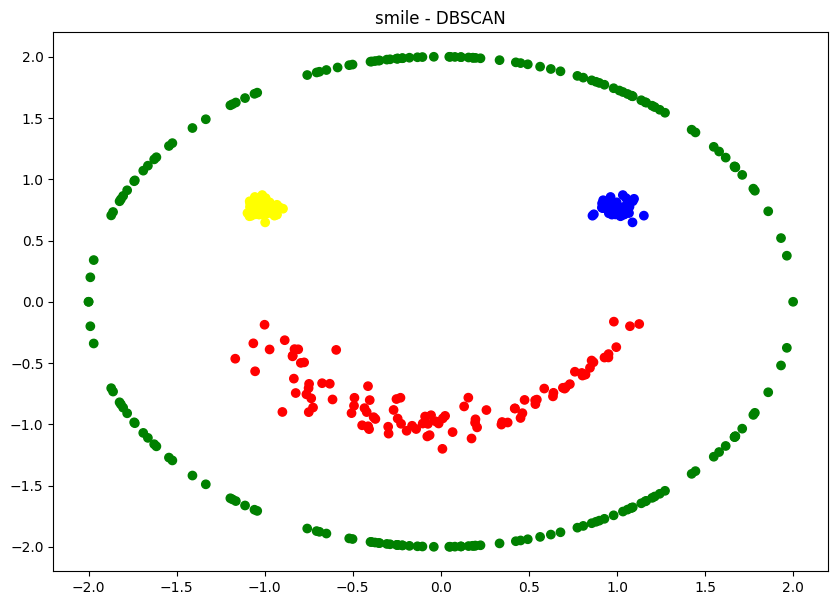

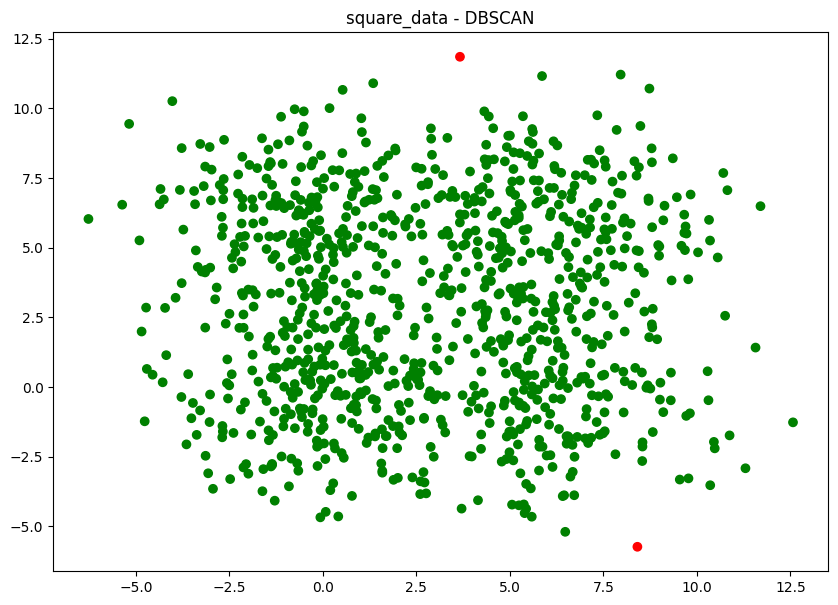

In [89]:
# Visualize the clusters
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']

for key in datasets.keys():
    # scatter the dataset with different colors for each class
    k = len(np.unique(dbscan_results[key]["labels"]))
    custom_cmap = ListedColormap(colors[:k])
    plt.figure(figsize=(10, 7))
    plt.scatter(datasets[key][0],datasets[key][1], c=dbscan_results[key]["labels"], cmap=custom_cmap)
    plt.title(f"{key} - DBSCAN")
    plt.show()

# k-Means

In [94]:
kmeans_results = {}

for key in datasets:
    X = datasets[key] 
    kmeans = max([KMeans(n_clusters=classes[key]).fit(X) for i in range(10)], key=lambda x :adjusted_rand_score(datasets_classes[key], x.labels_ ))
    clusters = kmeans.labels_
    kmeans_results[key] = clusters


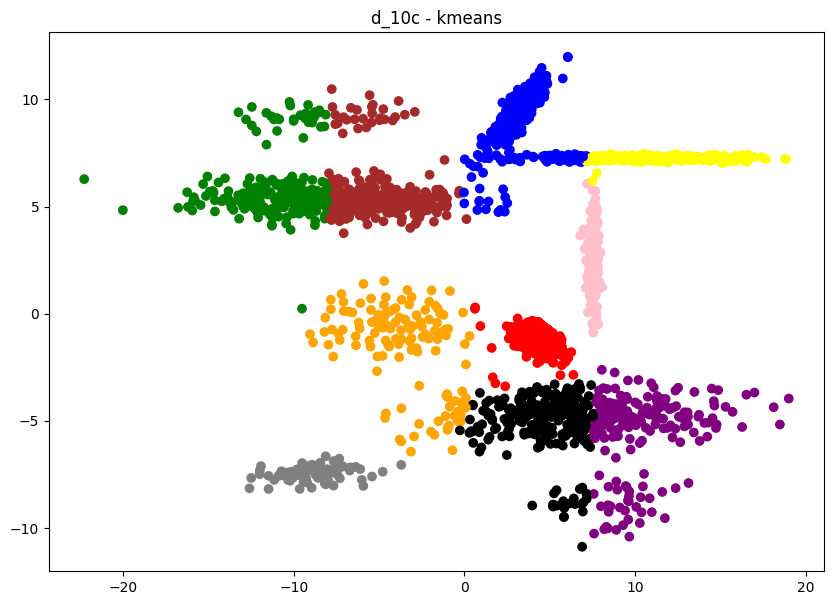

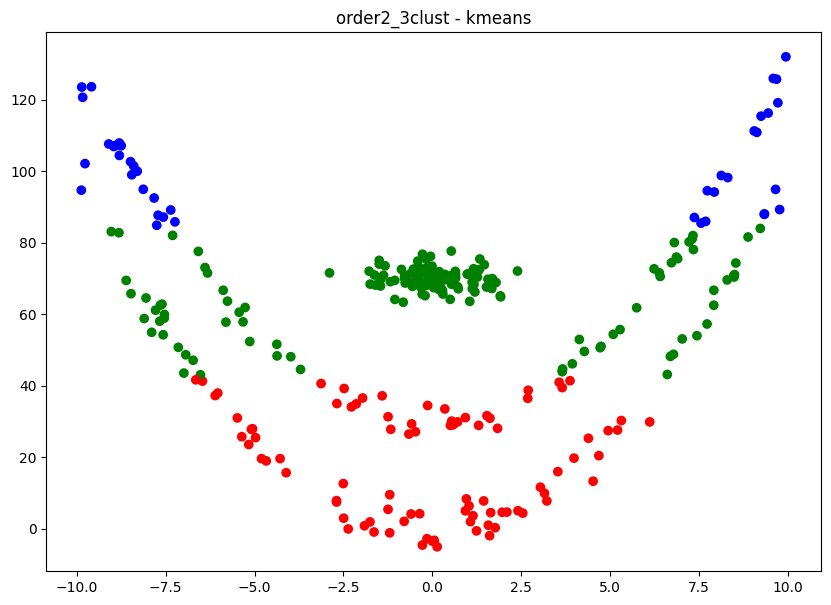

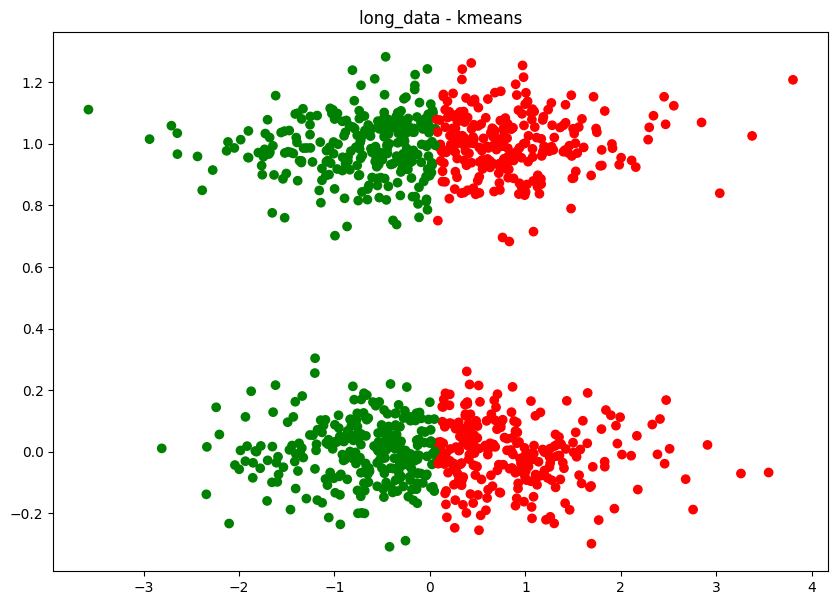

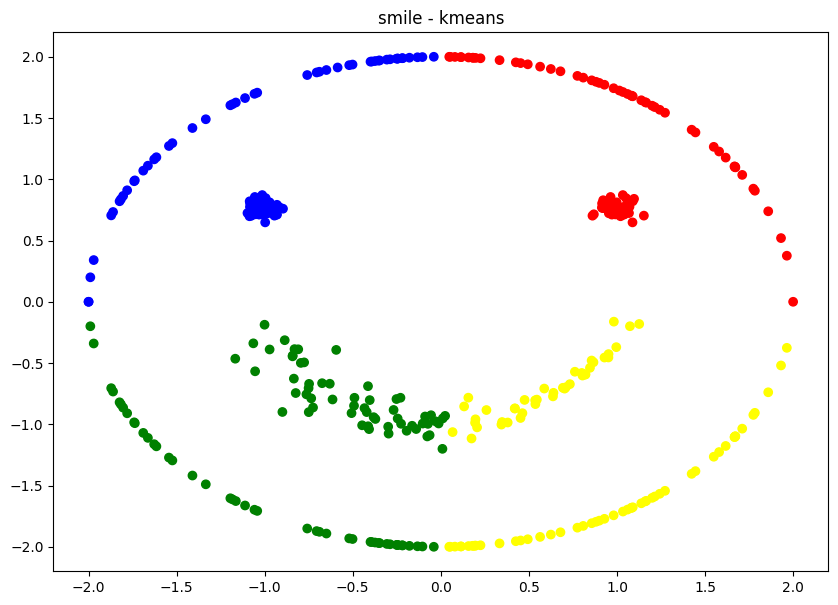

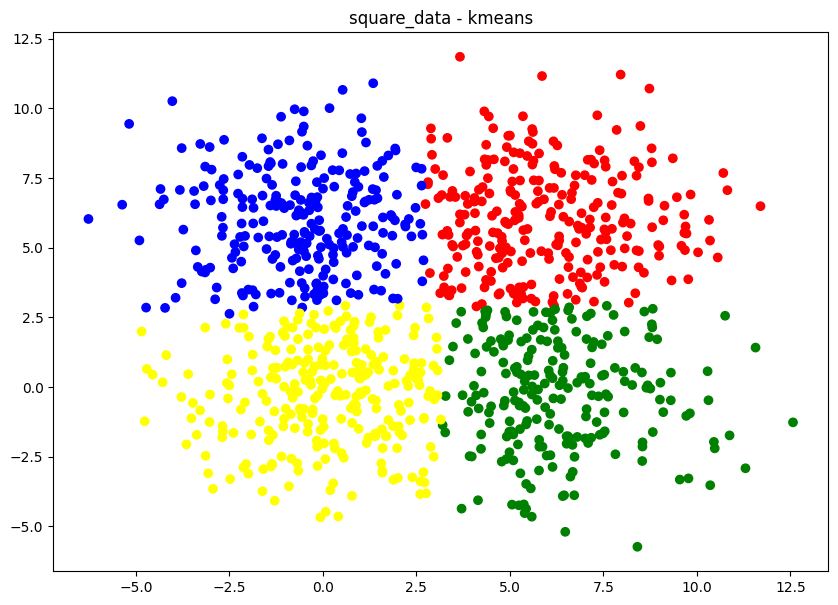

In [95]:
# Visualize the clusters
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']

for key in datasets.keys():
    if key != "iris":
        # scatter the dataset with different colors for each class
        k = len(np.unique(kmeans_results[key]))
        custom_cmap = ListedColormap(colors[:k])
        plt.figure(figsize=(10, 7))
        plt.scatter(datasets[key][0],datasets[key][1], c=kmeans_results[key], cmap=custom_cmap)
        plt.title(f"{key} - kmeans")
        plt.show()

Create dataframe for kmeans results

In [96]:
kmeans_results_dataframe = pd.DataFrame(columns=["kmeans"], index=datasets.keys())

for key in datasets:
    values = [adjusted_rand_score(datasets_classes[key], kmeans_results[key])]
    # print(values)
    kmeans_results_dataframe.loc[key] = values
        

Results for kMeans are shown below:

In [97]:
kmeans_results_dataframe

kmeans
d_10c          0.724119
order2_3clust  0.242237
iris           0.730238
long_data     -0.000805
smile          0.185185
square_data     0.69318

# Expectation Maximization (EM) clustering

In [98]:
# apply EM clustering
from sklearn.mixture import GaussianMixture

em_results = {}

for key in datasets:
    X = datasets[key] 
    gmm = GaussianMixture(n_components=classes[key]).fit(X)
    clusters = gmm.predict(X)
    em_results[key] = clusters
    

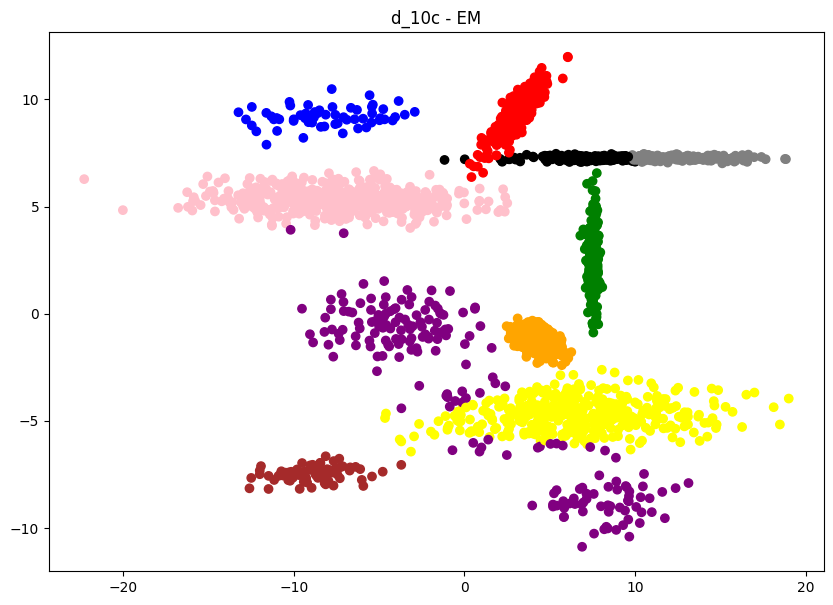

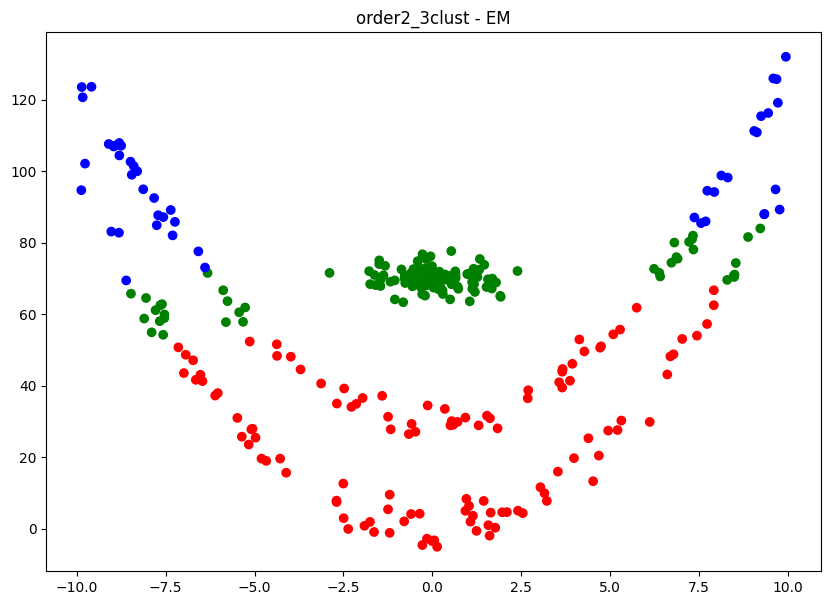

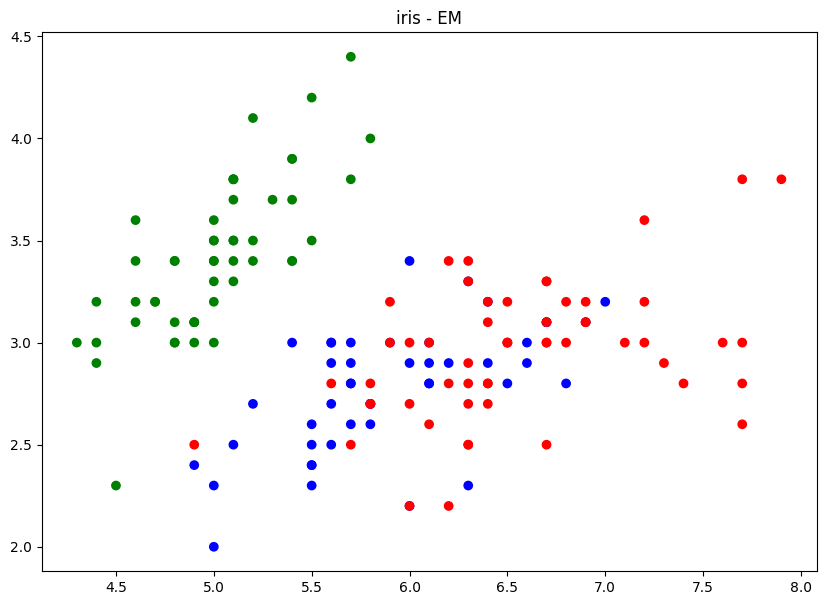

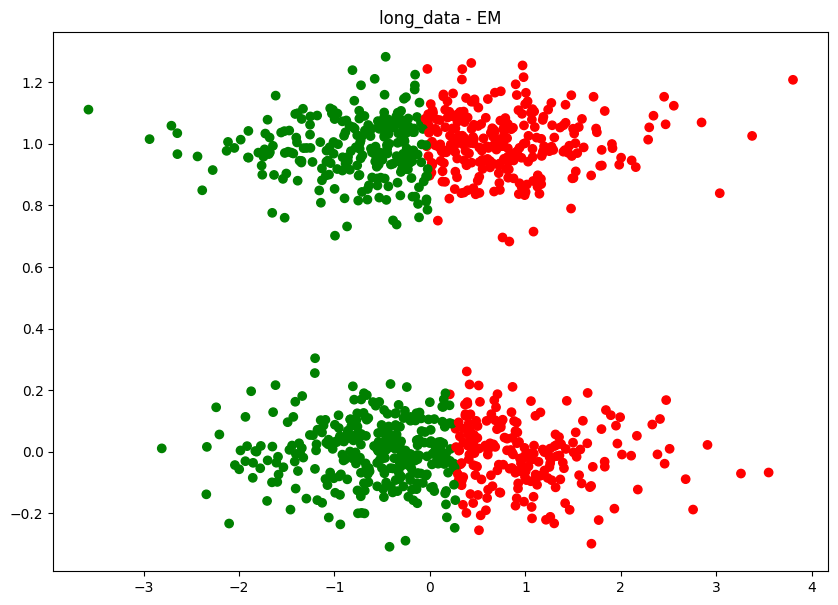

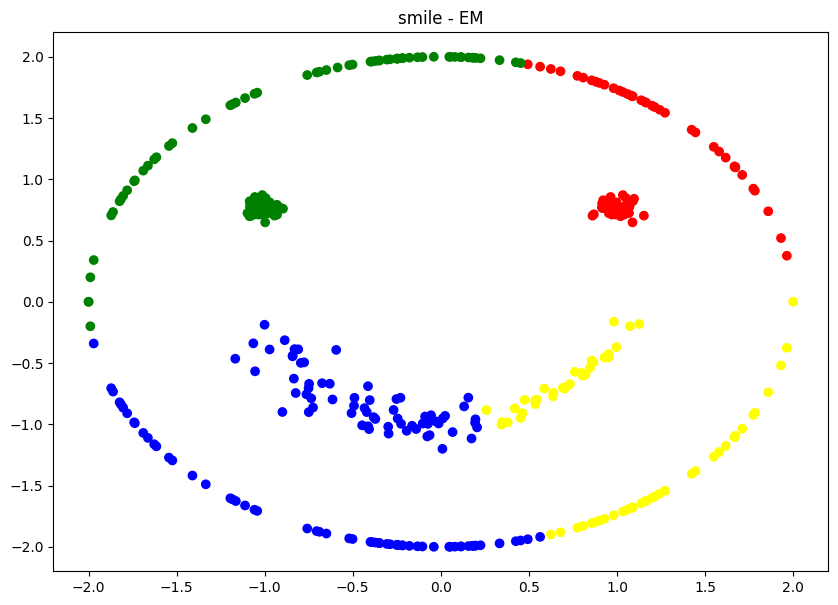

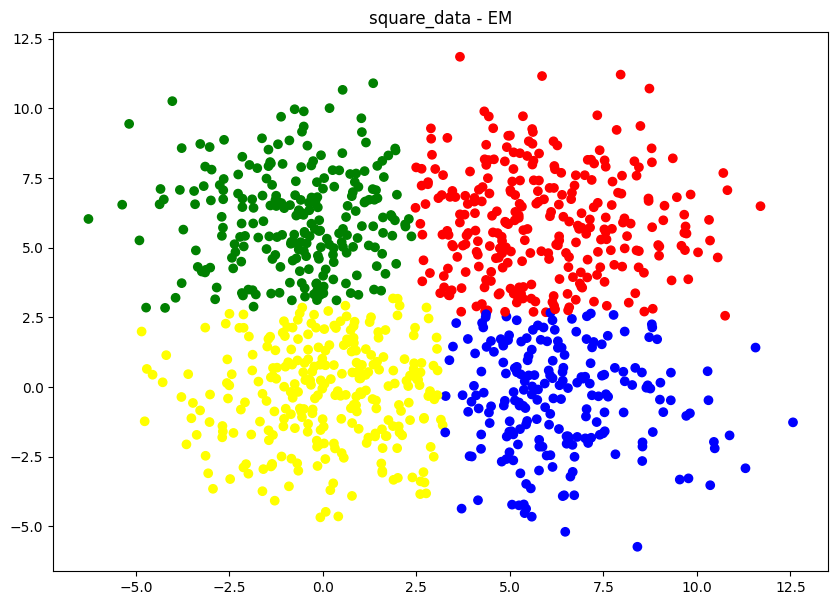

In [325]:
# visualize the clusters 
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black']
for key in em_results:
    X = datasets[key]
    clusters = em_results[key] 
    k = len(np.unique(clusters))
    custom_cmap = ListedColormap(colors[:k])
    plt.figure(figsize=(10, 7))
    plt.scatter(X[0], X[1], c=clusters, cmap=custom_cmap)
    plt.title(f"{key} - EM")
    plt.show()

In [99]:

em_results_dataframe = pd.DataFrame(columns=["emmixture"], index=datasets.keys())

for key in datasets:
    values = [adjusted_rand_score(datasets_classes[key], em_results[key])]
    # print(values)
    em_results_dataframe.loc[key] = values
        

Results for EM clustering are shown below:

In [100]:
em_results_dataframe

emmixture
d_10c          0.998209
order2_3clust  0.380882
iris           0.903874
long_data      0.015402
smile          0.267159
square_data    0.675488

# Self - organizing maps (SOM)

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #normalisation
from scipy.spatial import distance #distance calculation
from numpy.ma.core import ceil
from matplotlib import colors

In [269]:
data_x = datasets["iris"].to_numpy()
data_y = datasets_classes["iris"].to_numpy()

In [270]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [271]:
# Data Normalisation
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  # shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  shortest_distance = np.inf
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [302]:
train_x_norm = minmax_scaler(train_x) # normalisation
num_dims = train_x_norm.shape[1]

In [303]:
# main function
def training(train_x, max_steps, max_learning_rate, max_m_dsitance, num_rows, num_cols):
  train_x_norm = minmax_scaler(train_x) # normalisation
  # initialising self-organising map
  # num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
  # np.random.seed(40)
  som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

  # start training iterations
  for step in range(max_steps):
    if (step+1) % 1000 == 0:
      print("Iteration: ", step+1) # print out the current iteration for every 1k
    learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

    t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    for row in range(num_rows):
      for col in range(num_cols):
        if m_distance([row,col],winner) <= neighbourhood_range:
          som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight
  print("SOM training completed") 
  return som

  

In [304]:
# collecting labels
def collect_labels(som, num_rows, num_cols):
  label_data = train_y
  map = np.empty(shape=(num_rows, num_cols), dtype=object)

  for row in range(num_rows):
    for col in range(num_cols):
      map[row][col] = [] # empty list to store the label

  for t in range(train_x_norm.shape[0]):
    if (t+1) % 1000 == 0:
      print("sample data: ", t+1)
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron
  return map

In [305]:
# construct label map
def construct_label_map(map, num_rows, num_cols):
  label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
  for row in range(num_rows):
    for col in range(num_cols):
      label_list = map[row][col]
      if len(label_list)==0:
        label = 2
      else:
        label = max(label_list, key=label_list.count)
      label_map[row][col] = label
  return label_map


In [306]:
# Hyper-parameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(2*10e3)


In [307]:
som = training(train_x, max_steps, max_learning_rate, max_m_dsitance, num_rows, num_cols)

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
SOM training completed


In [308]:
map = collect_labels(som, num_rows, num_cols)

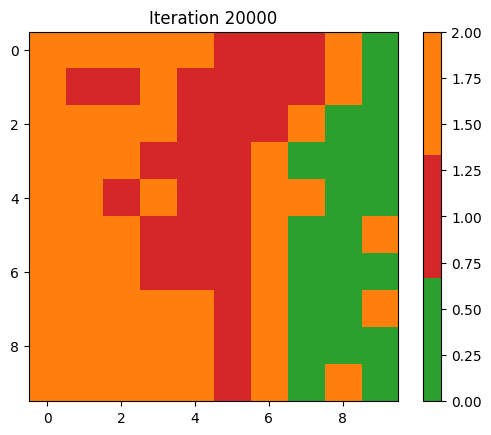

In [309]:
label_map = construct_label_map(map, num_rows, num_cols)
title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [310]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(som.reshape(num_rows * num_cols, -1))

In [311]:
# predict the cluster for each training sample
clustered = kmeans.predict(som.reshape(num_rows * num_cols, -1))

In [312]:
# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(test_x) # normalisation
# data = test_x

winner_labels = []

for t in range(data.shape[0]):
    winner = winning_neuron(data, t, som, num_rows, num_cols)
    row = winner[0]
    col = winner[1]
    # predicted = label_map[row][col]
    predicted = clustered[row * num_cols + col]
    winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))
print("Adjusted score: ",adjusted_rand_score(test_y, np.array(winner_labels)))

Accuracy:  0.0
Adjusted score:  0.8074463899272083


* Change hyperparameters and see how the results change

In [315]:
# Hyper-parameters
# hyperparameters
num_rows = 7
num_cols = 7
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(2*10e3)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction


In [316]:
som = training(train_x, max_steps, max_learning_rate, max_m_dsitance, num_rows, num_cols)

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
SOM training completed


In [317]:
map = collect_labels(som, num_rows, num_cols)

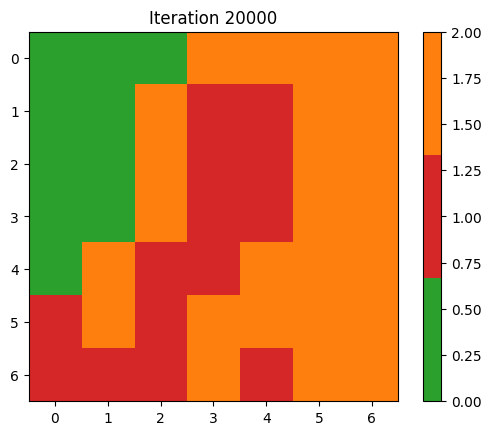

In [318]:
label_map = construct_label_map(map, num_rows, num_cols)
title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [319]:
# apply K-means on map 
kmeans = KMeans(n_clusters=3, random_state=0).fit(som.reshape(num_rows * num_cols, -1))
# predict the cluster for each training sample
clustered = kmeans.predict(som.reshape(num_rows * num_cols, -1))

data = minmax_scaler(test_x) # normalisation
# data = test_x

winner_labels = []

for t in range(data.shape[0]):
    winner = winning_neuron(data, t, som, num_rows, num_cols)
    row = winner[0]
    col = winner[1]
    # predicted = label_map[row][col]
    predicted = clustered[row * num_cols + col]
    winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))
print("Adjusted score: ",adjusted_rand_score(test_y, np.array(winner_labels)))

Accuracy:  0.0
Adjusted score:  0.8104850421144351


Dataframe with all results obtained from different clustering methods on datasets.

In [101]:
all_scores = [dbscan_results_dataframe, em_results_dataframe, kmeans_results_dataframe] 
# create a DataFrame from all_scores concatenated on column axis
all_scores_df = pd.concat(all_scores, axis=1)
all_scores_df


dbscan emmixture    kmeans
d_10c          0.384662  0.998209  0.724119
order2_3clust  0.560526  0.380882  0.242237
iris           0.517338  0.903874  0.730238
long_data      0.998002  0.015402 -0.000805
smile               1.0  0.267159  0.185185
square_data    0.001898  0.675488   0.69318

# TASK 2

### with cod method and silhouette score, using KMeans clustering and single linkage method.

### on iris dataset using KMeans clustering and single linkage method:

In [47]:
inter_cluster_distances = []
silhouette_scores = []
critcf_scores = []
num_of_clusters_range = range(2, 20)
train_dataset = datasets["iris"]
for num_cluster in num_of_clusters_range:
    # apply kmeans on with different number of clusters and get the inter cluster distance
    kmeans = KMeans(n_clusters=num_cluster, random_state=0).fit(train_dataset)
    inter_cluster_distances.append(kmeans.inertia_)
    # get the silhouette score
    # Compute the Silhouette Width Index
    silhouette_score_value = silhouette_score(train_dataset, kmeans.labels_)
    silhouette_scores.append(silhouette_score_value)
    # Compute the CritCF index (Calinski-Harabasz Index) if necessary
    critcf_score_value = calinski_harabasz_score(train_dataset, kmeans.labels_)
    critcf_scores.append(critcf_score_value)


* plot the CritCF index (Calinski-Harabasz) for different values of k (number of clusters)

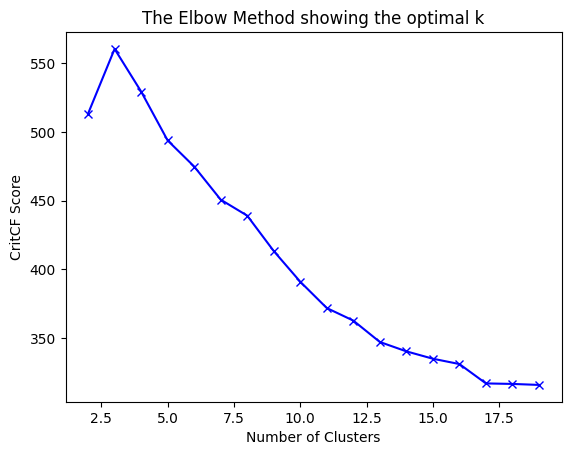

In [48]:
# plot the CritCF index
plt.plot(num_of_clusters_range, critcf_scores, 'bx-', label = 'CritCF Score')
plt.xlabel('Number of Clusters')
plt.ylabel('CritCF Score')
plt.title('The Elbow Method showing the optimal k')
plt.show()


* plot the silouhette score for each cluster size

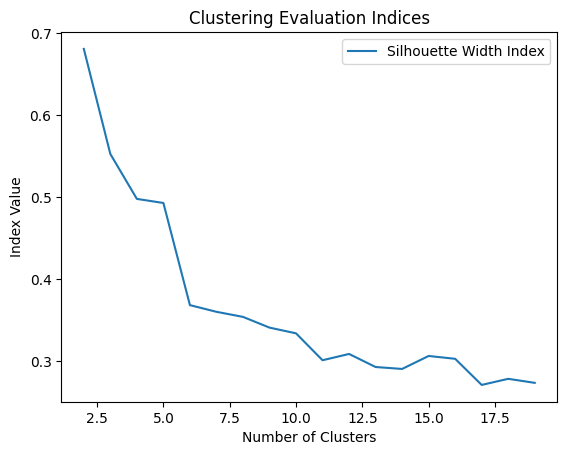

In [49]:
plt.plot(num_of_clusters_range, silhouette_scores, label='Silhouette Width Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Index Value')
plt.title('Clustering Evaluation Indices')
plt.legend()
plt.show()

Text(0, 0.5, 'Inter cluster distance')

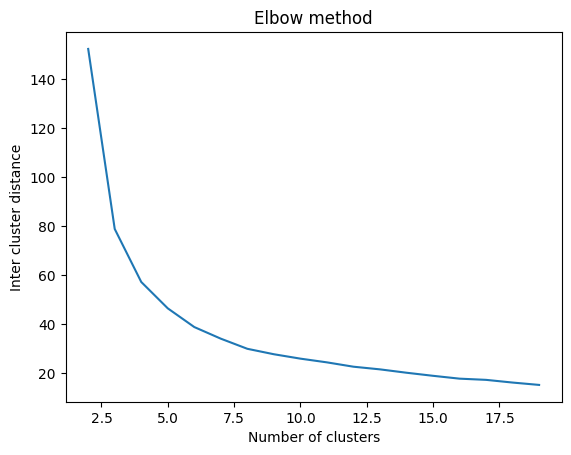

In [50]:
# plot the inter cluster distance
number_of_clusters = 20
plt.plot(num_of_clusters_range, inter_cluster_distances)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inter cluster distance")


the last elbow comes at k=3

Text(0.5, 1.0, 'Iris dataset')

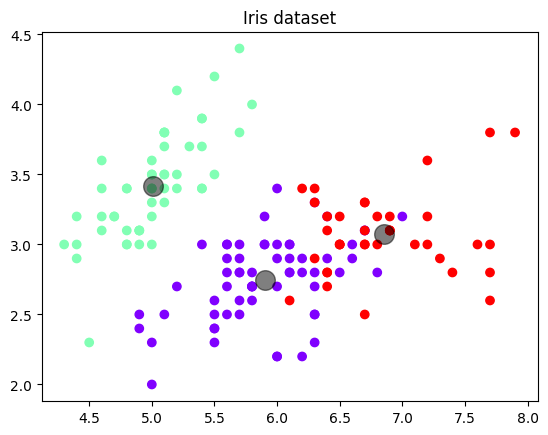

In [147]:
# visualise the clusters of iris dataset and the cluster centres
kmeans = KMeans(n_clusters=3, random_state=0).fit(train_dataset)
plt.scatter(train_dataset[0], train_dataset[1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
plt.title("Iris dataset")


Now with single linkage method:

In [77]:
def sil_scores(X, Z, ts):
    scores = []
    for num_cluster in ts: 
        print(num_cluster)
        scores.append(silhouette_score(X,fcluster(Z, t = num_cluster, criterion='maxclust')))
    return scores 

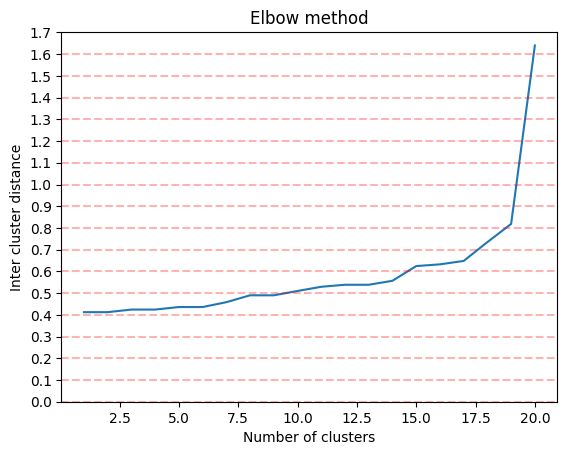

In [53]:
train_dataset = datasets["iris"]

# Calculate linkage matrix
linkage_matrix = linkage(train_dataset, method='single')

# Calculate the silhouette score for each cluster
silhouette_scores = sil_scores(train_dataset, linkage_matrix, range(2, 20))

# take the last 20 merged clusters
values = linkage_matrix[:, 2]
values = values[-20:]
# plot the values
plt.plot(range(1, 21), values)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inter cluster distance")
y_ticks = np.arange(0, max(values) + 0.1, 0.1)
plt.yticks(y_ticks)
# Draw horizontal lines at each y value
for y in y_ticks:
    plt.axhline(y=y, color='r', linestyle='--', alpha=0.3)
plt.show()

* show silhouette score for each cluster size

In [54]:
ts = range(2, 20)
for t, s in zip(ts, silhouette_scores):
    print(f"With {t} clusters, the silhouette score is {s}")

With 2 clusters, the silhouette score is 0.6863930543445408
With 3 clusters, the silhouette score is 0.5118387098922373
With 4 clusters, the silhouette score is 0.28177774044073334
With 5 clusters, the silhouette score is 0.2834836728123189
With 6 clusters, the silhouette score is 0.2211144115880162
With 7 clusters, the silhouette score is 0.13143138174943914
With 8 clusters, the silhouette score is 0.057371121031042464
With 9 clusters, the silhouette score is 0.02109854792601768
With 10 clusters, the silhouette score is 0.02381607934946184
With 11 clusters, the silhouette score is 0.063592193809797
With 12 clusters, the silhouette score is 0.020144519977925483
With 13 clusters, the silhouette score is 0.00814462642986238
With 14 clusters, the silhouette score is -0.0111037852922545
With 15 clusters, the silhouette score is -0.10267338347855005
With 16 clusters, the silhouette score is -0.08324608114246072
With 17 clusters, the silhouette score is -0.08437182595610013
With 18 clusters,

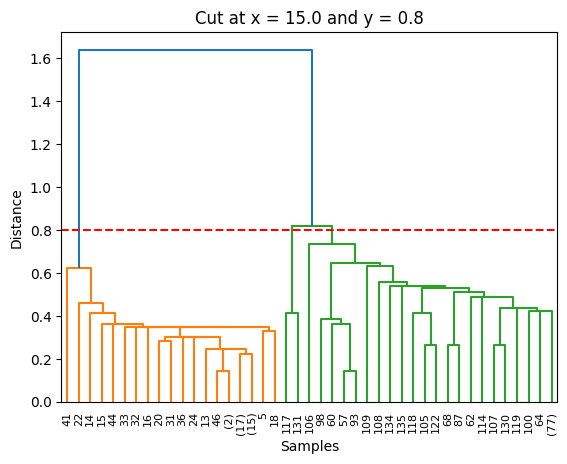

Number of Clusters: 3


In [194]:
# Cut the dendrogram at the specified x and y coordinates
x_cut = 15.00
y_cut = 0.8

dendrogram(linkage_matrix, truncate_mode='level', p=15)
plt.axhline(y=y_cut, color='r', linestyle='--')

plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Cut at x = {} and y = {}'.format(x_cut, y_cut))
plt.show()

# Determine the number of clusters based on the cut
clusters = fcluster(linkage_matrix, t=y_cut, criterion='distance')
num_clusters = len(np.unique(clusters))

print("Number of Clusters:", num_clusters)

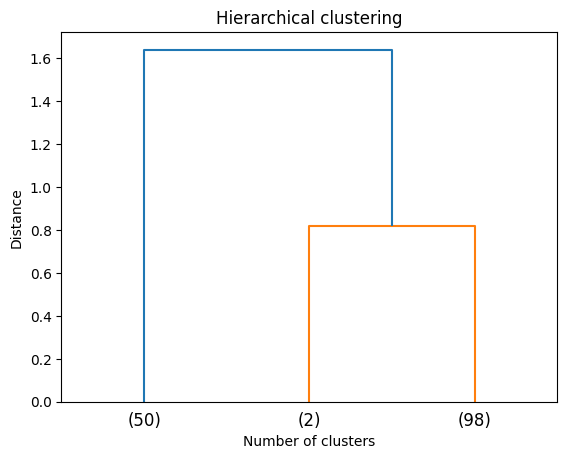

In [195]:
# Plot the dendrogram with the cut-off
num_clusters = 3
dendrogram(linkage_matrix, truncate_mode='lastp', p=num_clusters)
plt.title("Hierarchical clustering")
plt.xlabel("Number of clusters")
plt.ylabel("Distance")
plt.show()

### on d_10c dataset using KMeans clustering and single linkage method:

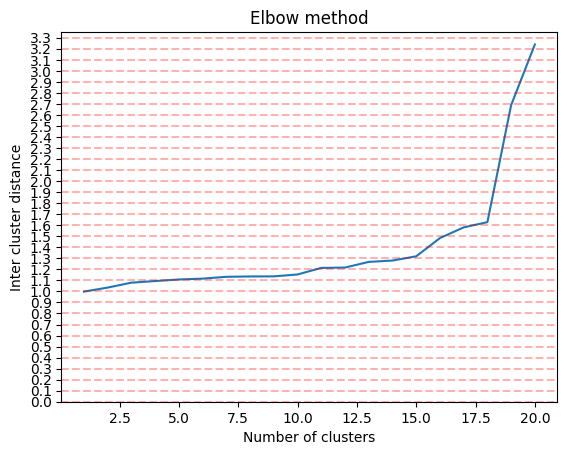

In [56]:
train_dataset = datasets["d_10c"]

# Calculate linkage matrix
linkage_matrix = linkage(train_dataset, method='single')

# Calculate the silhouette score for each cluster
silhouette_scores = sil_scores(train_dataset, linkage_matrix, range(2, 20))

# take the last 20 merged clusters
values = linkage_matrix[:, 2]
values = values[-20:]
# plot the values
plt.plot(range(1, 21), values)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inter cluster distance")
y_ticks = np.arange(0, max(values) + 0.1, 0.1)
plt.yticks(y_ticks)
# Draw horizontal lines at each y value
for y in y_ticks:
    plt.axhline(y=y, color='r', linestyle='--', alpha=0.3)
plt.show()

In [57]:
ts = range(2, 20)
for t, s in zip(ts, silhouette_scores):
    print(f"With {t} clusters, the silhouette score is {s}")

With 2 clusters, the silhouette score is 0.4865558345537868
With 3 clusters, the silhouette score is 0.4569066229969602
With 4 clusters, the silhouette score is 0.1997118407022935
With 5 clusters, the silhouette score is 0.2121669581625285
With 6 clusters, the silhouette score is 0.064531540049497
With 7 clusters, the silhouette score is 0.03266692034552554
With 8 clusters, the silhouette score is 0.027365838899677912
With 9 clusters, the silhouette score is 0.025315013567104118
With 10 clusters, the silhouette score is -0.037162435856910654
With 11 clusters, the silhouette score is 0.004804591075508243
With 12 clusters, the silhouette score is -0.0944282543687565
With 13 clusters, the silhouette score is -0.103242849174962
With 14 clusters, the silhouette score is -0.13654497587431588
With 15 clusters, the silhouette score is -0.05141255304588274
With 16 clusters, the silhouette score is -0.15928278466027088
With 17 clusters, the silhouette score is -0.13799180586035845
With 18 cluste

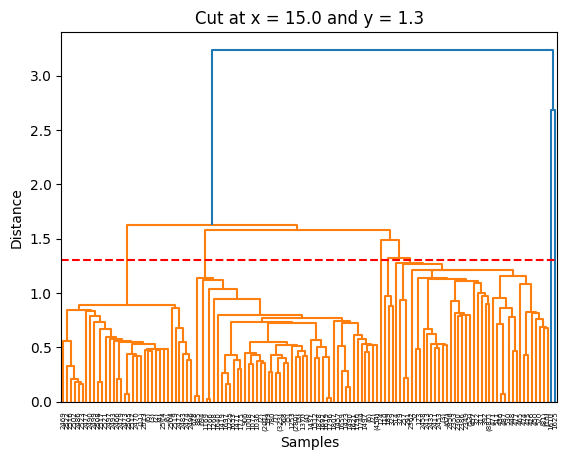

Number of Clusters: 7


In [59]:
# Cut the dendrogram at the specified x and y coordinates
x_cut = 15.00
y_cut = 1.3

dendrogram(linkage_matrix, truncate_mode='level', p=15)
plt.axhline(y=y_cut, color='r', linestyle='--')

plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Cut at x = {} and y = {}'.format(x_cut, y_cut))
plt.show()

# Determine the number of clusters based on the cut
clusters = fcluster(linkage_matrix, t=y_cut, criterion='distance')
num_clusters = len(np.unique(clusters))

print("Number of Clusters:", num_clusters)

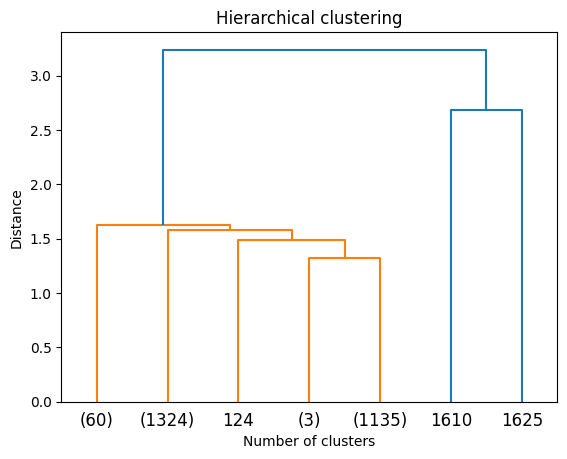

In [60]:
# Plot the dendrogram with the cut-off
num_clusters = 7
dendrogram(linkage_matrix, truncate_mode='lastp', p=num_clusters)
plt.title("Hierarchical clustering")
plt.xlabel("Number of clusters")
plt.ylabel("Distance")
plt.show()

Kmeans:

In [61]:
inter_cluster_distances = []
silhouette_scores = []
critcf_scores = []
num_of_clusters_range = range(2, 20)
train_dataset = datasets["d_10c"]
for num_cluster in num_of_clusters_range:
    # apply kmeans on with different number of clusters and get the inter cluster distance
    kmeans = KMeans(n_clusters=num_cluster, random_state=0).fit(train_dataset)
    inter_cluster_distances.append(kmeans.inertia_)
    # get the silhouette score
    # Compute the Silhouette Width Index
    silhouette_score_value = silhouette_score(train_dataset, kmeans.labels_)
    silhouette_scores.append(silhouette_score_value)
    # Compute the CritCF index (Calinski-Harabasz Index) if necessary
    critcf_score_value = calinski_harabasz_score(train_dataset, kmeans.labels_)
    critcf_scores.append(critcf_score_value)

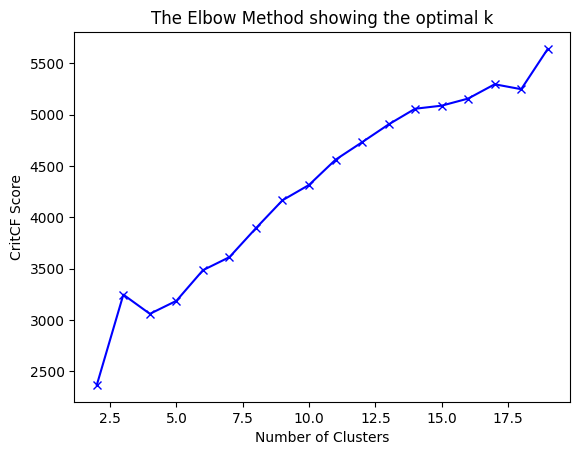

In [64]:
# plot the CritCF index
plt.plot(num_of_clusters_range, critcf_scores, 'bx-', label = 'CritCF Score')
plt.xlabel('Number of Clusters')
plt.ylabel('CritCF Score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Text(0, 0.5, 'Inter cluster distance')

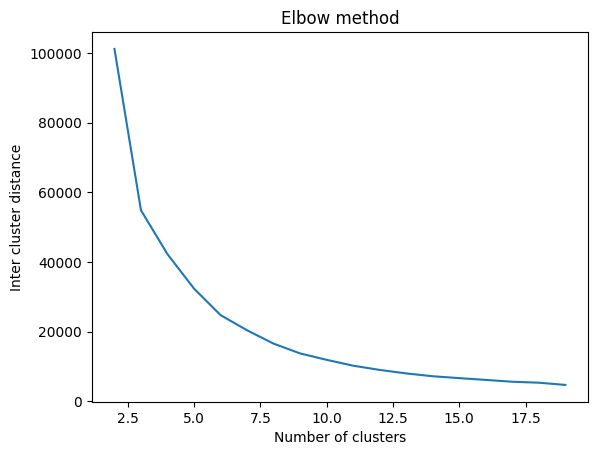

In [63]:
# plot the inter cluster distance
number_of_clusters = 20
plt.plot(num_of_clusters_range, inter_cluster_distances)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inter cluster distance")


Text(0.5, 1.0, 'd_10c dataset')

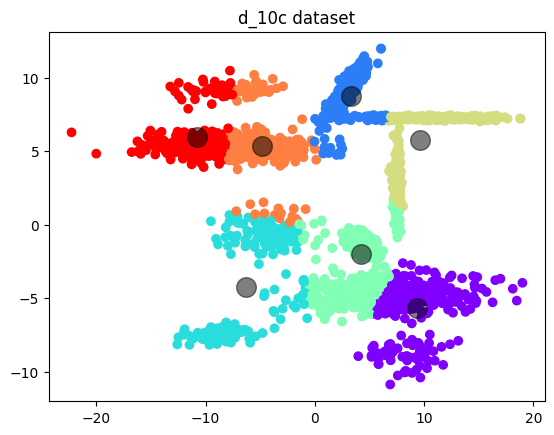

In [65]:
# visualise the clusters of iris dataset and the cluster centres
kmeans = KMeans(n_clusters=7, random_state=0).fit(train_dataset)
plt.scatter(train_dataset[0], train_dataset[1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
plt.title("d_10c dataset")


# TASK 3

In [107]:
hotel = pd.read_csv('Hotel Reservations.csv')
hotel = hotel.drop(['Booking_ID'], axis=1)    # Booking_ID is useless

In [108]:
from sklearn.preprocessing import LabelEncoder
label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

hotel['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(hotel['type_of_meal_plan'])
hotel['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(hotel['room_type_reserved'])
hotel['market_segment_type'] = label_encoder_market_segment_type.fit_transform(hotel['market_segment_type'])
# hotel['booking_status'] = label_encoder_booking_status.fit_transform(hotel['booking_status'])


For hierarchical clustering, we will use fewer columns (based on hw1 observations), because the number of columns is too large and the algorithm will take too long to run.


In [109]:
columns = ['lead_time', 'arrival_month',  'avg_price_per_room', 'market_segment_type', 'no_of_special_requests']
X_hierrachical = hotel[columns]
X_hierrachical = X_hierrachical.values


Separating into features variables and target variable

In [110]:
X = hotel.drop('booking_status', axis = 1)
# take firws
X = X.values
y = hotel['booking_status'] 

Identifying the natural number of clusters with kMeans

In [86]:
# copy from above using kMeans or AgglomerativeClustering to identify the number of clusters
inter_cluster_distances = []
silhouette_scores = []
critcf_scores = []
num_of_clusters_range = range(2, 5)
train_dataset = X
for num_cluster in num_of_clusters_range:
    print("Number of clusters: ", num_cluster)
    # apply kmeans on with different number of clusters and get the inter cluster distance
    kmeans = KMeans(n_clusters=num_cluster).fit(train_dataset)
    inter_cluster_distances.append(kmeans.inertia_)
    # get the silhouette score
    # Compute the Silhouette Width Index
    silhouette_score_value = silhouette_score(train_dataset, kmeans.labels_)
    silhouette_scores.append(silhouette_score_value)
    # Compute the CritCF index (Calinski-Harabasz Index) if necessary
    critcf_score_value = calinski_harabasz_score(train_dataset, kmeans.labels_)
    critcf_scores.append(critcf_score_value)

Number of clusters:  2
Number of clusters:  3
Number of clusters:  4


Text(0, 0.5, 'Inter cluster distance')

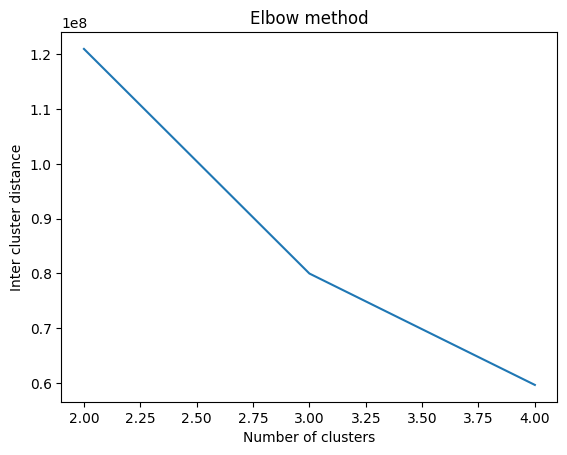

In [87]:
# plot the inter cluster distance
number_of_clusters = 10
plt.plot(num_of_clusters_range, inter_cluster_distances)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inter cluster distance")

Identifying the natural number of clusters with hierarchical clustering : Average linkage

In [76]:
train_dataset = X_hierrachical

# Calculate linkage matrix
linkage_matrix = linkage(train_dataset, method='single')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


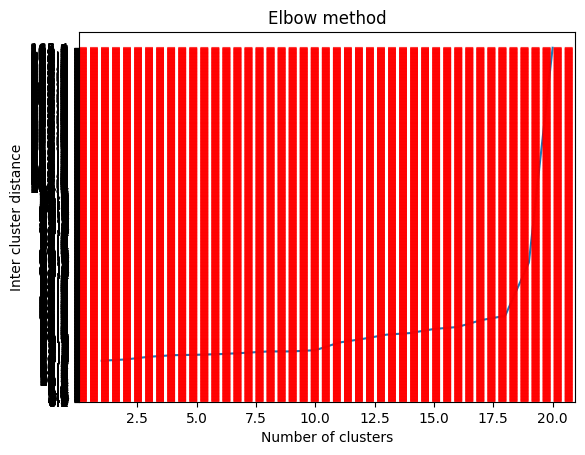

In [78]:
# Calculate the silhouette score for each cluster
silhouette_scores = sil_scores(train_dataset, linkage_matrix, range(2, 20))

# take the last 20 merged clusters
values = linkage_matrix[:, 2]
values = values[-20:]
# plot the values
plt.plot(range(1, 21), values)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inter cluster distance")
y_ticks = np.arange(0, max(values) + 0.1, 0.1)
plt.yticks(y_ticks)
# Draw horizontal lines at each y value
for y in y_ticks:
    plt.axhline(y=y, color='r', linestyle='--', alpha=0.3)
plt.show()

In [79]:
ts = range(2, 20)
for t, s in zip(ts, silhouette_scores):
    print(f"With {t} clusters, the silhouette score is {s}")

With 2 clusters, the silhouette score is 0.7605647027892883
With 3 clusters, the silhouette score is 0.621664076322602
With 4 clusters, the silhouette score is 0.5577972721045934
With 5 clusters, the silhouette score is 0.47998025772253455
With 6 clusters, the silhouette score is 0.42023585628378923
With 7 clusters, the silhouette score is 0.42028027830943065
With 8 clusters, the silhouette score is 0.42632072951628996
With 9 clusters, the silhouette score is 0.42610322783262927
With 10 clusters, the silhouette score is 0.39054134947155356
With 11 clusters, the silhouette score is 0.3906459290739786
With 12 clusters, the silhouette score is 0.37533177676467144
With 13 clusters, the silhouette score is 0.3753046965806433
With 14 clusters, the silhouette score is 0.34917086852305845
With 15 clusters, the silhouette score is 0.3439555007711592
With 16 clusters, the silhouette score is 0.31361581229002333
With 17 clusters, the silhouette score is 0.31113238459452097
With 18 clusters, the s

Text(0.5, 1.0, 'Hotel Reservations dataset')

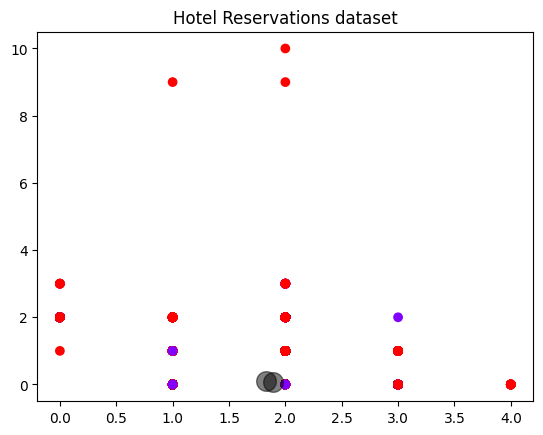

In [80]:
# apply kmeans and visualise the clusters
train_dataset = X
kmeans = KMeans(n_clusters=2, random_state=0).fit(train_dataset)
plt.scatter(train_dataset[:, 0], train_dataset[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
plt.title("Hotel Reservations dataset")


In [114]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics.cluster import contingency_matrix
y_labels = hotel['booking_status']

y_labels = y_labels.map({'Canceled': 0, 'Not_Canceled': 1})

# Perform K-means clustering
train_dataset = X
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_labels = kmeans.fit(train_dataset)
predicted_labels = predicted_labels.labels_
# Create the contingency matrix
contingency_matrix = contingency_matrix(y_labels, predicted_labels)
# compute ARI
ari = adjusted_rand_score(y_labels, predicted_labels)
print("Adjusted Rand Index:", ari)

print(contingency_matrix)



Adjusted Rand Index: 0.2139373975902421
[[ 5765  6120]
 [ 3169 21221]]
